Seaborn
---------
In this notebook, I will give you a brief overview of seaborn as a plotting tool, mainly in the contexts of data analysis and machine learning. Something you should know about seaborn is that it is based on matplotlib, and that every plot you can make with seaborn could also be made with matplotlib. You might now be wondering what's the point in learning seaborn? Well the answer is actually quite simple, seaborn allows you to make some plots that would be arduous and take many lines in matplotlib in only a few lines of code. Anyways, now that I have given you the quick introduction to seaborn, you can import it in the next cell.

By convention, seaborn is imported as sns. I really hate this convention for many reasons, the main one being where sns comes from. Seaborn is actually named after a character from a TV show called *The West Wing*. That character's name is Samuel Norman Seaborn, hence sns. However, this I find it hard to make sense of this initialism with the name seaborn alone, and I usually prefer importing it as sb. Nonetheless, for the sake of the convention (and for the sake of you finding the same shorthand if you look into documentation), I will use the sns shorthand in my solutions for the exercises in this notebook.

In this overview, we will be using one function from `matplotlib.pyplot`, namely `matplotlib.pyplot.subplots()`, to generate a figure with multiple axes objects while using axes level functions. A second matplotlib function will be useful for some optional challenges to reset the object you're working on when using Axes level function, namely `matplotlib.pyplot.show()` (for the quick aesthetics discussion, we will also make use of `matplotlib.pyplot.plot()`). So you should also run `from matplotlib.pyplot import subplots, show, plot` (or `import matplotlib.pyplot as plt`, you should do the first option in most cases, as it is generally frowned upon to import a full module if you're only going to use one or two functions, but if you're worried about getting confused and forgetting these functions comes from matplotlib, you could also use this second option to avoid confusion). (If you are confused as to the difference between figure and axes objects, that's normal, we will clear that up a little bit later on, and go more in depth in the matplotlib overview)

P.S.: If you're not running this on a cloud based notebook. You should run `pip install seaborn` in your terminal. You can also run it directly in your notebook by adding an exclamation mark at the beginning (`!pip install seaborn`).

P.P.S.: Before you do anything else, figure out how to enable line wrapping in whatever notebook environment you're using (thank me later).

In [1]:
#imports
import seaborn as sns
from matplotlib.pyplot import subplots, show, plot#first option
import matplotlib.pyplot as plt #second option

#In case you want to mess arount with some pandas
import pandas as pd
from IPython.display import display

#Will be useful for the plot aesthetics section:
from numpy import linspace, sin

The first nice thing about seaborn, is that it features 22 built in datasets (well not quite built in as backend, the code gets them from the seaborn github, but you get the point), that you can practice seaborn on. These datasets come in the form of pandas DataFrames (though you don't need to import pandas to access them as that is done backend), and they can be reached with the following function: `sns.load_dataset(name)`, where you simply add a string for the name of the dataset as the `name` argument. How do you know what the datasets are named? Well there is also a function for that, you simply use `sns.get_dataset_names()`. 

In this notebook, we won't use all 22 datasets to practice on, but I do encourage you to try the skills you have learned on some of the unused datasets. Furthermore, if you went through my pandas overview, you can also practice some of the skills learned there on these datasets (you will also notice that the iris dataset we used there is one of them), if you want to do that, you should also `import pandas as pd` and `from IPython.display import display` to make your life easier. Talking about making your life easier, I actually imported all 22 of the datasets for you in the next cell.

More specifically, we will focus on the tips, iris, penguins datasets here.

In [2]:
anagrams=sns.load_dataset("anagrams")
anscombe=sns.load_dataset("anscombe")
attention=sns.load_dataset("attention")
brain_networks=sns.load_dataset("brain_networks")
car_crashes=sns.load_dataset("car_crashes")
diamonds=sns.load_dataset("diamonds")
dots=sns.load_dataset("dots")
dowjones=sns.load_dataset("dowjones")
exercise=sns.load_dataset("exercise")
flights=sns.load_dataset("flights")
fmri=sns.load_dataset("fmri")
geyser=sns.load_dataset("geyser")
glue=sns.load_dataset("glue")
healthexp=sns.load_dataset("healthexp")
iris=sns.load_dataset("iris")
mpg=sns.load_dataset("mpg")
penguins=sns.load_dataset("penguins")
planets=sns.load_dataset("planets")
seaice=sns.load_dataset("seaice")
taxis=sns.load_dataset("taxis")
tips=sns.load_dataset("tips")
titanic=sns.load_dataset("titanic")

In [3]:
display(tips.head())
display(iris.head())
display(penguins.head())

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

Getting a feel for the distribution
----------------------------

In this section, we will go over one Figure-level function (`sns.displot()`) and four Axes-level functions (`sns.histplot()`, `sns.rugplot()`, `sns.kdeplot()`, and `sns.ecdfplot()`). All of which can help get an idea of what the distribution of a variable looks like.

But before we do that, if you don't know too much matplotlib, you're probably wondering why I'm making such a distinction between Figure-level and Axes-level functions? Which would be a fair question. This distinction is actually one of the main concepts that is important to understand in seaborn, and if you walk away from this overview understanding only that, I will have achieved something. 

To understand this distinction, we need to go look at the foundation of seaborn: matplotlib. Matplotlib introduces to main objects which are closely related, the Figure, and Axes object. In short, each pair of an x axis with a y axis is it's own Axes object, while a Figure is a group of one or more Axes objects. Before we get into why this distinction matters in seaborn, in the cell below, I have provided some simple matplotlib code that you can run to get a better idea for what an Axes object is and what a figure object is.

Text(0.5, 0.98, 'This whole output (including both Axes objects and their surroundings) is a Figure object')

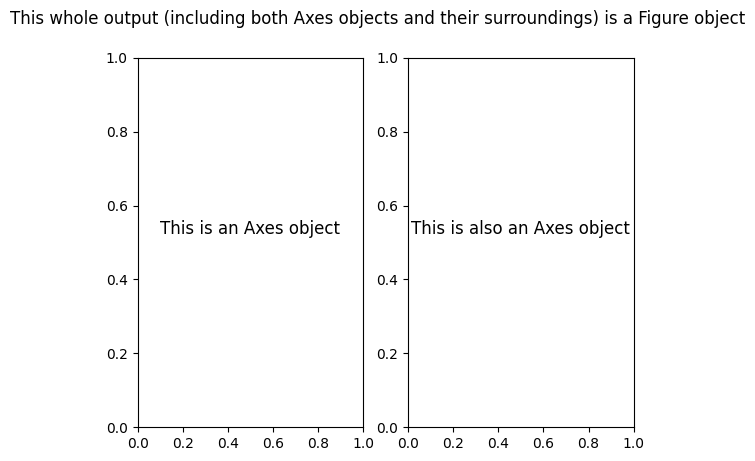

In [4]:
#The following line of code creates a Figure which contains two Axes objects
Figure, (Axes1, Axes2) = plt.subplots(1, 2)
#The next lines label each Axes object as such (I approximately centered the labels in each axis object)
Axes1.set_title("This is an Axes object", y = 0.5)
Axes2.set_title("This is also an Axes object", y = 0.5)

#This next line labels the whole figure
Figure.suptitle("This whole output (including both Axes objects and their surroundings) is a Figure object")

This visual hopefully will give you a better idea of what is an Axes object and what is a Figure object. Now, let's get into why this distinction matters. To do that, we will get into what we mean by a Figure-level function and an Axes-level function. 

On one hand, an Axes-level function works on the current Axes object, (or the one passed as an argument, but then it becomes the current Axes) if there is no current Axes object, it then creates one (and a Figure to go with it). However, an Axes-level function DOES NOT own its Figure, meaning that if two successive Axes-level functions are called, the first one will create a Figure and Axes (assuming there is no current Axes), and the second will simply use the same Axes as the first.

On the other hand, a Figure-level function DOES own its Figure, it creates its Figure and the appropriate number of Axes objects to go inside it, and edits it. This means that if two successive Figure-level functions are called, they will each create their own Figure object (unlike with Axes level functions). 

For example, in the above code `plt.subplots()` is a Figure-level function (which creates a Figure and its Axes objects, and does nothing else). `Axes.set_title()` is (as the structure suggests) a method of Axes objects (I  won't go into the distinction between methods and functions too much here, but a method is essentially a function that only works on a certain object, therefore, a method of Axes objects can be viewed for the sake of this as an Axes-level function). Finally, `Figure.suptitle()` is a method of Figure objects (which can't quite be viewed as a Figure-level function for sake of this simplified explanation since it edits an already existing figure but doesn't create it).

Note: When I said that Figure-level functions create their Figure, I don't mean it in the same way that Axes-level functions can create a Figure if there is no current Axes object. Axes-level functions can only create a Figure because matplotlib is smart and won't let you try to edit an Axes object that doesn't exist (to avoid having to needlessly raise errors), it therefore in that special case, creates an Axes object, and since all Axes objects must be contained in a Figure, it creates a Figure at the same time, meanwhile, Figure-level functions  

Since Figure-level functions create their Figure and that Figure could have as many Axes as you want, if you wanted say 20 scatter plots, it would makes sense to use a Figure level function which would allow you to create all of the plots in one call. However, by the nature of Figure level functions, they are much more rigid, if you want 2 histograms, 1 scatter plot, and 3 line plots on the same Figure object, it would be hard for a Figure-level function to actually make all those plots. This is where Axes-level functions come in, once you have created a blank Figure containing however many Axes you want, you can edit any specific Axes of that Figure by using an Axes level function on it (A Figure-level function that creates a Figure with 20 scatter plots in facts calls an Axes level function 20 times backend). Axes-level functions therefore give you more flexibility when it comes to plotting many different things. 

The conclusion of this rant on Axes-level versus Figure-level is quite simple, understand the strength and weaknesses of Axes-level and Figure-level functions (this will become more natural with experience), and take a second to think about your needs when choosing which one would be more appropriate for your data analysis needs. Often, it will depend more on what you're trying to communicate than on your dataset, and therefore there might not always be a clear cut right answer, so as long as you have a good idea of why you're doing what you're doing, trust yourself.

Finally, know that seaborn features three functions for creating figures (without plotting anything onto them), each of which creates an object that is a subclass of Figure, namely: `PairGrid`, `JointGrid`, and `FacetGrid` (generated by `sns.PairGrid()`, `sns.JointGrid()`, and `sns.FacetGrid()`), these generating functions are called by other Figure-level functions backend. However, I won't teach you how to use and generate these objects (or their distinctions), as it gets complicated, and I don't think I could make an explanation I would be proud of at an introductory level. Instead, when we need a grid of plots, we will use `matplotlib.pyplot.subplots()` to generate a grid of Axes objects, and if we need a Figure containing a single Axes, we will simply let the appropriate Axes-level function create it for us.

Now that we know about this, let's go over the structure of `sns.displot()`, and while we learn about this Figure-level function, we will also learn about the Axes-level functions for this section.

The first argument this function takes is accepted by all seaborn functions whose name end in plot. It's also their only positional argument: `data` takes a dataframe or other similar data structure. Many other arguments will take keys (or column names) from `data`.

The next (and second most important) argument: `kind` takes a string which must be one of `"hist"` (the default), `"kde"` or `"ecdf"` which determines which of `sns.histplot()`, `sns.kdeplot()`, and `sns.ecdfplot()` gets called backend to plot data on each of the subplots. (`sns.rugplot()` is actually not meant to be used on its own, and is therefore not an option here, we will see why later).

Then, `x` and `y` take arguments for the data to be plotted on the x and y axes, they must be column names of `data`. For univariate distributions, you should only specify one of these, (the one you choose to specify will affect which axis the distribution is plotted on). For bivariate distributions, specify both, however, know that `sns.ecdfplot()`, and thus `kind = "ecdf"` is incompatible with bivariate distributions.

The last argument before we do some exercises is `hue`, this is again, a column name from `data`. For distribution plots, that column must be discrete. Each possible value of the column passed as `hue` will be plotted in a different color. (Later on, we will discover that for some other seaborn functions, `hue` can be continuous, in which case the color map is a continuous scale). Note that this is different from `color`, another argument that can be passe: `color` is a matplotlib color (or list thereof) to impose onto the plot, while `hue` is a column name from `data`, meaning that each value of `data[hue]` gets its unique color. This means `color = "red"` is valid, but `hue = "red"` is only valid in the case where for some reason, `"red" in data.columns` (this is a boolean, so when it's `True`, it would work).

To practice this, create a kernel density estimate (kde) plot of the iris dataset plotting the univariate`"petal_length"` column. Give each flower species a different color. Just so that you have an example of what `sns.rugplot()` does, you should also call `sns.rugplot()` afterwards, passing the exact same `data`, `hue`, and `x` or `y` arguments as in the function you called to make the kde plot.

<Axes: xlabel='petal_length', ylabel='Density'>

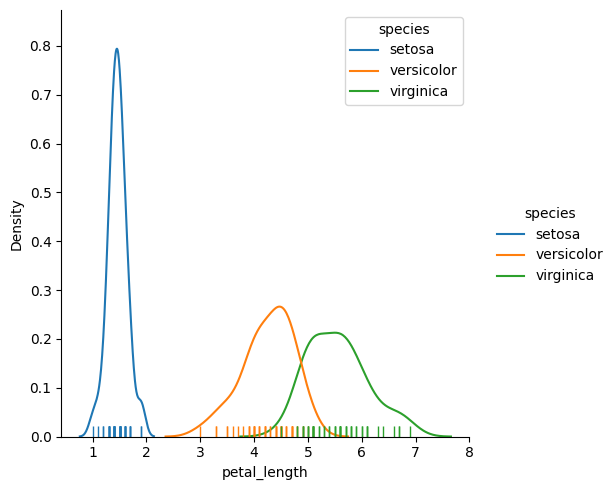

In [5]:
#Insert code for kde plot here
sns.displot(iris, x = "petal_length", kind = "kde", hue = "species") #if you passed y instead of x, good you're experimenting, but that is the wrong orientation of the graph here.
#I choose to use a Figure-level function here, but since I'm only generating one plot, and I don't need it to be overlayed on any existing Axes, I would rather just create a new Figure (just in case I had forgotten to plt.show() to reset the current figure to None), however, since this is a fresh code cell, it doesn't really matter (it will once I teach you about a few more arguments, and this won't necessarily be the right choice either), and you could've used the Axes-level sns.histplot() instead.

#Insert code for rugplot here. Since this is an Axes level function, get into the habit of thinking about this: which Axes is this going to appear on?
sns.rugplot(iris, x = "petal_length", hue = "species")

We notice a few things about this. First, the little spikes that appear at the bottom of the plot. This is what we call a rug, and what `sns.rugplot()` generates. Each small line is an individual observation (hence why it isn't meant to be used alone). Second, notice that if you used a Figure-Level function to generate the kde plot, the legend appears twice. That is because `sns.rugplot()` doesn't know that a legend already exists, and it therefore creates another legend. This makes sense as there is no reason to assume that the both plots would necessarily have the same legend, but in this case, they do, so we should remove one of the legends. To do that, know that all seaborn plotting functions have a `legend` parameter which takes a Boolean and is `True` by default, to hide the legend we simply need to set it to `False`. Now, you might wonder why a second legend didn't appear if you used the Axes-level `sns.kdeplot()` to make the kde plot instead of the Figure-level `sns.displot()`. Well the answer is it did. However, in that scenario, both legends appear at exactly the same spot, so one covers the other. Why don't Axes-level and Figure-level functions generate legends in the same spot? Well the answer is quite simple, an Axes-level function generates a legend for only the Axes it is applied on, therefore, it adds the legend somewhere on the Axes, while a Figure-level function makes a single legend for the entire Figure, and therefore places it on the Figure but outside of any Axes that are part of said Figure.

Furthermore, what I didn't tell you earlier, is that there is actually an advantage to using the Figure-level `sns.displot()` instead of the Axes-level `sns.kdeplot()` in the case where you want a plot that includes both a kernel density estimate and a rug. This advantage comes in the form of a single keyword argument accepted by `sns.displot()` but not `sns.kdeplot()`: `rug`, this argument takes a Boolean (`False` by default), if it is set to `True`, in addition to the main plot (determined by the `kind` argument), a rug plot will also be added.

While we are at it, let's introduce the other arguments that seaborn Figure-level functions take but not any of the Axes-level functions:
1. `height` and `aspect`: `height` takes a float, which represents the height of each subplot in inches. `aspect` also takes a float, which gives the aspect ratio of each subplot (the ratio width/height). Note that the only way to fix the width of the subplots is specifying both `height` and `aspect`, since $width=height\times aspect$
2. `row` and `col`: These are both column names from `data`. These columns must be discrete. Passing these will create a grid of subplots. Each unique value of the column passed as `col` will be it's own column in that grid (same idea for row)
3. `row_order` and `col_order`: If you want the rows and columns to appear in a specific order, pass a list (or another iterable) of the values of the column passed for `row` and `col` respectively. And the rows/columns of plots will appear in that order instead of the order they appear in the dataframe. Note, if `row_order` doesn't include every possible value of `data[row]`, only the values included in `row_order` will be included. Same idea for `col_order` of course.

Now that all this is said. You can again make the same kde plot on the iris DataFrame (rug included). With a few added constraints. Each species should be on its own column, you should only include versicolor and setosa (in that order). Each subplot should be 3 inches high by 5 inches wide.

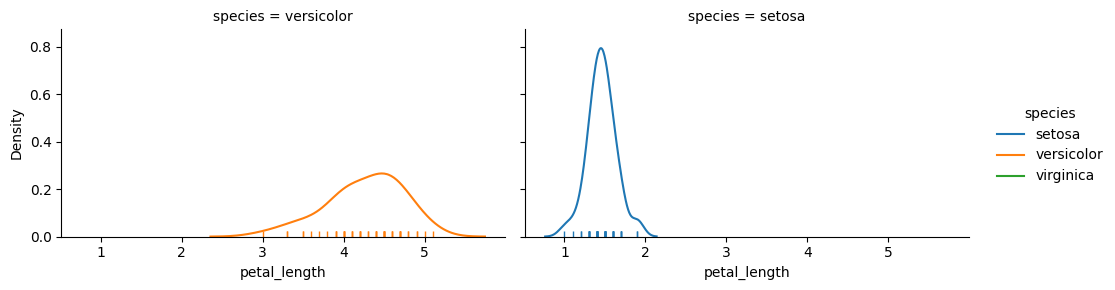

In [6]:
#Insert new Figure code here
sns.displot(iris, x = "petal_length", hue = "species", kind = "kde", col = "species", col_order=["versicolor", "setosa"], rug=True, height=3, aspect=5/3)

Finally, before we conclude this section with some exercises (and then quickly get to bivariate distributions), here are some more rapidfire arguments each of the functions can accept (that we haven't covered yet):
`sns.histplot()`:
1. `stat`: this takes a string `"count"` by default, but it could also be one of `"frequency"`, `"probability"`/`"proportion"` (these act the same), `"percent"`, or `"density"`. Count plots the actual number of observations in the bin. Frequency plots $Count/bin\_width$. Probability and Proportion normalize so that the sum of bin heights equals 1. Percent normalizes so that the sum of bin heights equals 100. Density normalizes so that the area of the histogram equals 1.
2. `bins`: Can either be the number of bins or an iterable of the bin edge positions.
3. `binrange`: This is an iterable of two numbers, the first being the left edge position of the left-most bin and the second being the right edge position of the right-most bin
4. `binwidth`: Width of each bin. IMPORTANT NOTE: specifying this overrides `bins`. If you want to impose a bin count and bin width, you should use `binrange` in cunjunction with `binwidth`.
5. `multiple`: This argument determines the behaviour when multiple histograms would be plotted on the same Axes (from specifying hue for example). It can be one of the following: `"layer"` (the default), `"dodge"`, `"stack"` or `"fill"`. Layer will simply place each histogram on top of the other (with slightly increased transparency) (Note that often, `element="step"` another argument which I won't go further into has the same effect but looks better). Dodge will make the bins thinner so that they all get their own space without overlapping. Stack will layer the histograms, by systematically placing the highest bin at the front, so that all bins are visible. Fill will fill the whole vertical space by putting the bins on top of one another. It makes it easy to see the ratio of bin heights, but looks really weird.
6. `kde`: This is a boolan (`False` by default), if set to `True`, this will add a kernel density estimate plot on top of the histogram. (The kde will be appropriately normalized to the histogram).

`sns.kdeplot()`:
1. `bw_method`: If you don't know scipy, don't worry about this one. If you do know scipy, this is the method that determines the smoothing bandwidth to use. It is passed to `scipy.stats.gaussian_kde`

`sns.ecdfplot()`: We haven't really discussed this one and for good reason, a histogram is usually better. But since it exists, I might as well tell you what it does. Ecdf stands for empirical cumulative distribution function, meaning it plot's the number of observations less than or equal to a certain value against that value.Here is the only argument it takes that you might want to know about:
1. `stat`: works exactly like in `sns.histplot()` except it only accepts `"count"`, `"proportion"`, or `"percent"`.

`sns.rugplot()`:
1. `height`: takes a float between -1 and 1 (I don't know if it accepts something outside of that range, but given what it does, don't try), which represent the proportion of the Axes object to cover. If it is negative, the rug will be on the exterior of the x and y axes, if it is positive, it will be on the interior. For negative height values, you have to specify another keyword argument, namely: `clip_on=False`

All Axes-level functions also accept `alpha`, which is the opacity level between 0 and 1, (1 being fully opaque and 0 being fully transparent). Note, they only accept this keyword argument because it's a keyword argument common to all matplotlib functions that can be called backend.

`sns.displot()`:
1. `log_scale`: This takes a boolean or number or pair of bools or numbers. `True` sets both the axes scales to logarithmic scale (unsure if it's base 10 or e, but my guess is 10, don't quote me on that though). A number is interpreted as the base you want the log to be in. A pair of booleans or numbers works like a single one except the first is applied onto the x axis, and the second onto the y axis.
2. `rug_kws`: a dictionnary of keyword arguments to pass to `sns.rugplot()` if `rug=True` and do nothing with otherwise. You can pass this in two ways. Either explicitly make a dictionnary, i.e.: `rug_kws={"keyword1":value1, "keyword2":value2, ...}` in which case the keyword must be a string. Or using the python `dict()` function, in which case it would look something like `rug_kws=dict(keyword1=value1, keyword2=value2, ...)`.
3. `**kwargs`: Any extra keyword arguments that are accepted by the appropriate Axes-level function (determined by `kind`) is also accepted.

All of them (Axes-level and Figure-level):
1. `hue_order`: works like `row_order` and `col_order`, except it is applied on the `hue` argument. Why is this useful if you aren't specifying the color you want ? Well, if you're plotting multiple things on the same figure, it is helpful to ensure that the same color represents the same thing every time.

I know that is a lot to take in, so how about writing some code to start getting used to all of this, a

For this next exercise, we will use the penguins dataset, it contains bill length, bill depth, flipper length, and body mass measurements for 3 different species accross three different islands.

In this next cell, you should create four distinct $3\times3$ grids of plots. One grid for the distribution of each of the variables. (I have generously given you a list of all the numerical columns of the dataframe in case you want to loop over those columns). Each penguin species should be a different color. Each island should be a row of the grid and each species should be a column. Each plot should be a histogram with a kernel density estimate overlayed on top. You should also include a rug on the exterior of the x axis (make sure that the rug isn't too long as to hide parts of the axis tick labels). Normalize the histograms to show percentage counts, and make sure each of them includes 10 bins. Finally, just for fun (or because I decided to be annoying, I will let you be the judge of that), choose a size for each subplot, it can be anything as long as the subplot isn't square (i.e. anything but the default).

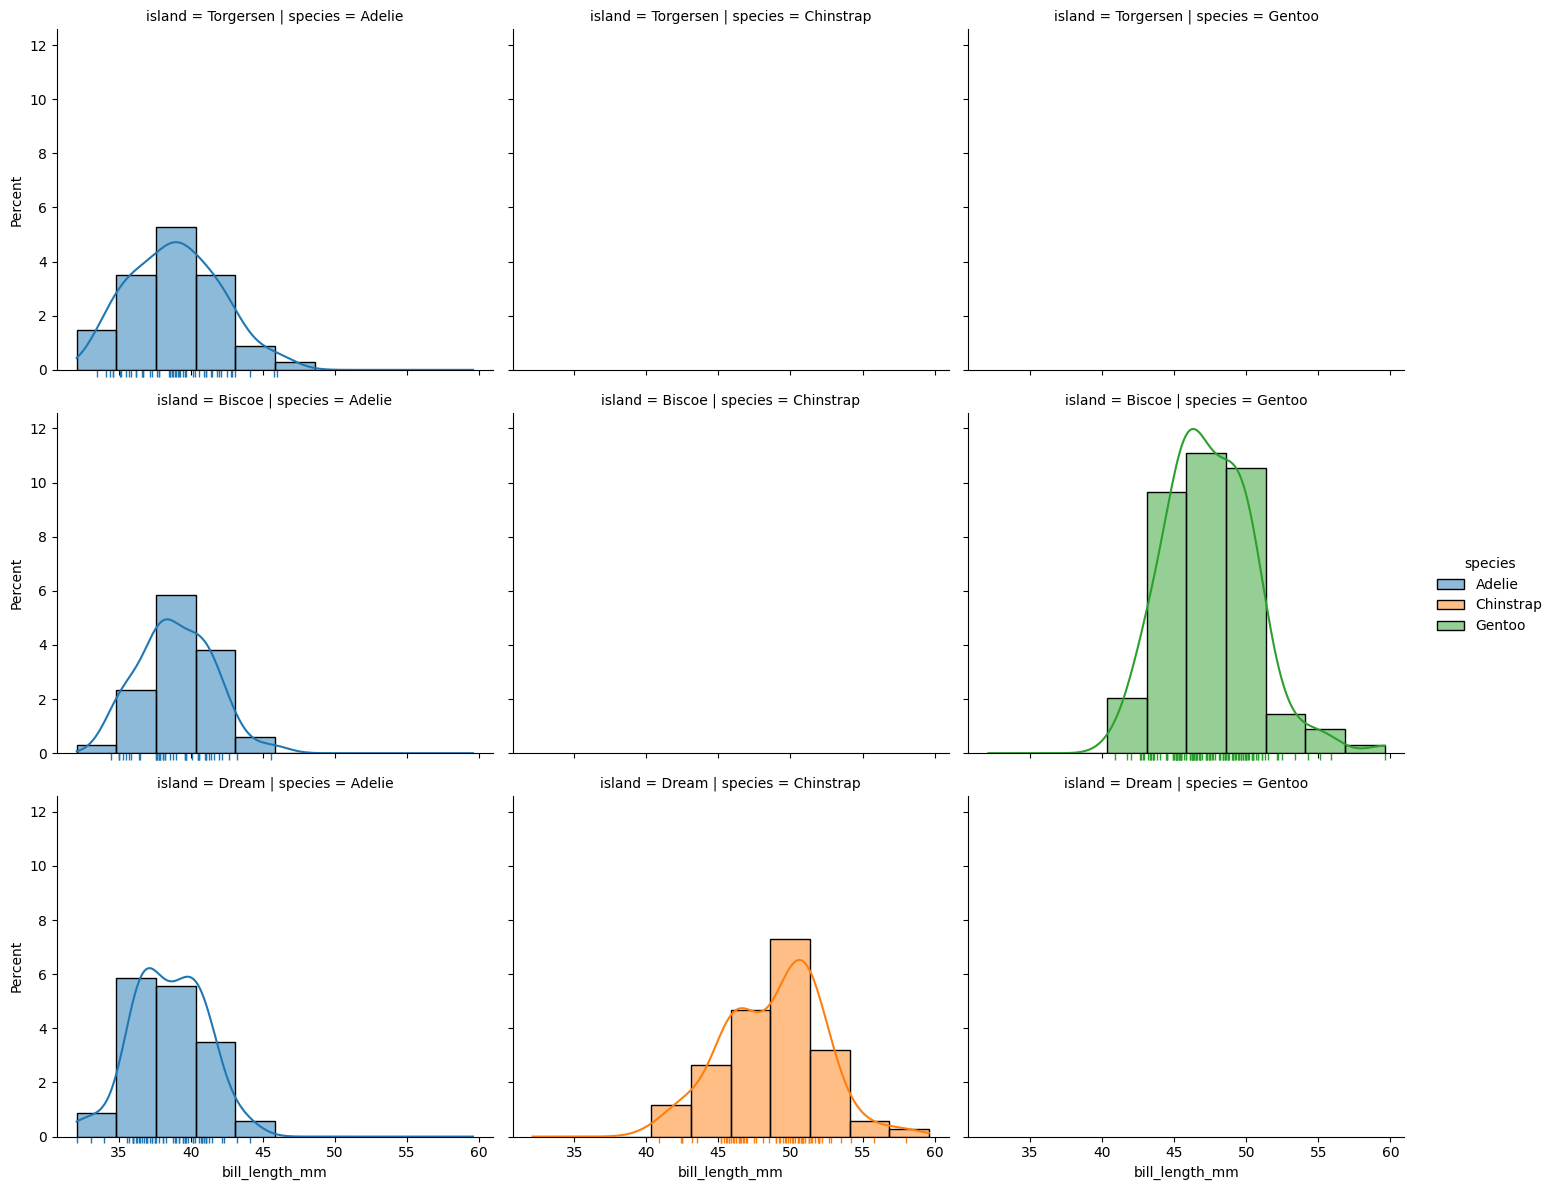

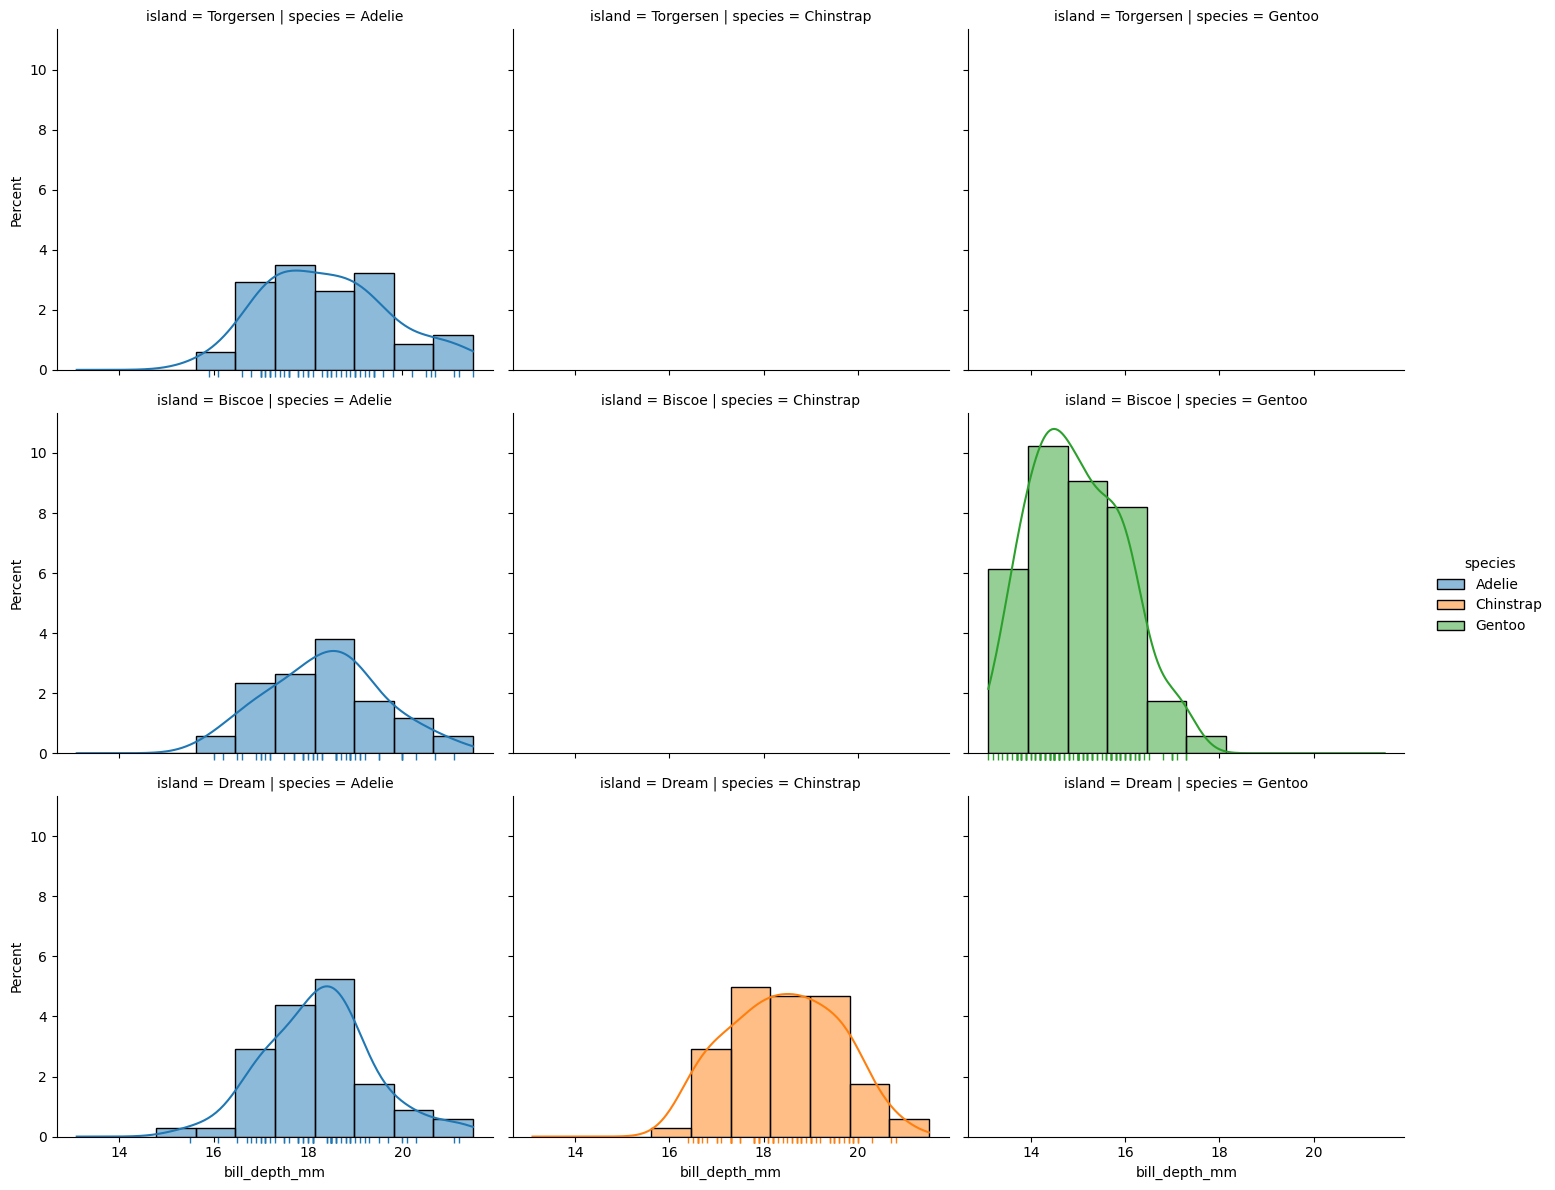

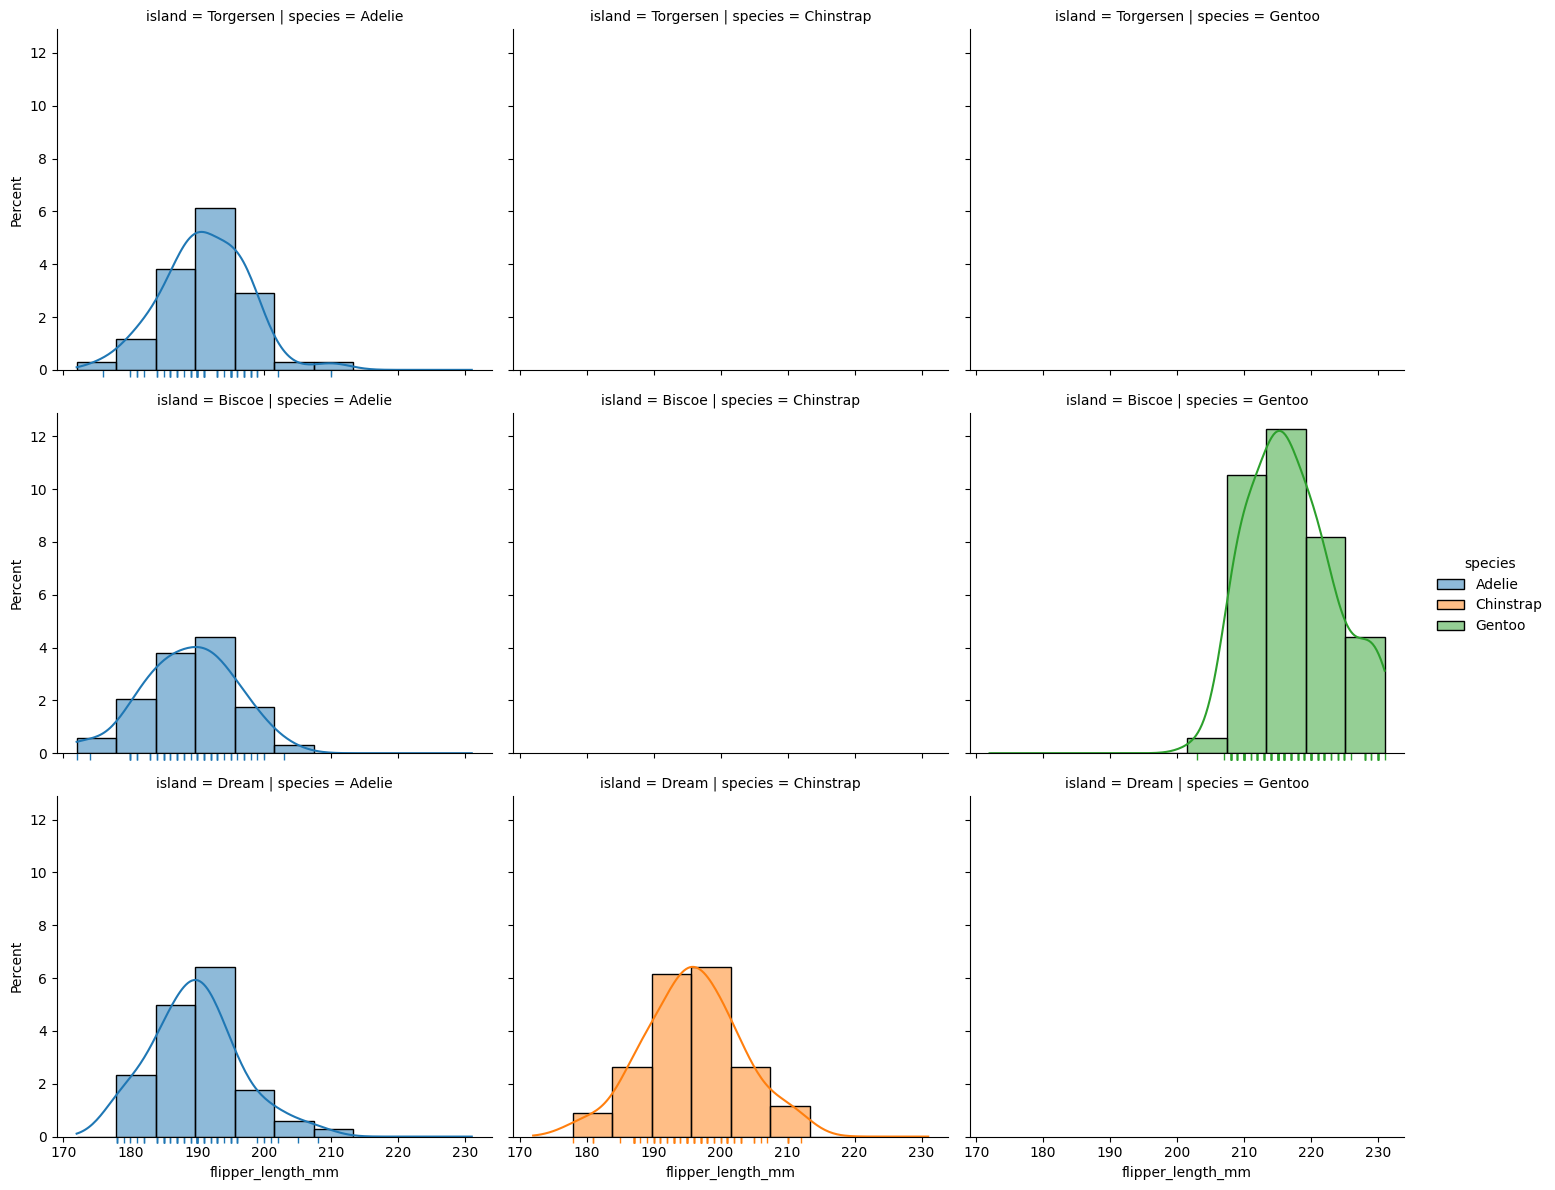

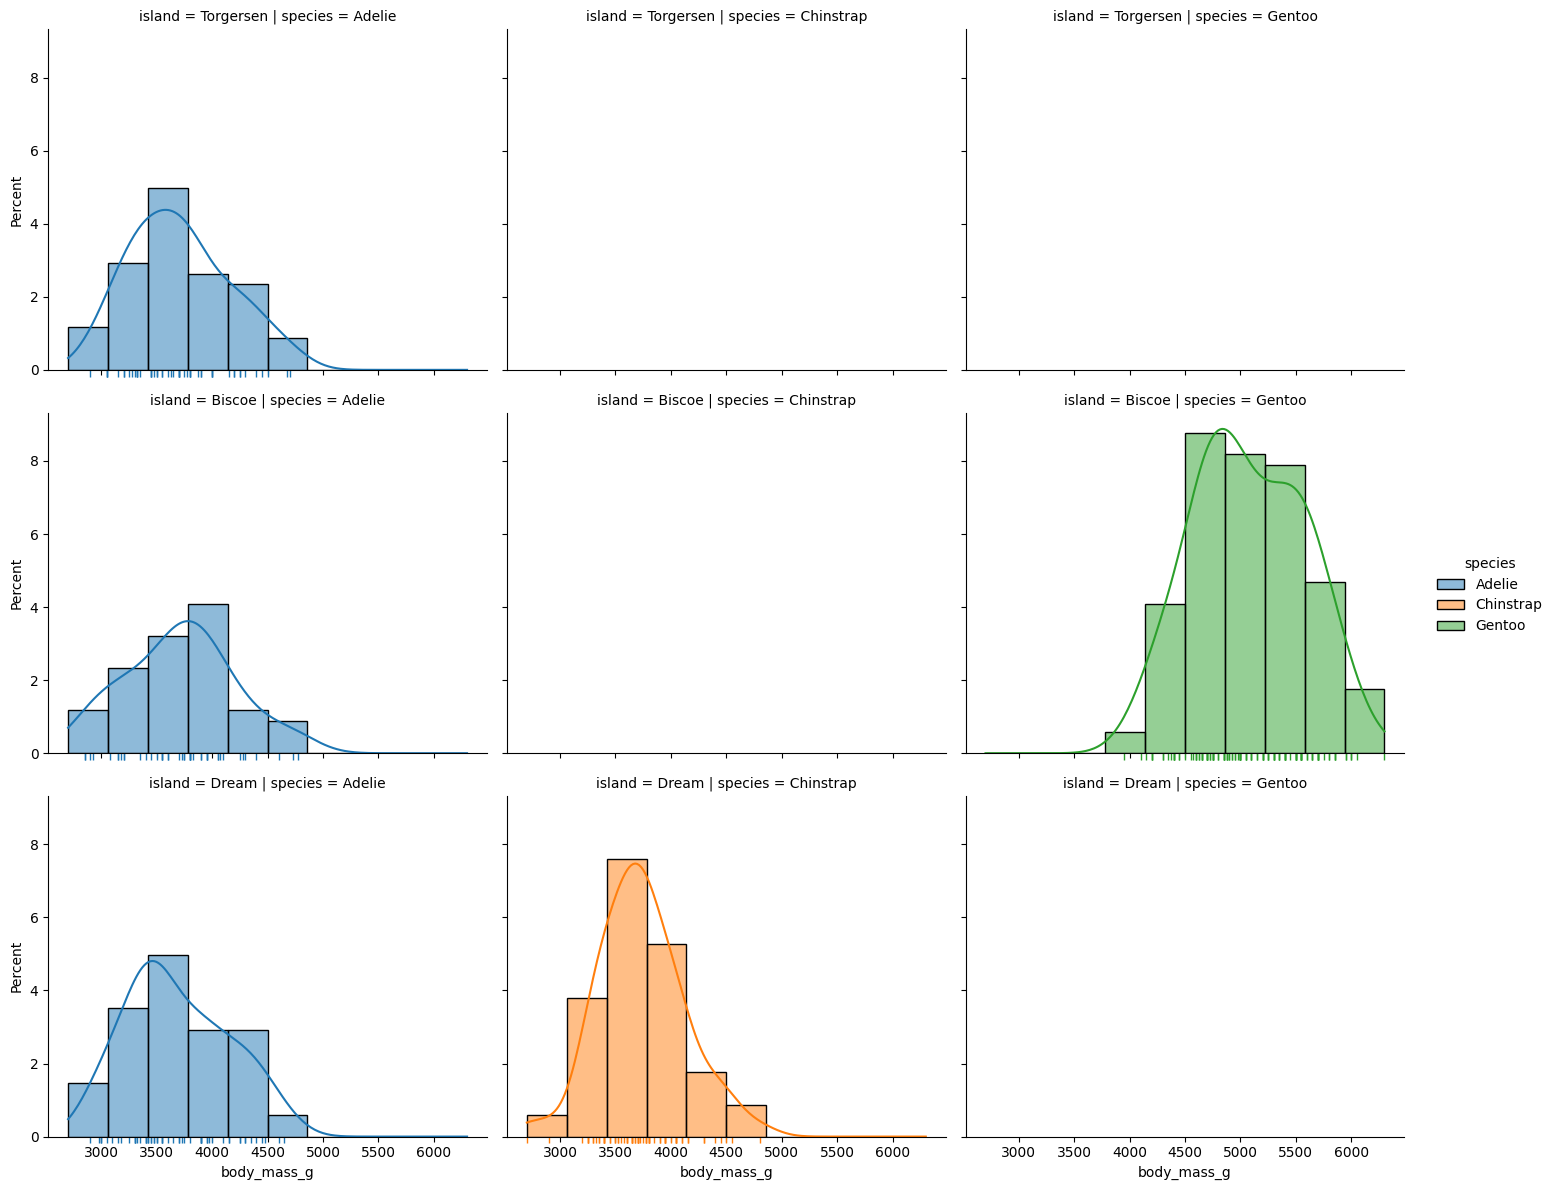

In [7]:
#Time to make lots of plots in very few lines of code
numerical_columns_penguins = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
#loop over the columns here
for i in numerical_columns_penguins:
    sns.displot(penguins, x=i, hue="species", col="species", row = "island", kde=True, stat="percent", bins=10, height=4, aspect=1.2, rug=True, rug_kws=dict(height=-0.02, clip_on=False, expand_margins=False))
#You might have noticed that stat="percent" is acting weird as the sum of bin heights on some histograms is clearly not 100, that is because, it is the percentage of total observations, meaning that the sum of bin heights in the entire 3 by 3 grid is what actually equals 100.

You might be wondering why your plots are suddenly levitating above the axis. The answer is both quite simple and quite stupid. For some reason, a keyword argument in `sns.rugplot()` breaks and decides to act weirdly when the function is called by a Figure-level function to make a grid of plots. The argument in question is `expand_margins` (`True`) by default, it is meant to give the plot extra space so that the rug doesn't overlap with plot elements. But when it is `True` and `sns.rugplot()` is being called by a Figure-level function it expands the margin on the wrong side of the axis if `height` is negative, or simply doesn't if `height` is positive. (My best guess for why is because the control it had over the outside margin was overriden by `sns.displot()`, and some sort of underflow error happens causing it to expand the margin on the wrong side. That would explain why sometimes the wrong thing happens. For why the rest of the time nothing at all happens, my best guess it that the bottom margin is hard coded somewhere towards the end of the `sns.displot()` function, though this is pure guesswork and probably wrong, I would have to look through the seaborn source code to really be sure of what happens and frankly, I got better things to do). That said, you can fix the levitating by setting `expand_margins=False`.

In the next cell, make the same grids of plots, except you should make ecdf plots instead of histograms with kdes overlayed onto them. You should keep the rug plot and other formatting intact

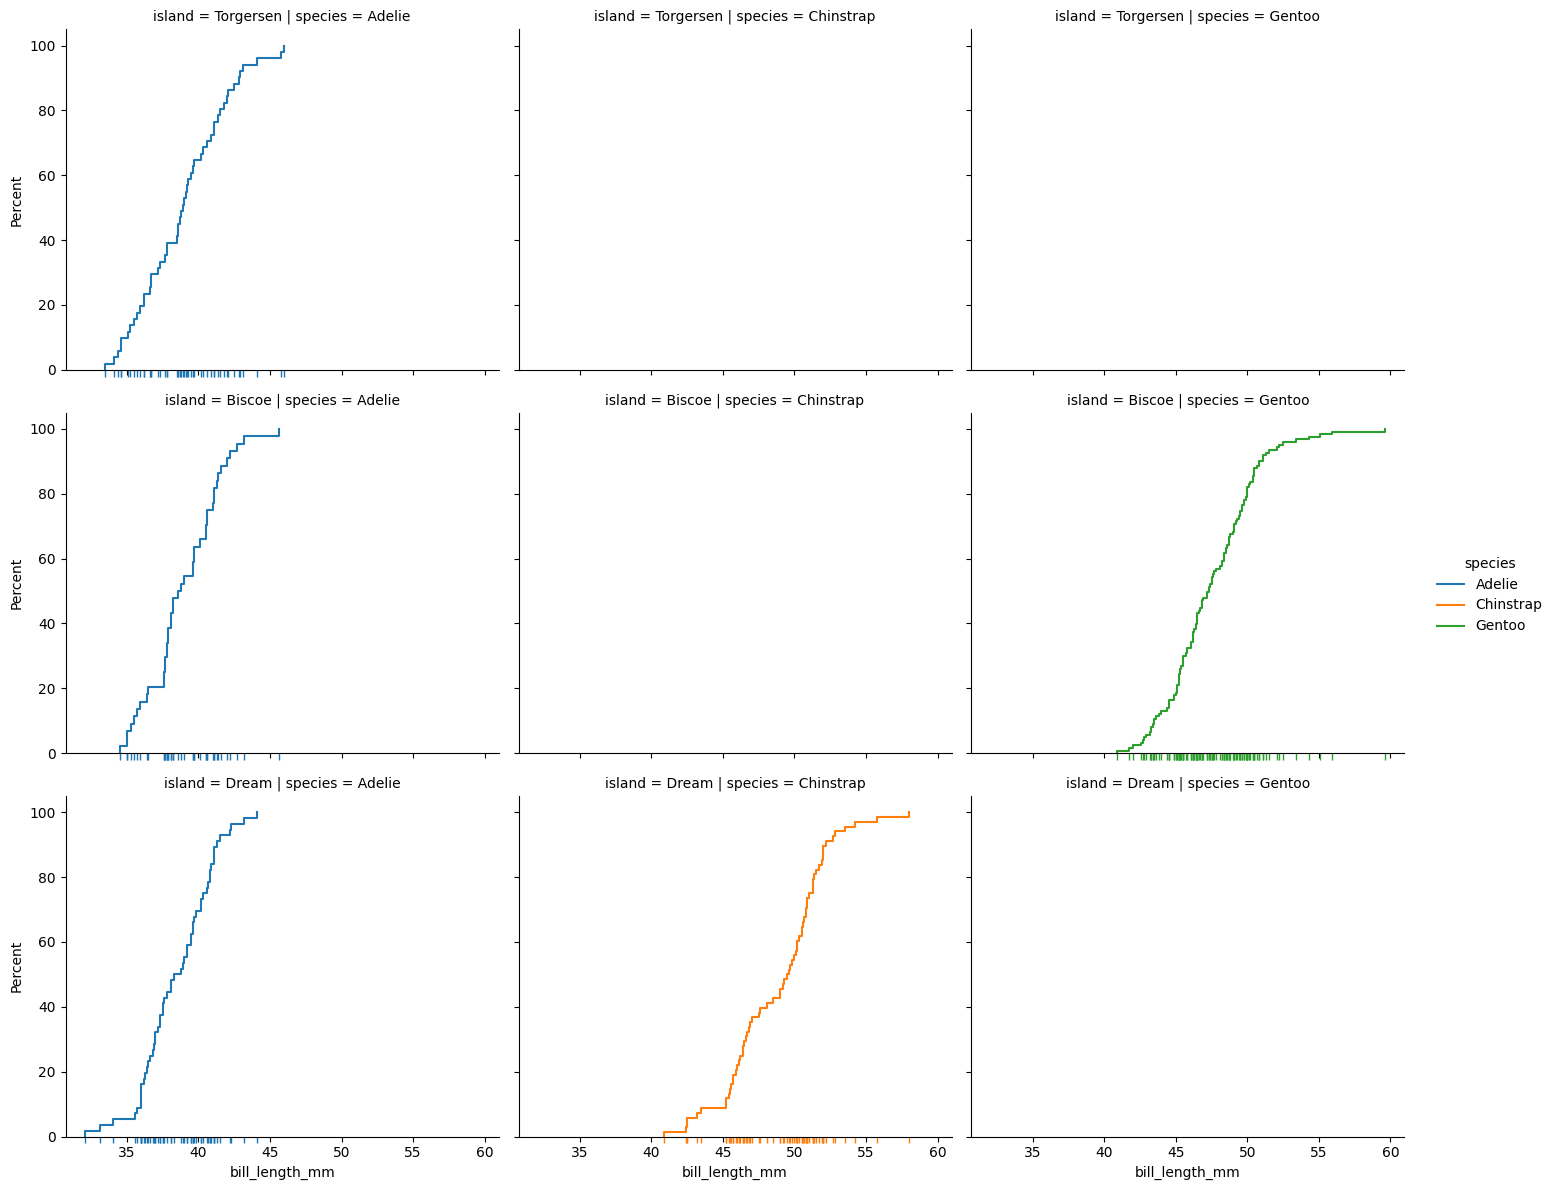

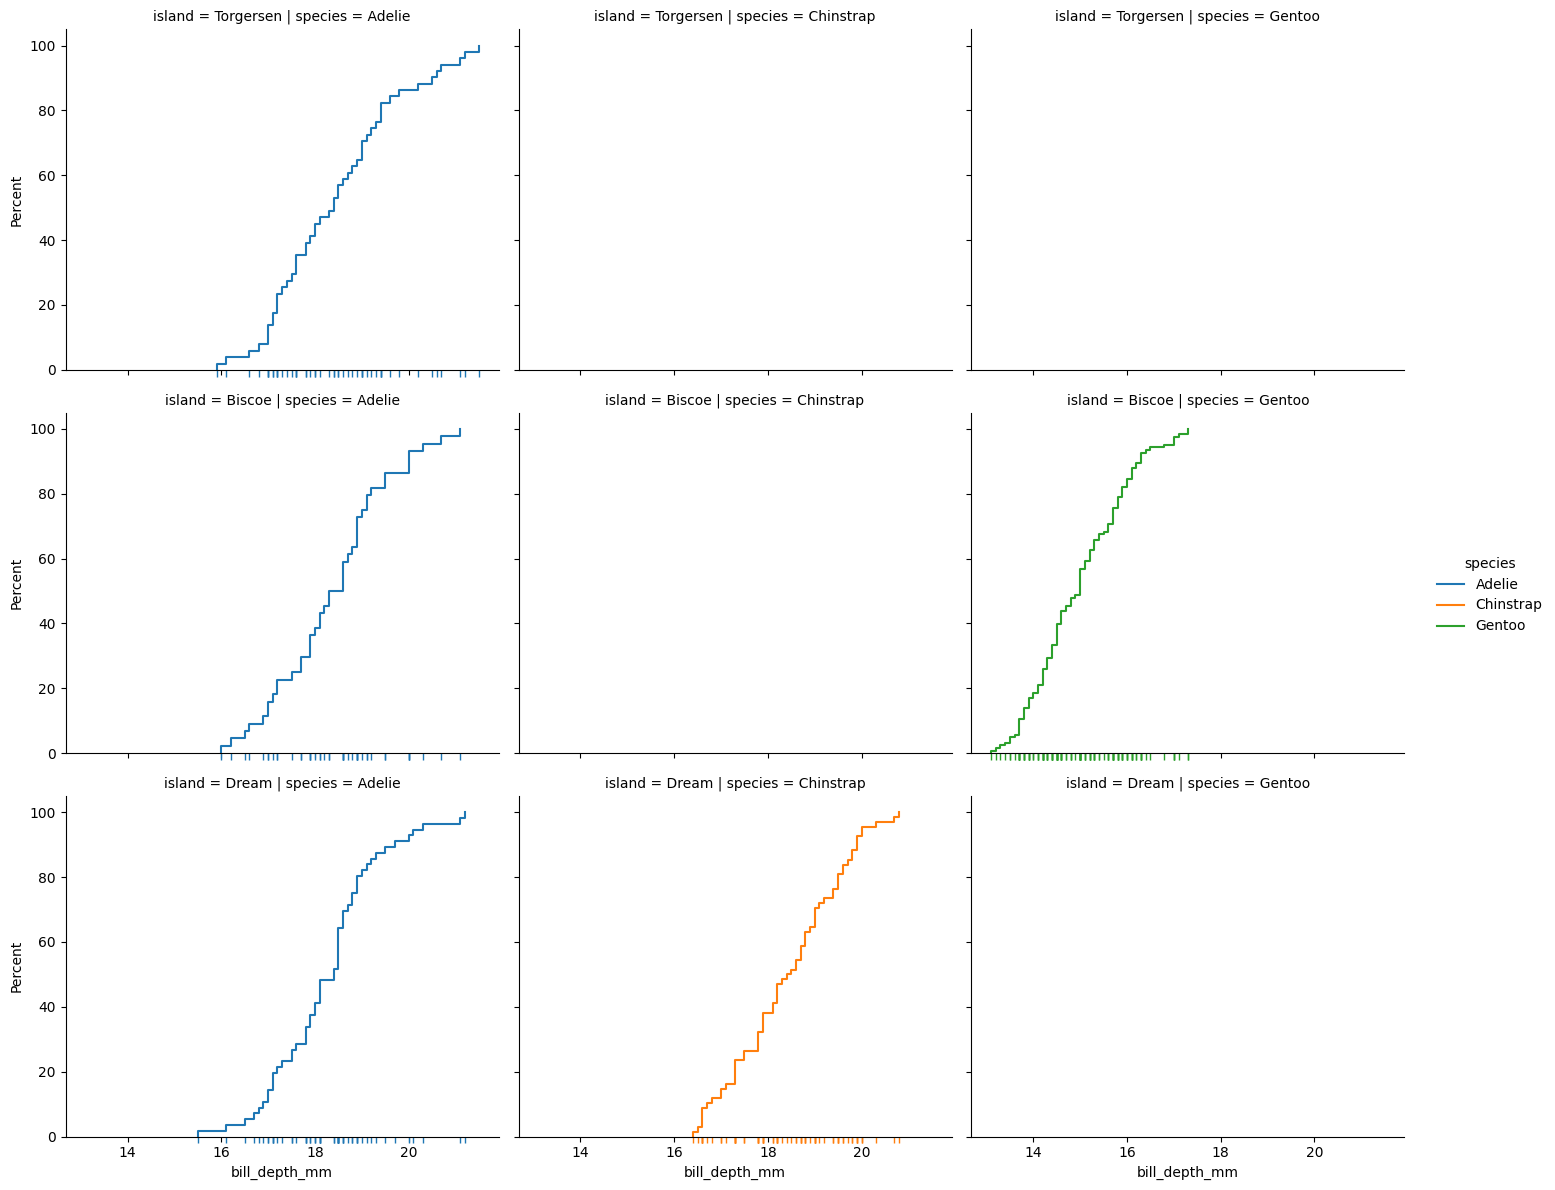

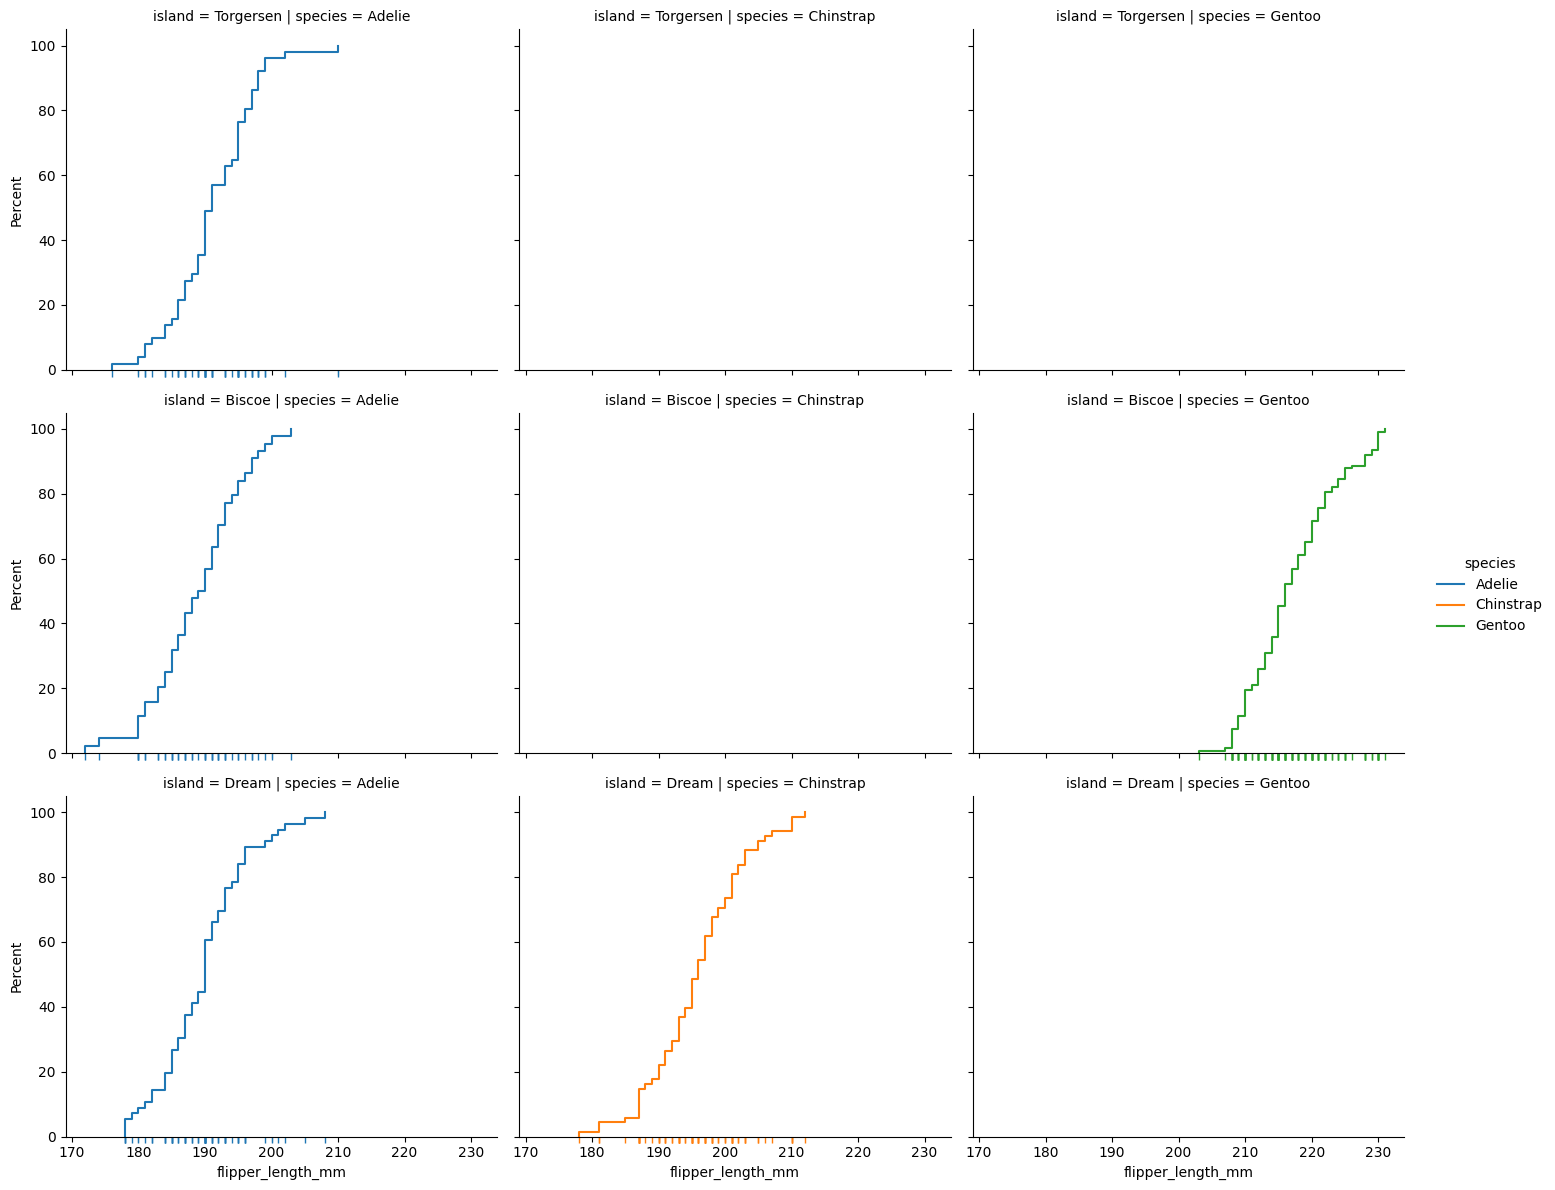

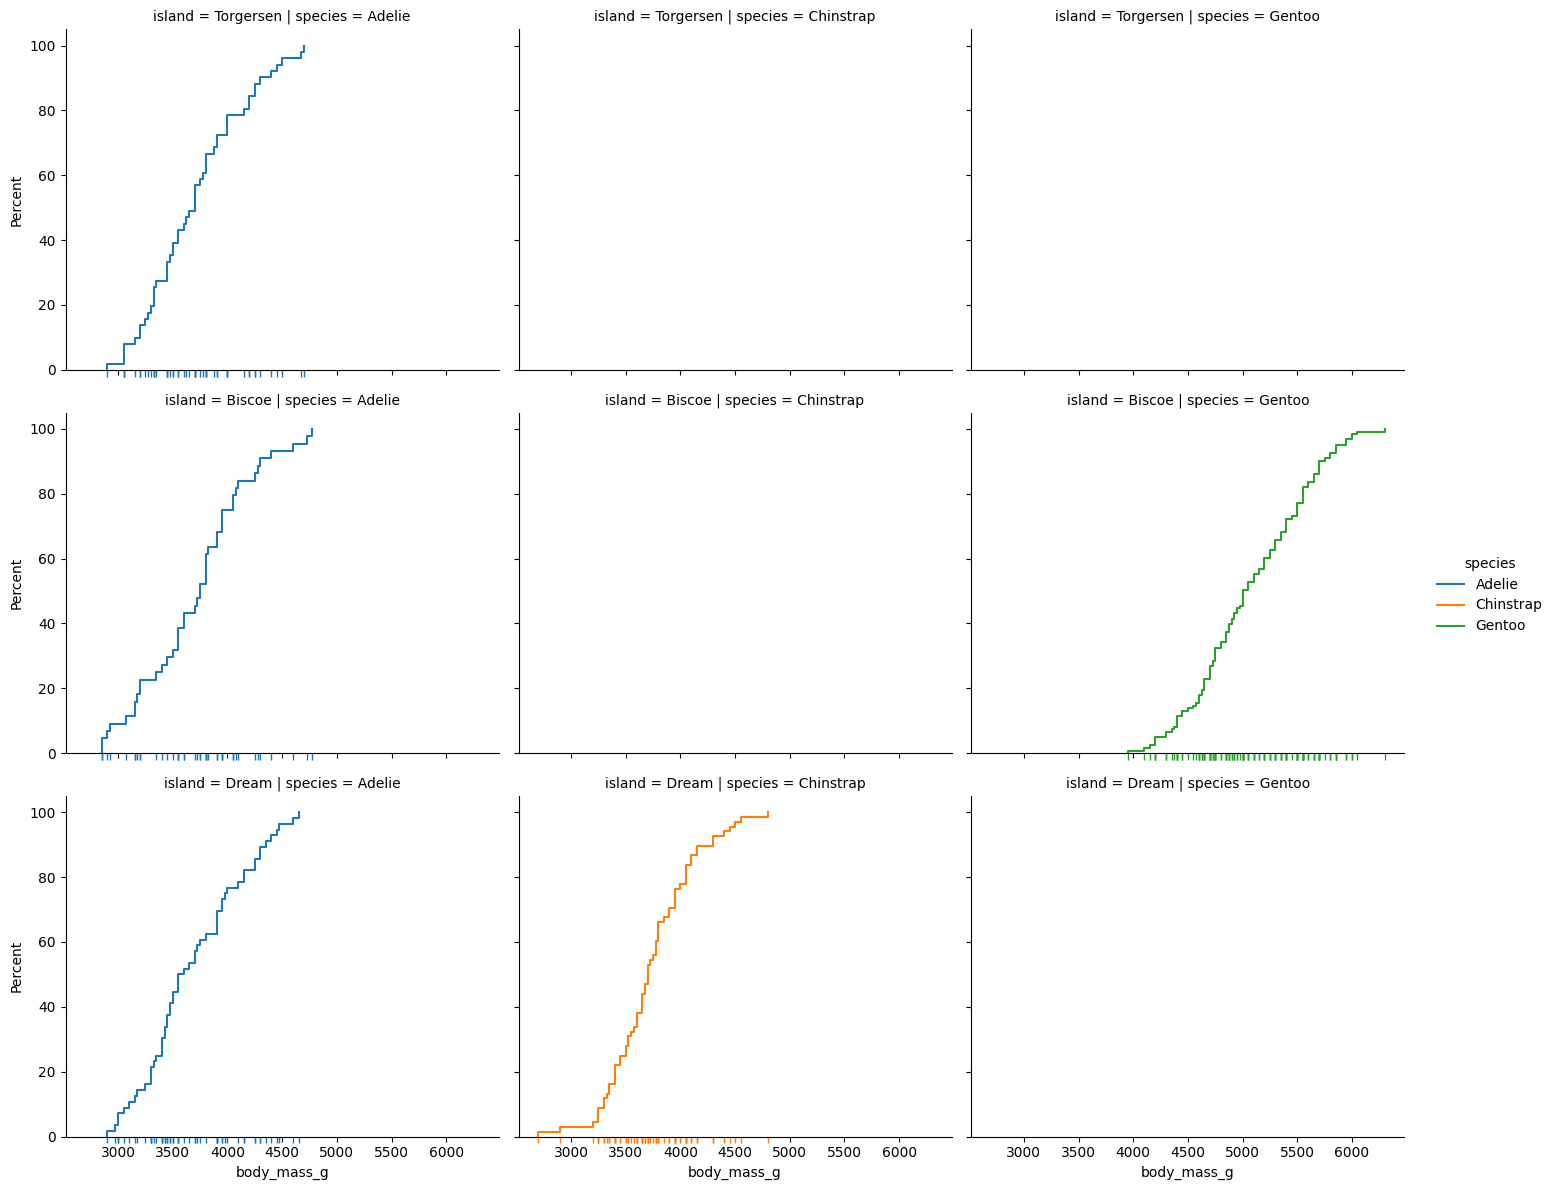

In [8]:
#Make your first (and last) ecdf plot ever here.
for i in numerical_columns_penguins:
    sns.displot(penguins, x=i, hue="species", col="species", row = "island", kind="ecdf", stat="percent", height = 4, aspect = 1.2,
                rug=True, #There is no good reason to do this (since ecdf goes up at every observation anyways), except it let's me make you practice passing keyword dictionnaries
                rug_kws={"height":-.02, "clip_on":False, "expand_margins":False}) 
#If you didn't know, it is in fact possible to add a line break mid function call as long as you know how to properly indent.

Now, you might be wondering how you could add a title to the whole figure, well there is a trick for that: use matplotlib (You could use the seaborn `FacetGrid` object, by specifying `facet_kws` in the call, but that gets complicated, and you end up specifying matplotlib arguments anyways). So what you should instead do is store the output of `sns.displot()` in a variable, by doing something along the lines of `plot = sns.displot(...)`, then you get the Figure object in plot with `plot.fig` attribute, and use the matplotlib method (you don't even need to import matplotlib for any of this since seaborn works with it backend): `fig.suptitle()`. Which takes 3 (main)arguments, the only positional argument being a string (the figure title). Then, `y` is the vertical position of the title on the figure (0 being at the bottom and 1 at the top), passing floats above 1 is allowed, and often values from 1 to 1.05 are preferrable. Finally, the `fontsize` argument takes the desired fontsize.

In general, the line that sets the plot title could look something like this:
```
plot.fig.suptitle("Title of your figure", y = 1.02, fontsize = 20)
```
Note, while I was working on this, the `.fig` attribute was deprecated in favor of `.figure`, the original one still works, for compatibility's sake, and I'm too lazy to change my solutions, however, the proper way to do this now is:
```
plot.figure.suptitle("Title of your figure", y = 1.02, fontsize = 20)
```
From now on, you should always give your figures titles. (And I will be including figure titles in my solutions, provided I don't forget, if I do, tell me in which cell, and on which line, and I will add it)

Now, before we move on to bivariate distributions: Here's one last exercise. On the tips dataset this time. This dataset is from a restaurant, it tracks their customers' total bill amount, their tip amount, the time of day, the day of the week, the customer's sex, their party size, and whether or not they smoked. In the next code cell, make two $2\times4$ grids of plots (one grid per numerical column, again if you want to loop over them, I have given you the list). Each day of the week should be unique column, and each time of the day should be a row. You should make each subplot a histogram with a kde overlayed on top. You shouldn't include a rug this time. Make two colors of histograms depending on whether the customer smokes or not (the order should be `"Yes"` then `"No"`). Since you will have multiple histograms on each subplot, you will need to do something about them overlaying (other than layering them and doing nothing else)

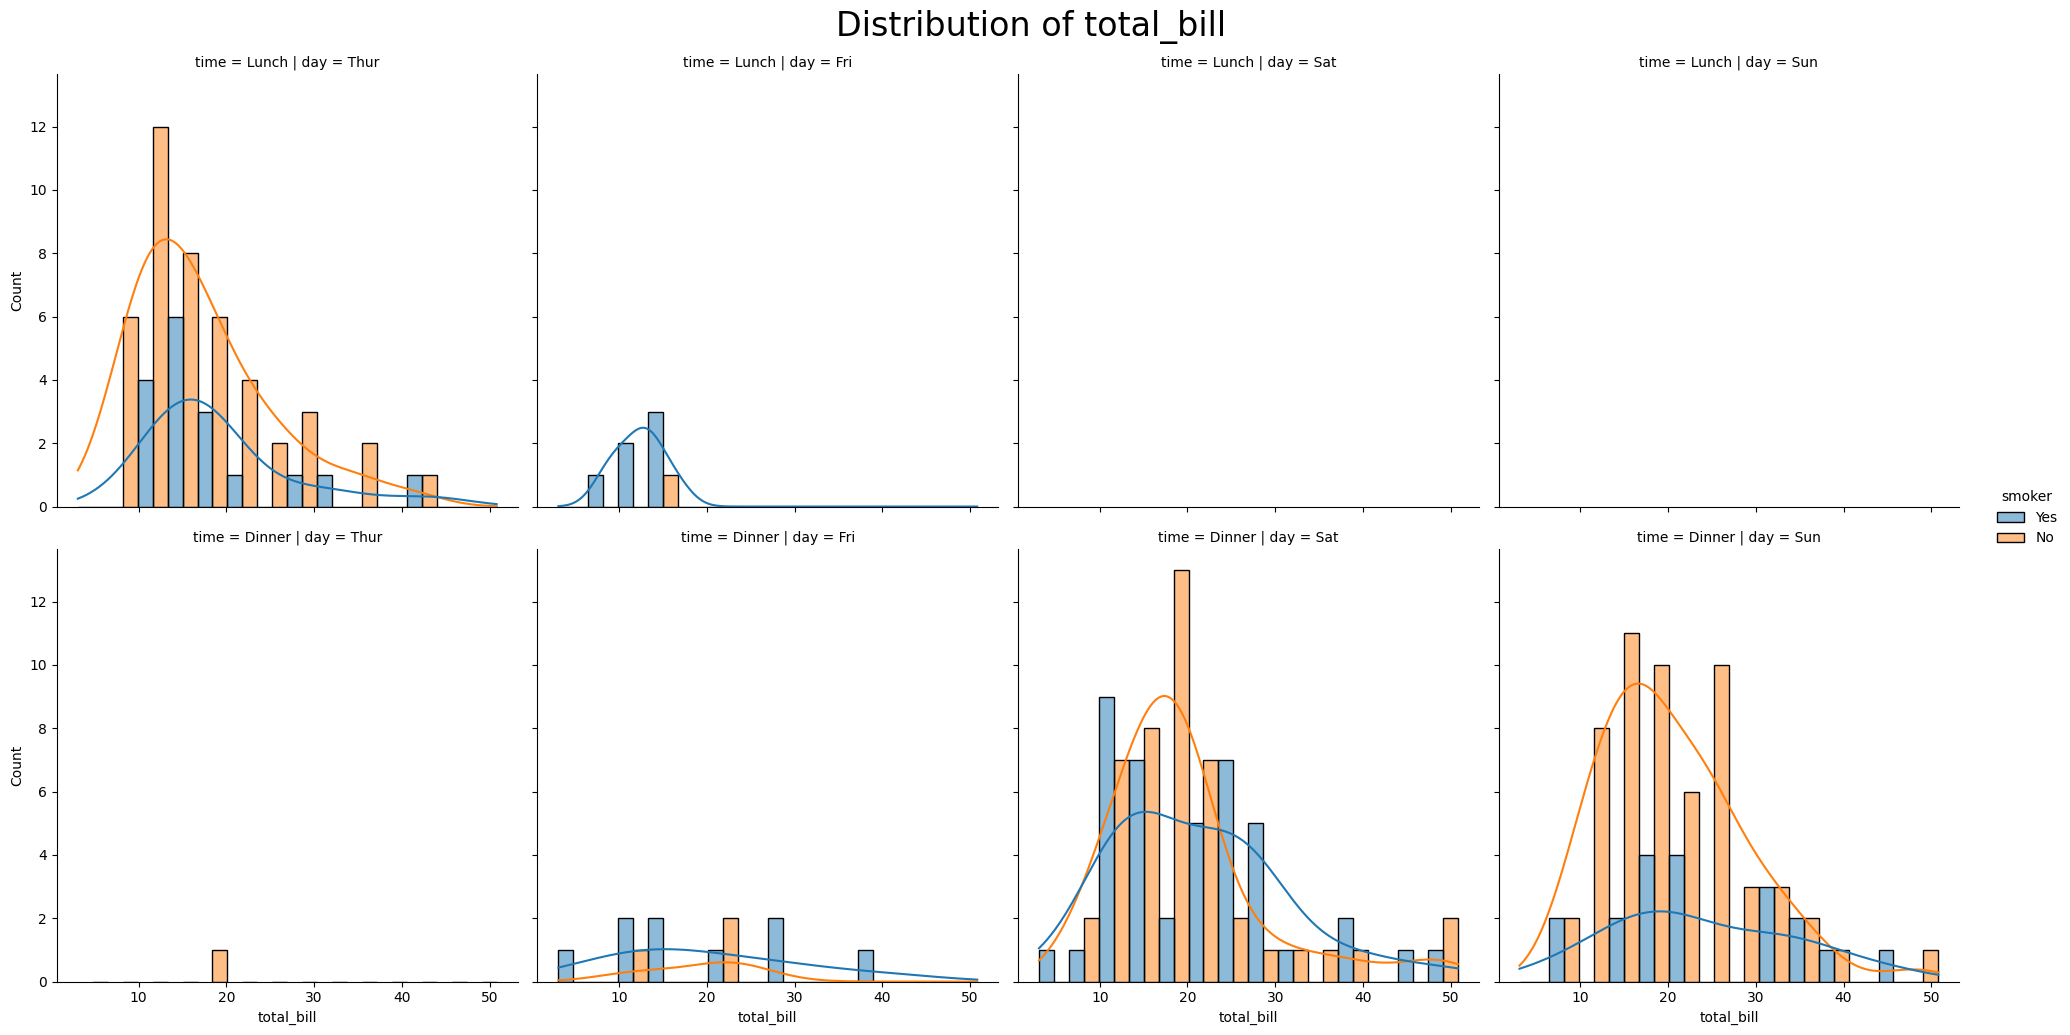

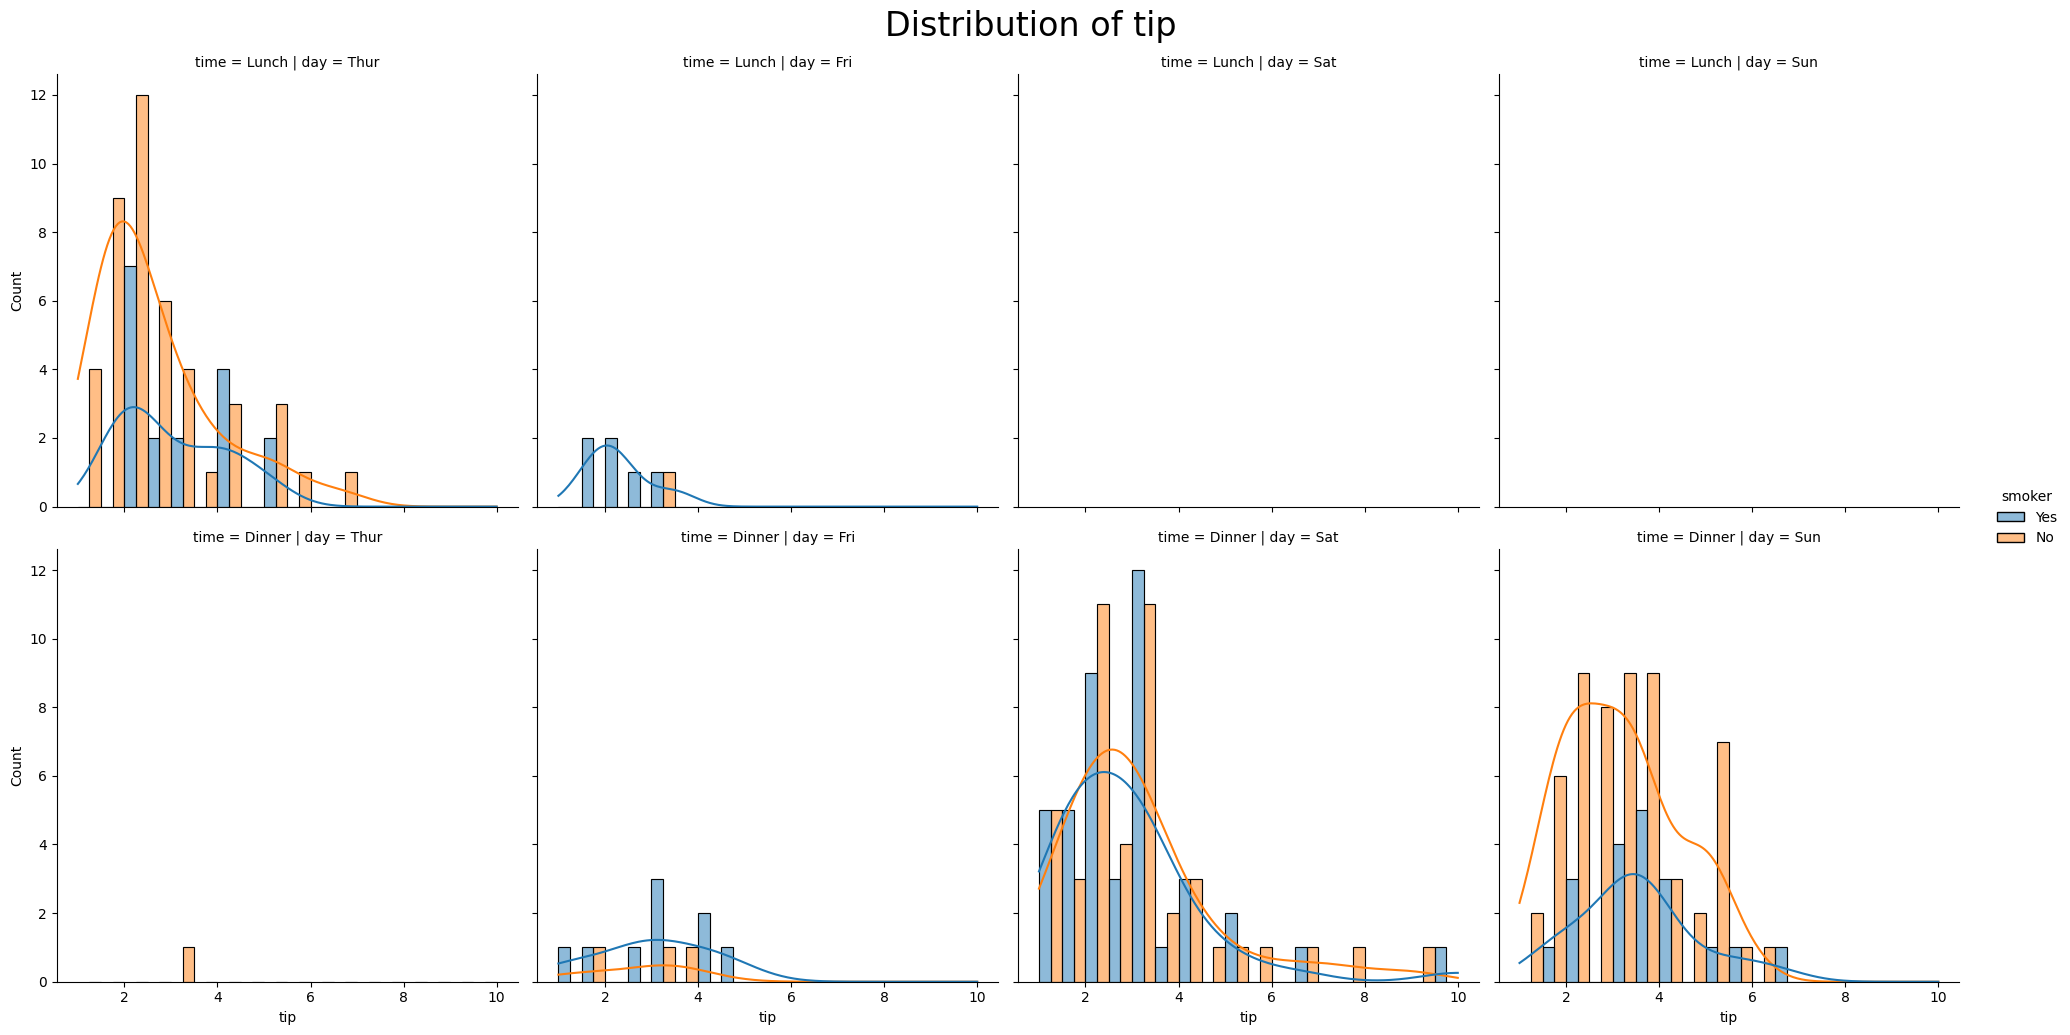

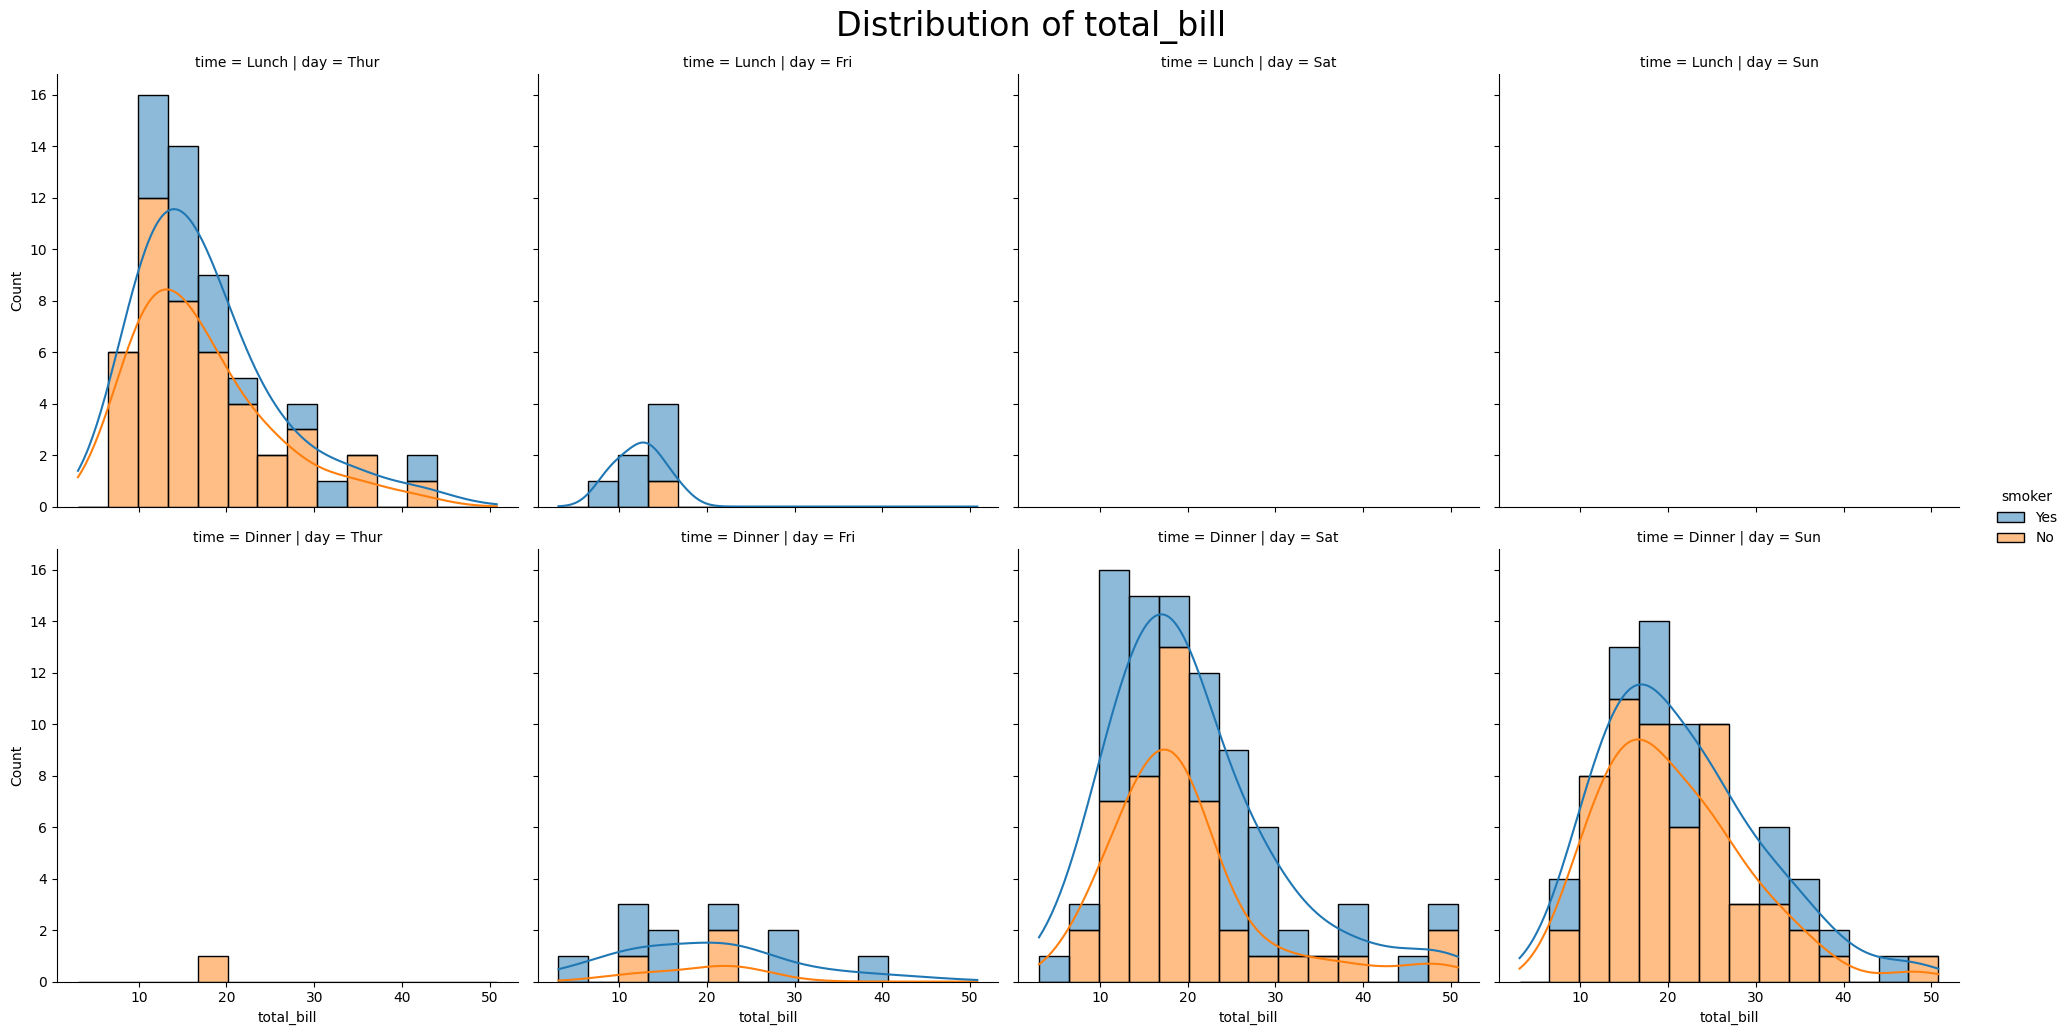

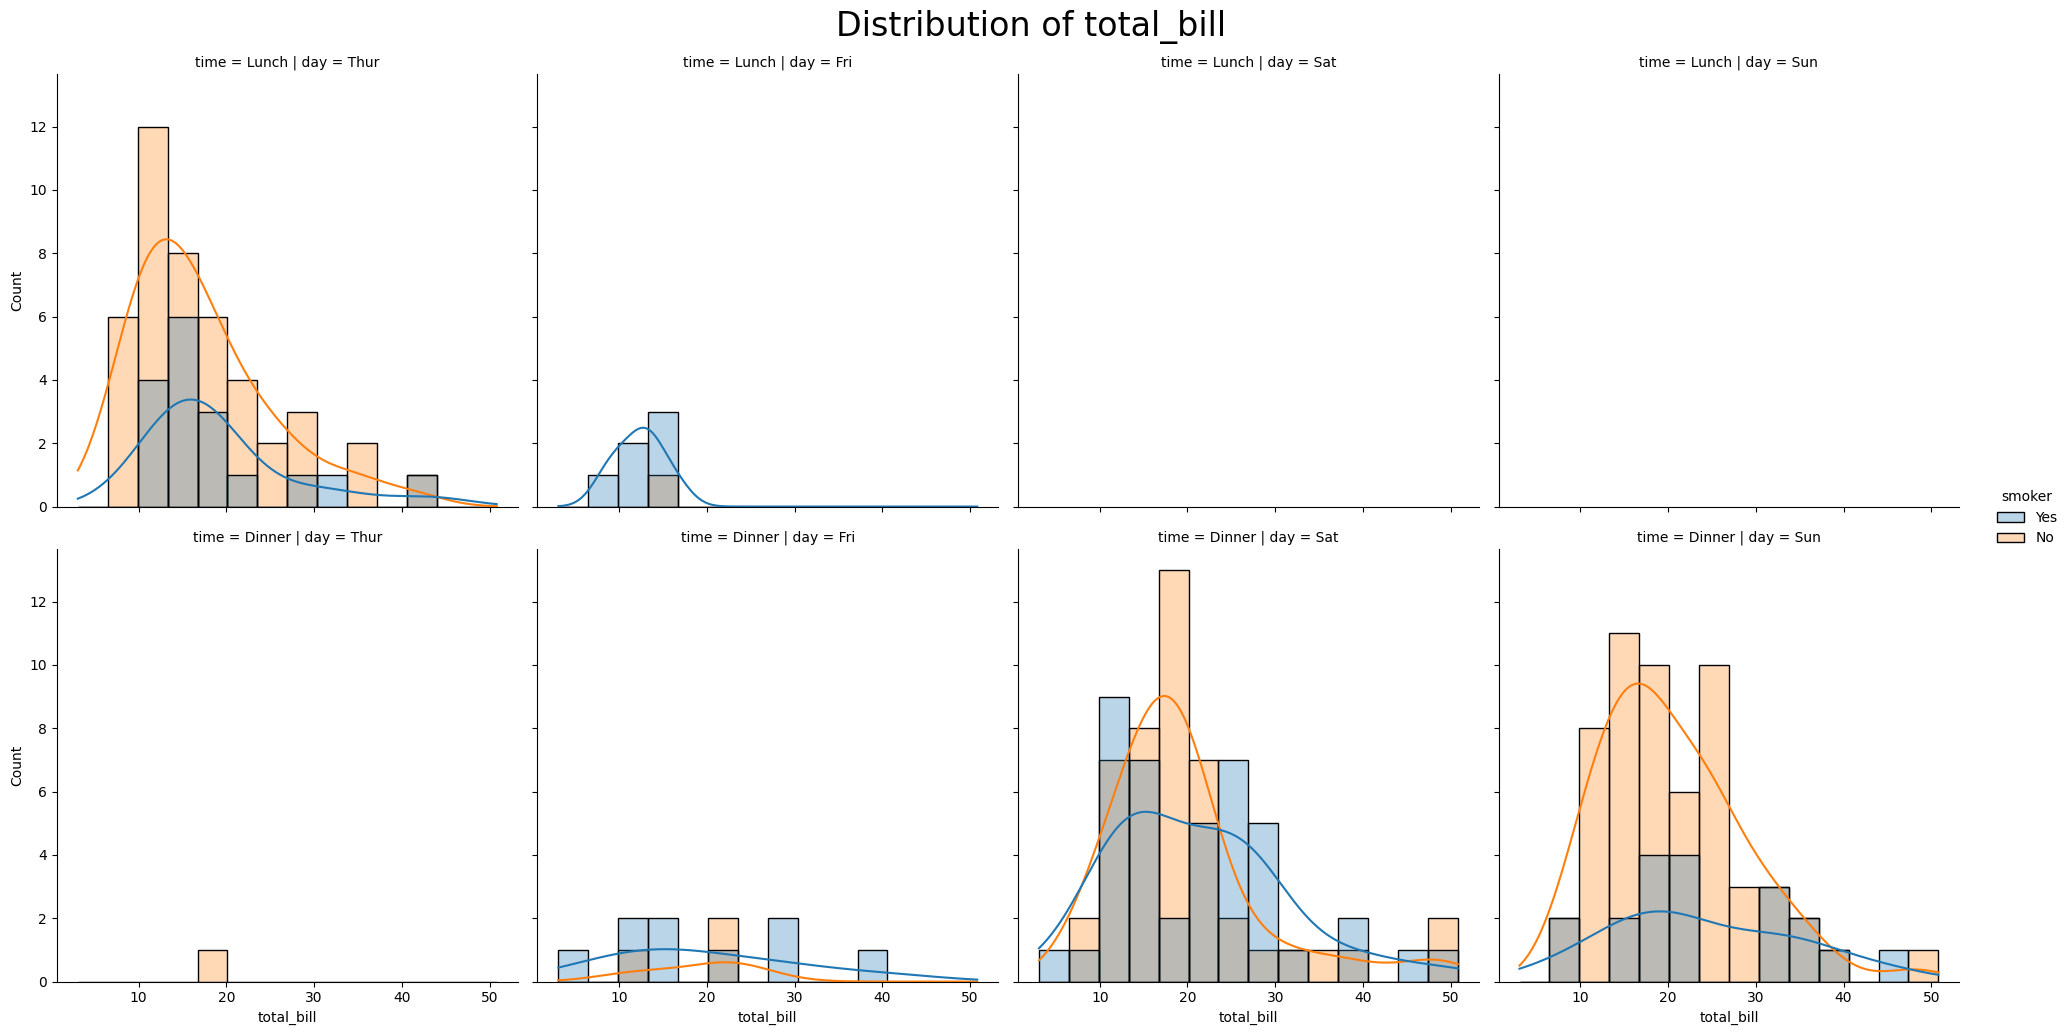

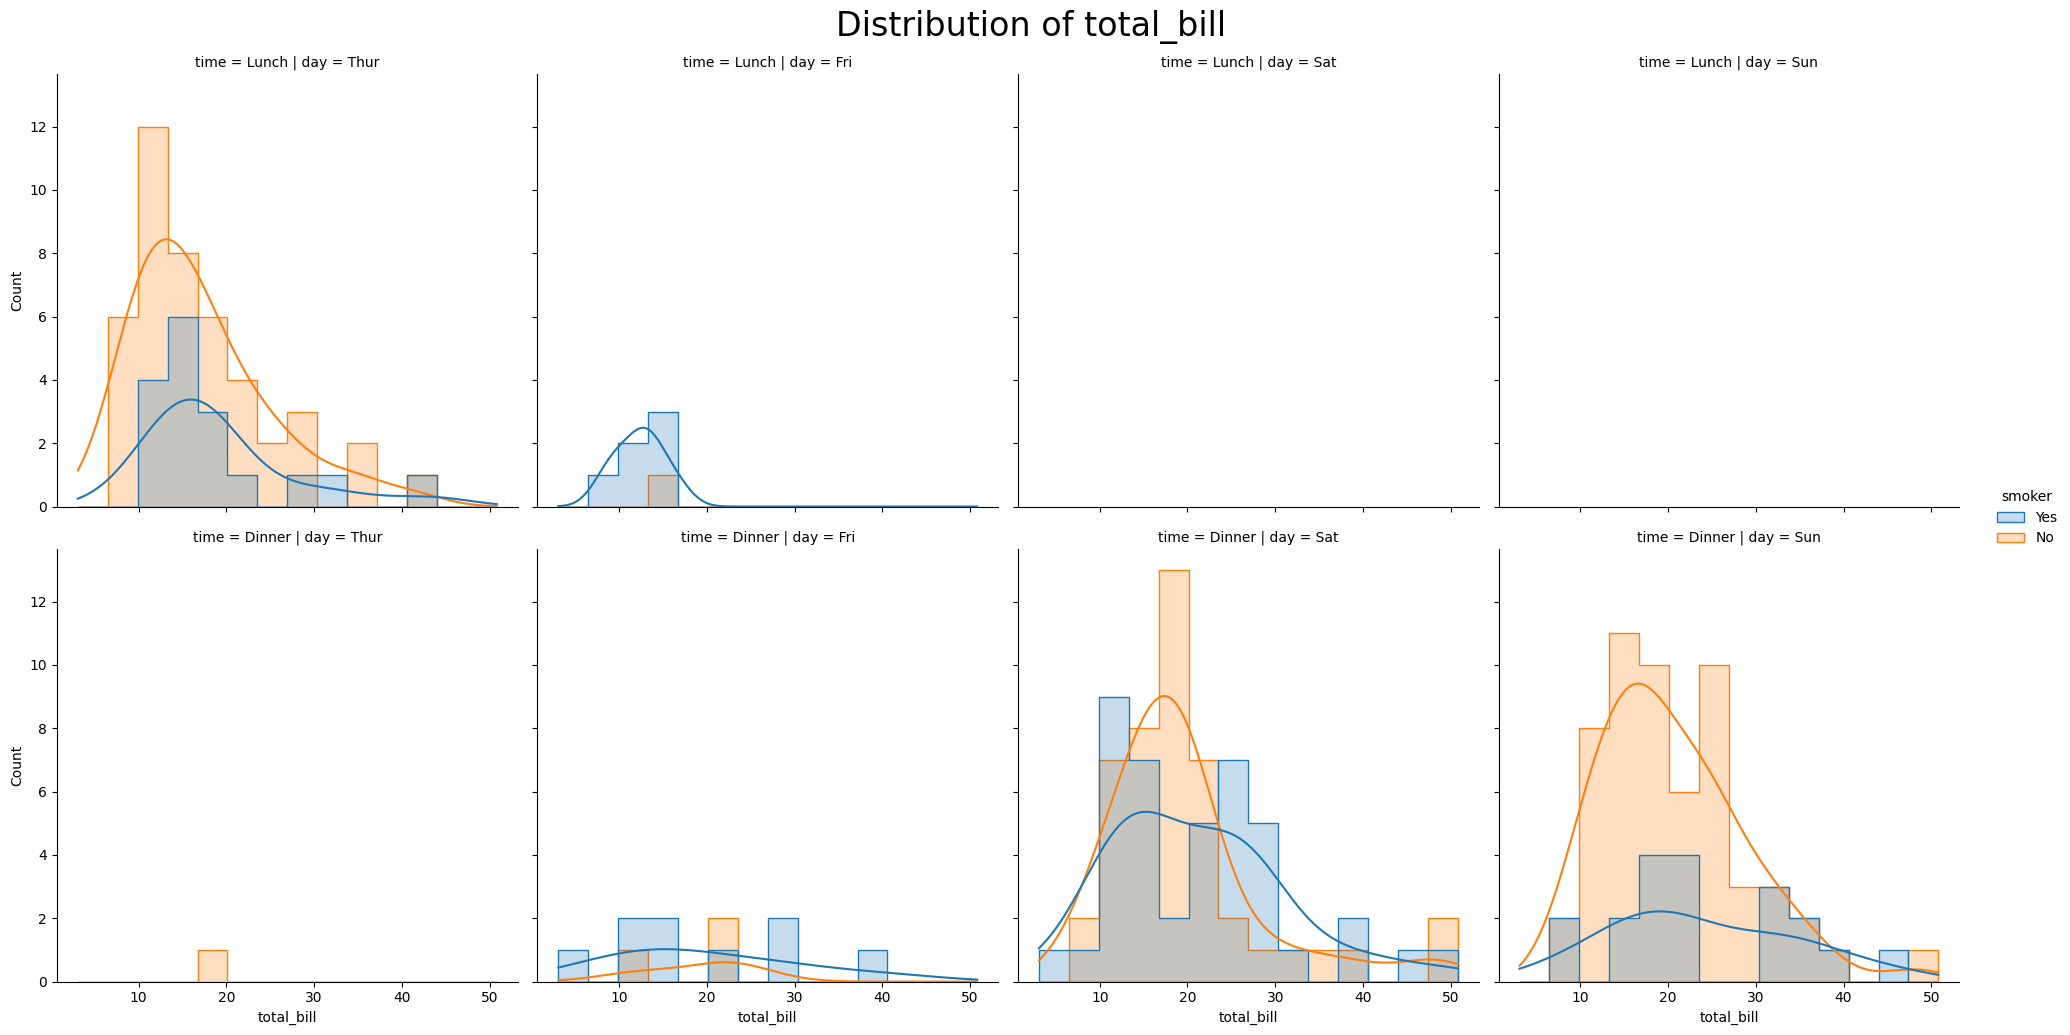

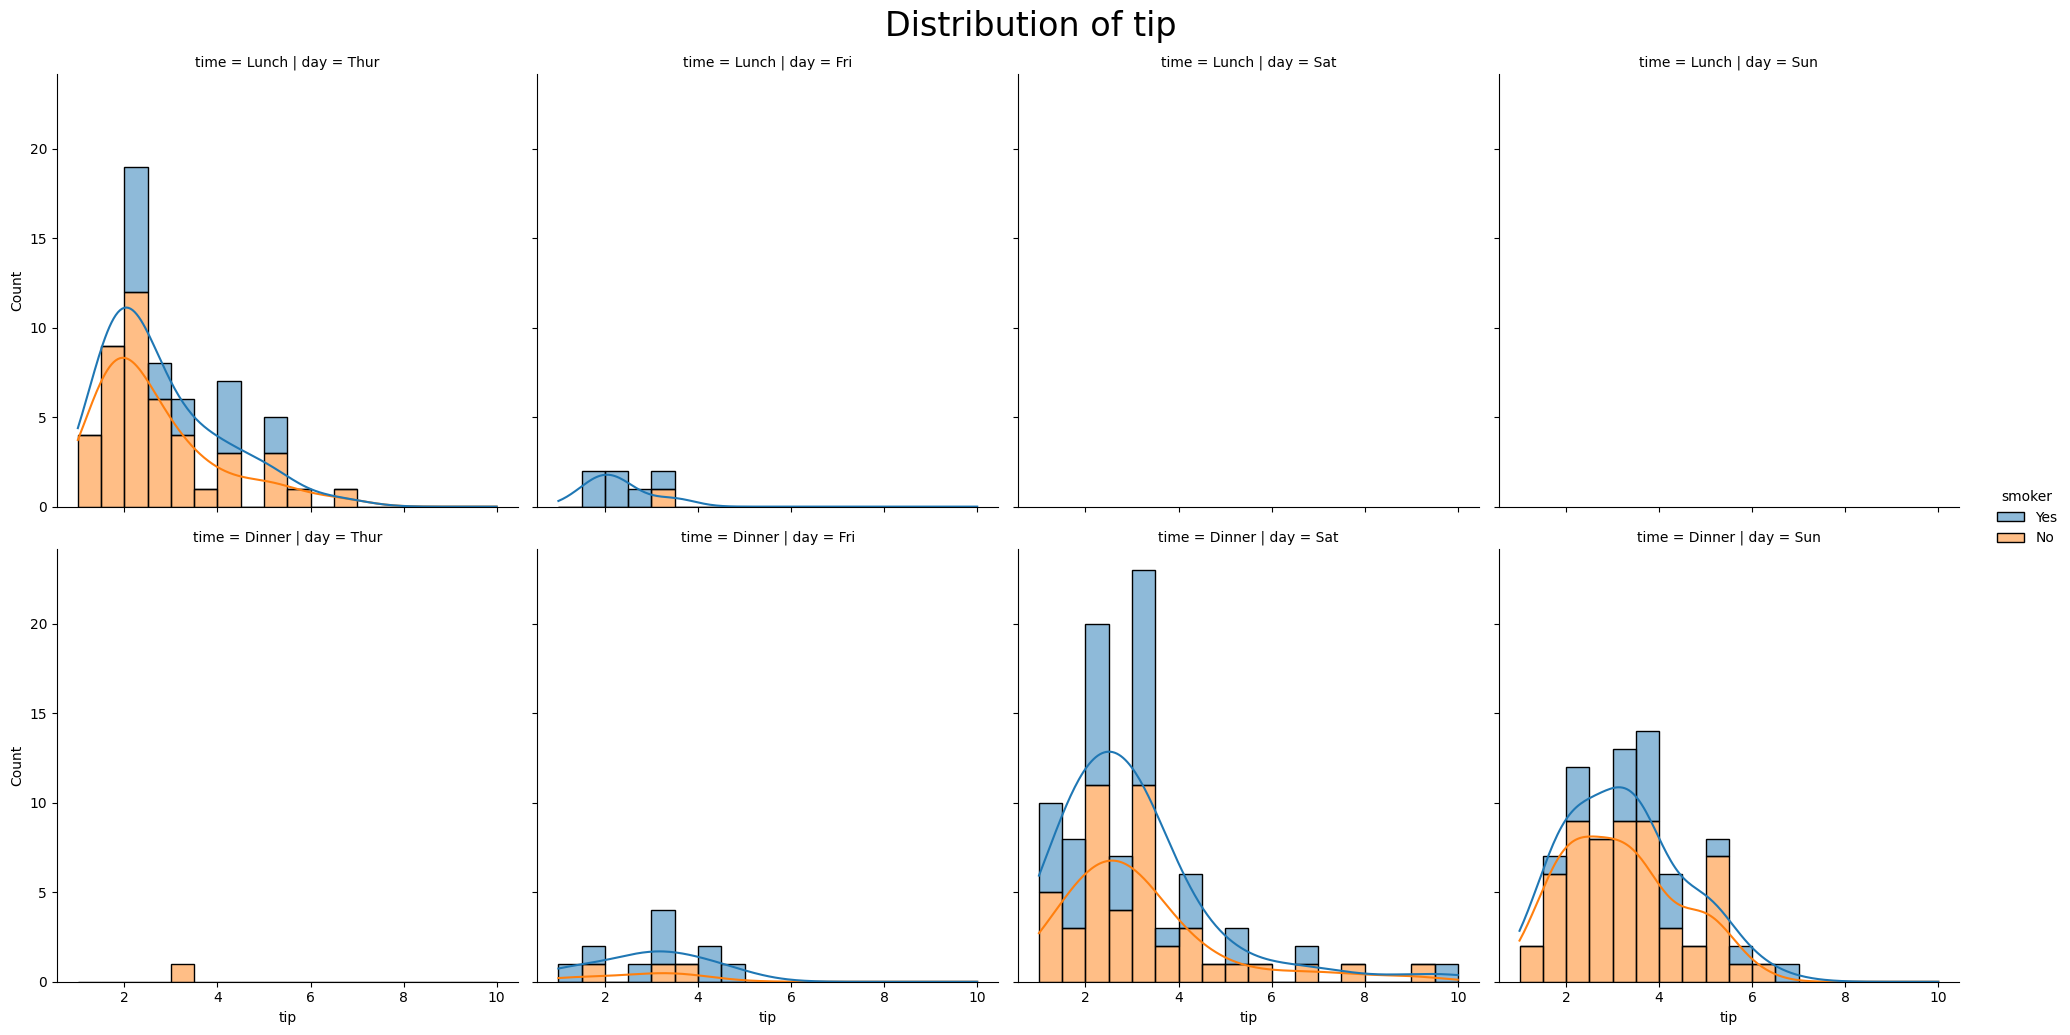

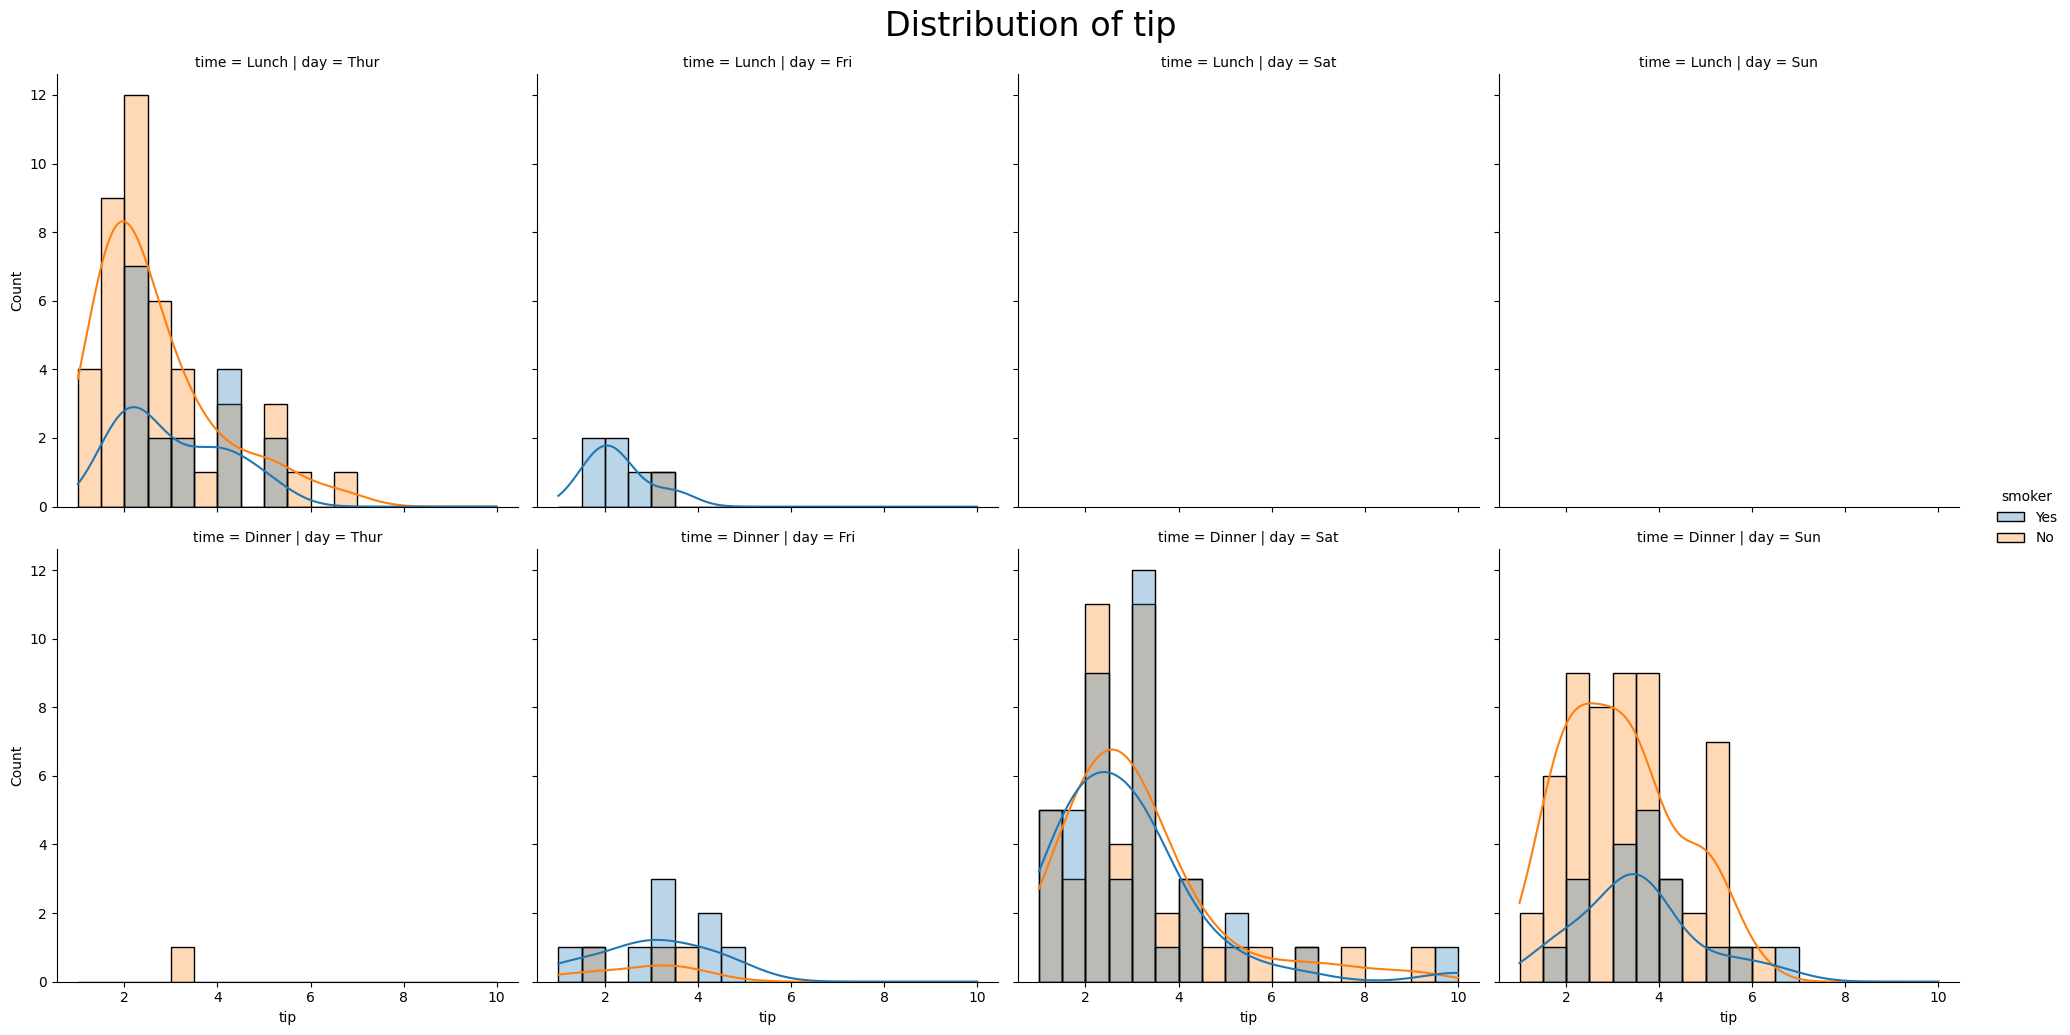

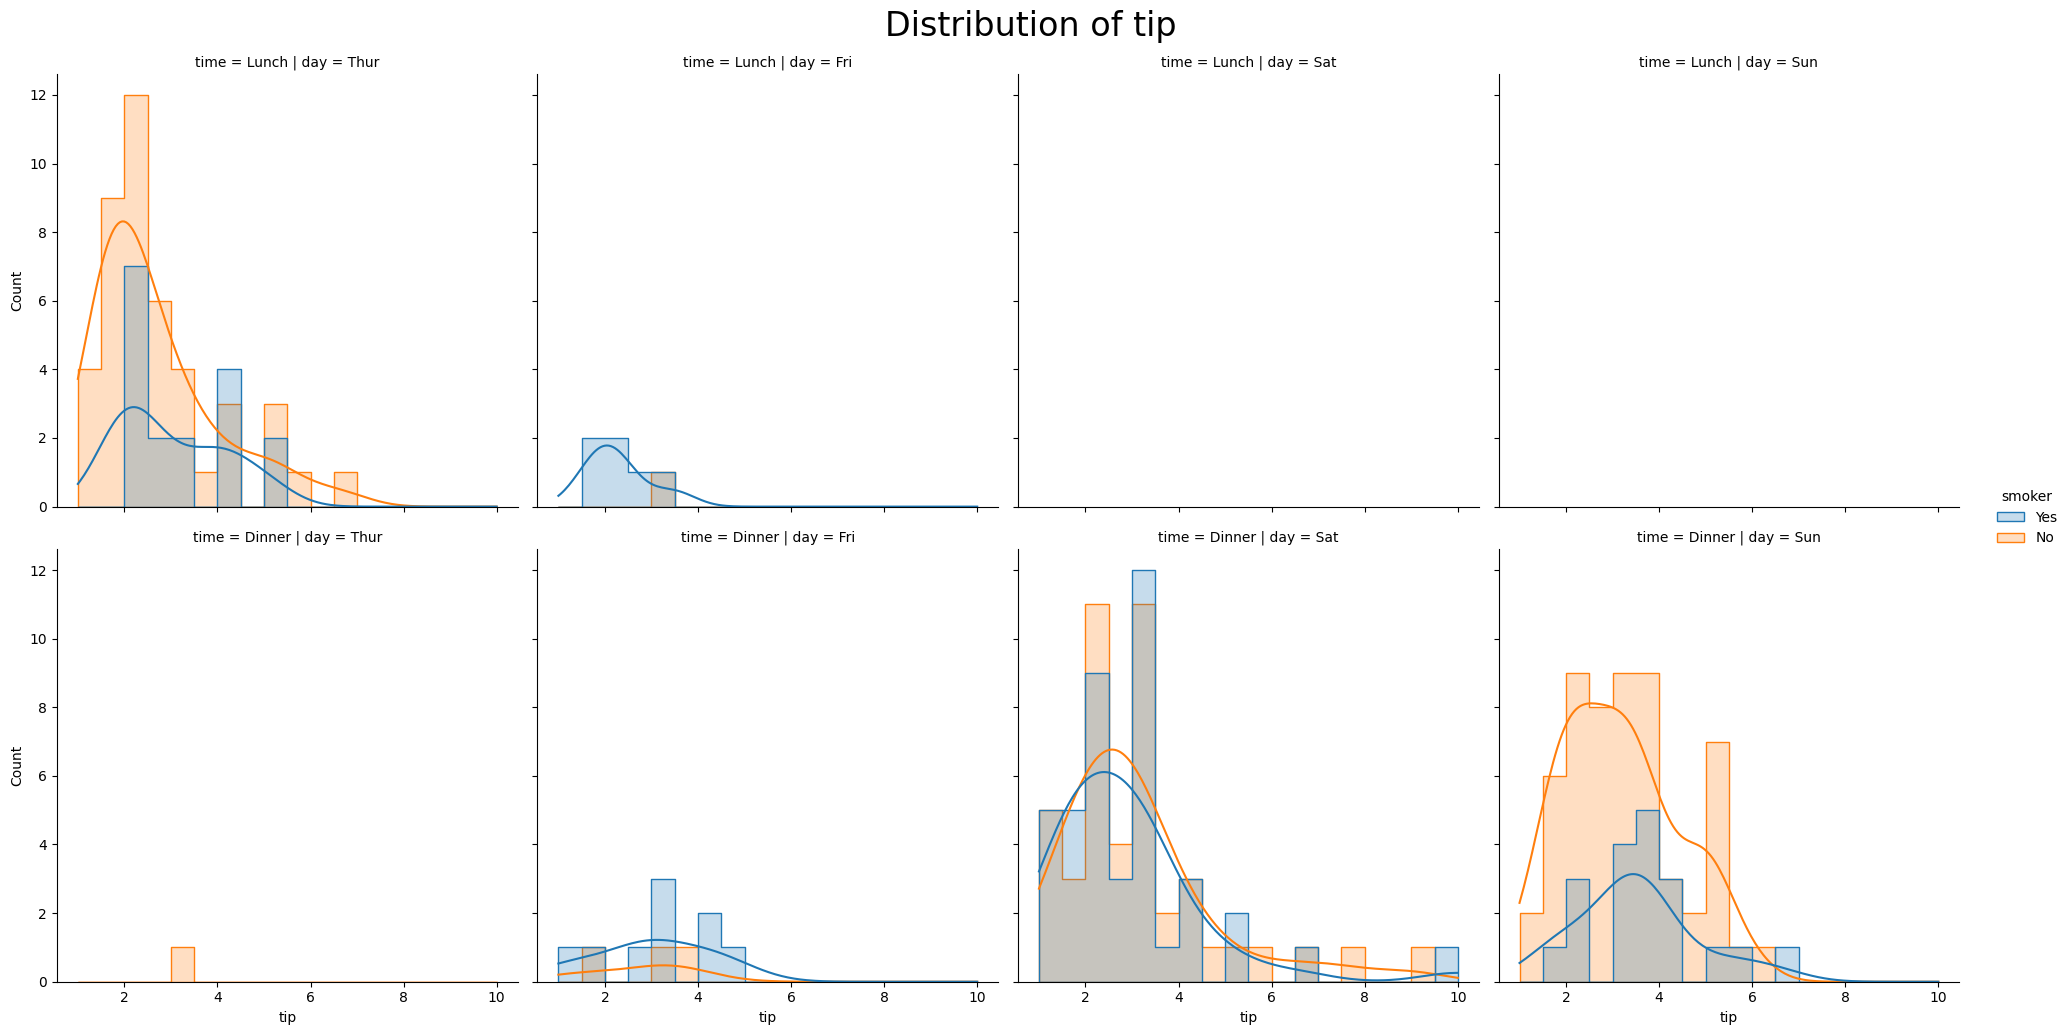

In [9]:
numerical_columns_tips=["total_bill", "tip"]
#loop over the columns here
for i in numerical_columns_tips:
    plot = sns.displot(tips, x=i, hue="smoker", kind="hist", row="time", col="day", hue_order=["Yes", "No"], multiple="dodge", kde=True)
    plot.fig.suptitle("Distribution of " + i, y = 1.03, fontsize = 24)
    plot.fig.suptitle(f"Distribution of {i}", y = 1.03, fontsize = 24) #equivalent to the previous line, but nicer to look at, use this version if you now about f strings (I will include both every time in that order if I don't forget)

#You could also do one of the following:
for i in numerical_columns_tips:
    #1
    plot = sns.displot(tips, x=i, hue="smoker", kind="hist", row="time", col="day", hue_order=["Yes", "No"], multiple="stack", kde=True)
    plot.fig.suptitle("Distribution of " + i, y = 1.03, fontsize = 24)
    plot.fig.suptitle(f"Distribution of {i}", y = 1.03, fontsize = 24)
    #2
    plot = sns.displot(tips, x=i, hue="smoker", kind="hist", row="time", col="day", hue_order=["Yes", "No"], multiple="layer", alpha=0.3, kde=True) #If you layer you should really specify a very low opacity to make the plot readable
    plot.fig.suptitle("Distribution of " + i, y = 1.03, fontsize = 24)
    plot.fig.suptitle(f"Distribution of {i}", y = 1.03, fontsize = 24)
    #3
    plot = sns.displot(tips, x=i, hue="smoker", kind="hist", row="time", col="day", hue_order=["Yes", "No"], element="step", kde=True) #This looks slightly nicer than multiple="layer" with low opacity in my opinion
    plot.fig.suptitle("Distribution of " + i, y = 1.03, fontsize = 24)
    plot.fig.suptitle(f"Distribution of {i}", y = 1.03, fontsize = 24)

Now, let's quickly move to bivariate distribution plots before we go to plotting categorical variables. Plotting bivariate distributions, as the name indicates stems from passing a value for both the x and y arguments. (This isn't compatible with `sns.ecdfplot()` or `sns.displot(kind="ecdf")`, but if you're using that, we have bigger problems anyways). 

For bivariate histograms (also referred to as hexbin plots when the bins are hexagonal instead of square), a color scale is included to signify the observation count. This color bar can be shown by passing `cbar = True` (Note that the `cbar` argument is `False` by default). Note that the color bar actually appears on a separate Axes from the main plot, in a Figure-level function such as `sns.displot()`, this is a non issue, as the Figure-level function will simply add an Axes to the Figure it generates for that. However, in the Axes-level `sns.histplot()`, that is simply not an option, since the function doesn't own its Figure, it can't add an Axes to it, in that case, it is strongly recommended you pass an additional argument to the function, namely `cbar_ax`, the Axes object you want the color bar to appear onto. Note the you can also pass a `cbar_kws` dictionnary, the main keyword argument you might want to include in there is `shrink`, which takes a float between 0 and 1, and is the ratio of the histogram's height over the color bar's height (usually you would use something between $0.75$  and $0.95$). Note that for bivariate histograms, the `multiple` argument does absolutely nothing, meaning that the histogram will get messy to look at if `hue` is specified and the data has some significant overlap.

For bivariatee kdes, it is much simpler, each curve represents what can be viewed as an equipotential (well in this case an equal probability), meaning each curve encloses an identical probability that randomly selected data is within the area enclosed by that curve. There are some additional arguments that can be passed to bivariate kdes, but none of them are really that important, so we won't go over them.

In this next code cell. Make a bivariate histogram using the tips dataset. Plot the tip amount in y and the total bill in x. You should make the plot a $1\times2$ grid, with the customer's sex as the column. Include a color bar as a legend (it should be smaller in size than your actual plot). Try seeparating the data's color depending on whether the customer smokes or not (yes, it would be more convenient to use `row` instead of `hue` here, but that's not what I'm trying to teach you). Does it look good? If not, a bivariate kde should look better and give you an idea of the overlap, so make another plot underneath, which should really be the same, except you should plot a kde instead of a histogram. (Don't forget to give your figures titles)

Text(0.5, 1.05, 'Bivariate distribution of Total Bill against Tip Amount')

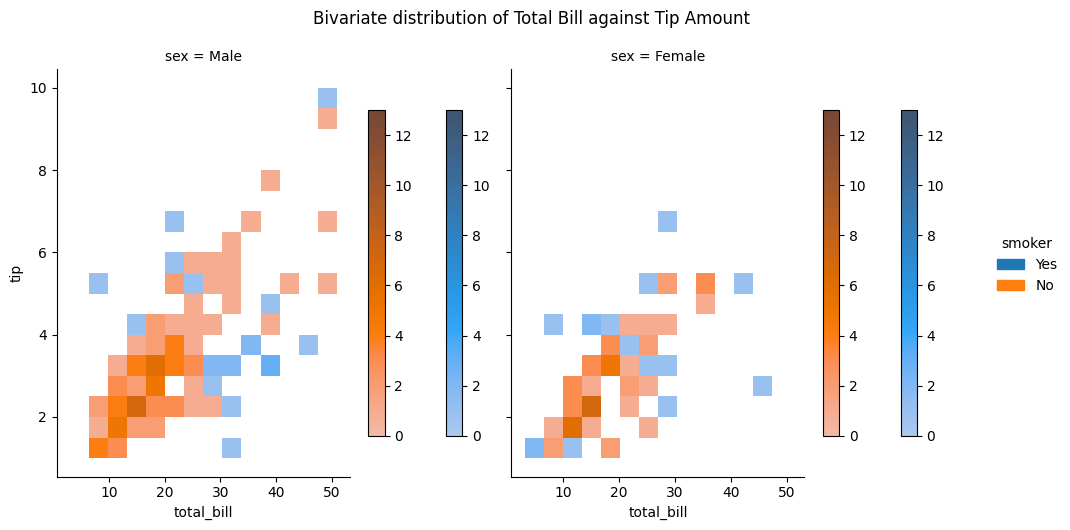

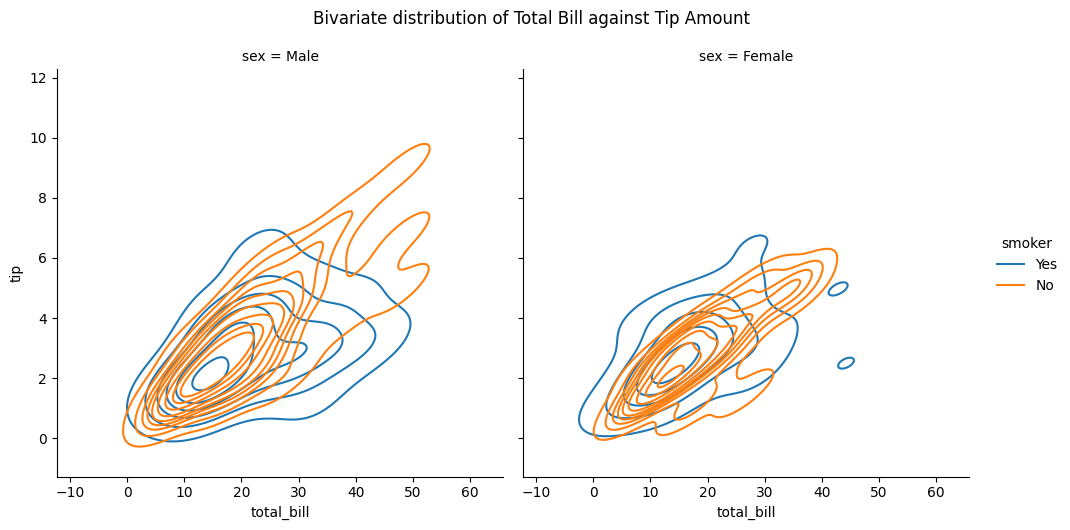

In [10]:
#Insert bivariate histogram here
bivariate = sns.displot(tips, x="total_bill", y="tip", col="sex", 
                        hue = "smoker", #This looks bad, if you had to present this data, I would recommend not doing this. (or also passing row = "smoker")
                        legend=True, cbar=True, cbar_kws=dict(shrink=0.8), kind="hist")
bivariate.fig.suptitle("Bivariate distribution of Total Bill against Tip Amount", y=1.05)

#Insert bivariate kde here
bivariate_kde = sns.displot(data=tips, x="total_bill", y="tip", col="sex", hue="smoker", legend=True, kind="kde")
bivariate_kde.fig.suptitle("Bivariate distribution of Total Bill against Tip Amount", y=1.05)


Now, one final exercise. What if you wanted both the univariate and bivariate distribution on the same figure? Well this is what you will be doing in this next cell. Using the iris dataset, plot the bivariate distribution of petal length in x against petal width in y. The bivariate distribution should be represented by a histogram (I will leave it up to you to determine whether it is appropriate to specify `hue = species` or not). 

Note, if you know some seaborn, you might be tempted to use `sns.jointplot()` (and you would be right to), but we haven't seen that yet, so hold onto that thought until later (or do it, I'm not watching over your shoulder), if you don't know what `sns.jointplot()` is, ignore this for now (Though I strongly encourage you to come back to this later and use it as an `sns.jointplot()` exercise).

**Hint:** Plotting individual observations is a way to plot the univariate distribution when it isn't the main focus of the plot.

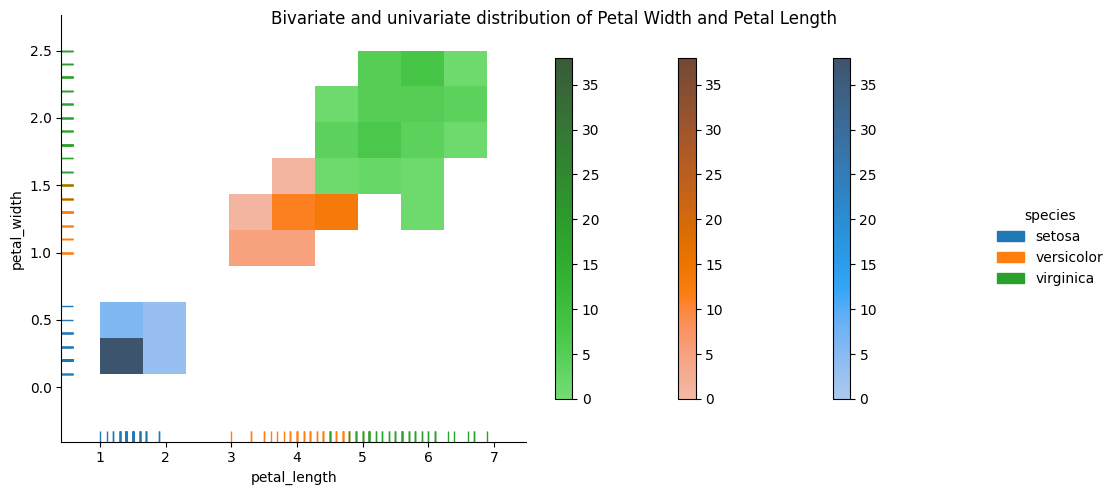

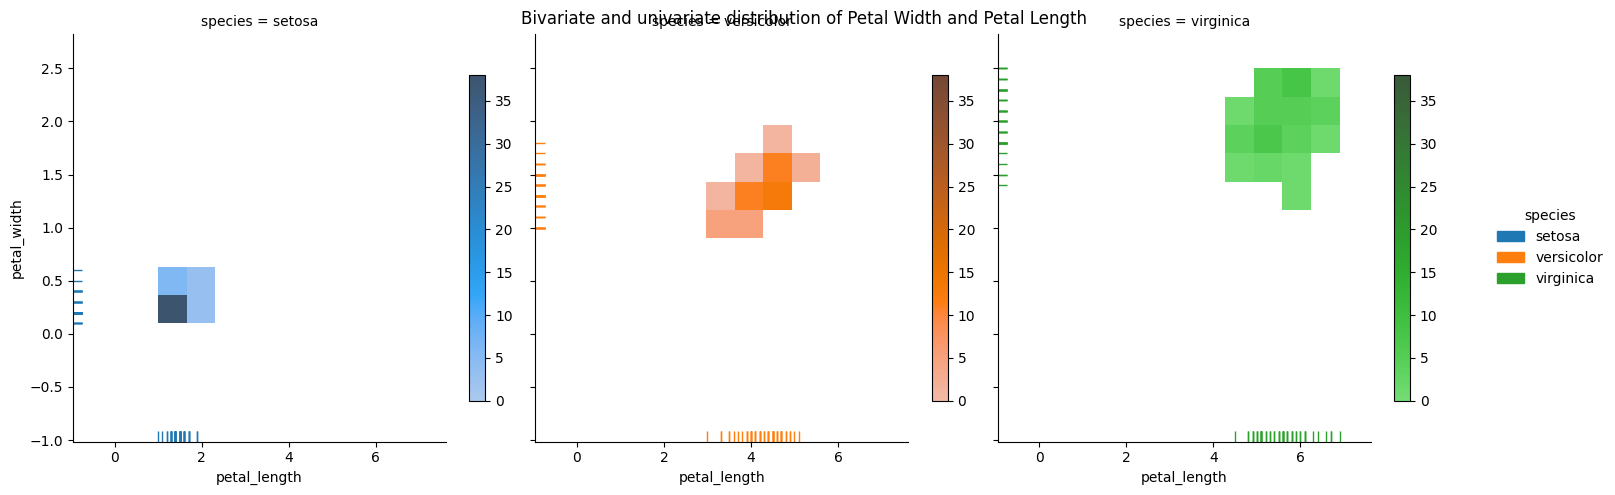

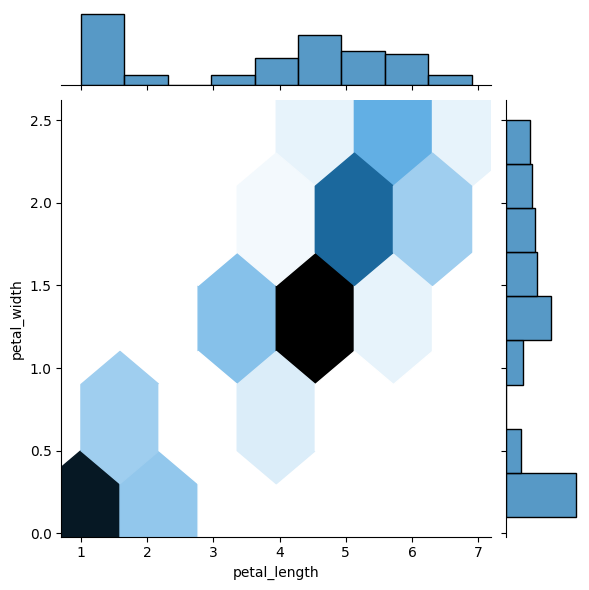

In [11]:
#What if you want both univariate and bivariate distribution?
#The way with what you've learned until now:
bivariate_and_univariate = sns.displot(iris, x = "petal_length", y = "petal_width", hue = "species", rug = True, 
                                       cbar = True, cbar_kws = dict(shrink = 0.8), #this line adds a color bar for each color, doing this will require fixing the aspect ratio by passing aspect
                                       aspect = 2) 

bivariate_and_univariate.fig.suptitle("Bivariate and univariate distribution of Petal Width and Petal Length") #This sets a title

"""The rug gives you a decent idea for each individual distribution, you can check with kind="kde", that the overlap is low enough that setting hue isn't really an issue."""

#You might have also done something along the lines of this
bivariate_and_univariate = sns.displot(iris, x = "petal_length", y = "petal_width", hue = "species", col = "species", rug = True, cbar = True, cbar_kws = dict(shrink = 0.8))

bivariate_and_univariate.fig.suptitle("Bivariate and univariate distribution of Petal Width and Petal Length") #This sets a title

#If you did this, congrats, this is the better way to do it (even though the flowers are on different columns, there is no reason not to give them each a unique color)

#If you know sns.jointplot() and didn't listen to me, or if you got much further in this overview and did listen to me, went back and used this as an exercise.
sns.jointplot(iris, x="petal_length", y="petal_width", kind="hex") #Arguably, this doesn't look that good, but if you remember what the hexbin plot we got with pandas looked like, you will agree it lools much better. You might also find that having a rough idea of each distribution helps getting a better idea of how the two distributions might be related. In short, this isn't necessarily pretty, but it's very informative.


Plotting Categorical Data
----------

In this next section, we will go over plotting categorical data (as the title suggests). To do this, we will see one new Figure-level function, namely `sns.catplot()` and six Axes-level functions, namely `sns.stripplot()`, `sns.swarmplot()`, `sns.boxplot()`, and `sns.violinplot()`, `sns.barplot()`, and `sns.pointplot()` (I don't know why seaborn considers this last one a categorical plotting function as to me it is more of a plotting numerical data and figuring out relations kind of function, but it also works for categorical data, and that's where documentation includes it so I will put it in this section). There are also two other Axes-level functions that would go in this section, but we won't cover as extensively, namely `sns.boxenplot()`, and `sns.countplot()`.

Like in the distribution section of this overview, all these functions take the `data`, `x`, `y`, `hue`, `hue_order`, and `legend` arguments. All of these work exactly the same as in distribution plotting, except for `legend`: in `sns.displot()` and the related Axes-level functions, `legend` simply took a boolean, in `sns.catplot()` and the related Axes-level functions, it can take the boolean `False`, or one of the following strings: `"auto"` (the default), `"brief"`, or `"full"`. Auto chooses between brief and full depending on the length of the legend, full gives a legend for every possibility, and brief gives a legend at a regular interval. For example if there are 100 different pointsizes, `legend = "full"` will have an entry for all 100 sizes, while `legend = "brief"` will have one at a regular interval of say 20 sizes (depending on some seaborn/matplotlib settings), and will let the reader infer the values in the interval. Usually, leaving `legend = "auto"` is wise if you want a legend.

Also like in the distribution section of this overview, the Figure-level `sns.catplot()` has a few arguments in common with the Figure-level `sns.displot()`, namely `kind`, `row`, `col`, `row_order`, `col_order`, `height`, and `aspect`. The only one that works slightly differently is `kind`, as this time it takes on of the following strings: `"strip"` (the default), `"swarm"`, `"box"`, `"violin"`, `"bar"`, `"point"`, `"boxen"`, and `"count"`.

Now, let's go over what these functions plot:

1. `sns.countplot()` works pretty much like `sns.histplot()` except for categorical data (hence why we won't cover it in detail)
2. `sns.stripplot()` and `sns.swarmplot()` are pretty similar, they both create a scatter plot of the data. However, since we are working with categorical data, that means there is a discrete number of possible y values (or x values depending on how you orient the plot), but a continuous set of possible y values. For example, if you called `sns.stripplot(iris, x = "species", y = "petal_length")`, there are three possible values of `"species"`, but about as many as we have data points of `"petal_length"`. This creats a substantial chance that the points would overlap and make the graph difficult to read. Both functions have a slightly different solution for this problem, and that is where they differ: `sns.stripplot()` applies jitter along the x axis (or the y axis if the categorical data is on the y axis), meaning, it applies a small random displacement along the categorical axis (this isn't a problem, as since that axis only takes discrete values, the reader understands that the displacement is only meant to make the plot easier for them to understand). `sns.swarmplot()` has a very similar solution, except instead of applying random displacement, it systematically displaces each point so that the points don't overlap. Essentially, `sns.swarmplot()` guaranties no overlapping points at the cost of longer runtime, while `sns.stripplot()` doesn't guarantee no overlap, but is substancially more efficient in terms of runtime. Thus, you should choose which one of these to use depending on your runtime and plotting needs, and the size of your dataset.
3. `sns.boxplot()` and `sns.boxenplot()` both give a box and whiskers plot of the distribution of each unique value of the categorical variable passed. The difference, is that `sns.boxenplot()` (which stands for box enhanced), will show many quantiles, while `sns.boxplot()` (your standard box and whiskers plot) only gives the three quartiles.
4. `sns.violinplot()` uses kernel density estimates on each unique value of the categorical variable passed and plots that (once we do an example, you will get a better idea of why it is called a violin plot)
5. `sns.barplot()` uses some sort of estimator (usually the arithmetic mean) to represent all the values, and draws a bar of that height. (An error bar can also be added, but we will go more in depth into that later). A bar is plotted for each unique value of the categorical variable. `sns.pointplot()` works the same, except instead of a full bar, it plots only a point where the top of the bar would be instead of the full bar.

Now, this is a lot of information to take in, so why don't we do an example before we get into any further information. In the code cell below, I have provided a list of all the numerical columns of the iris dataframe. Loop over that list to make a vertical bar plot of each of these numerical columns. Use the `"species"` column as your categorical variable (in this case, the one that goes in x). For the sake of easier readability, you can also make each species a different color. Give your figures titles

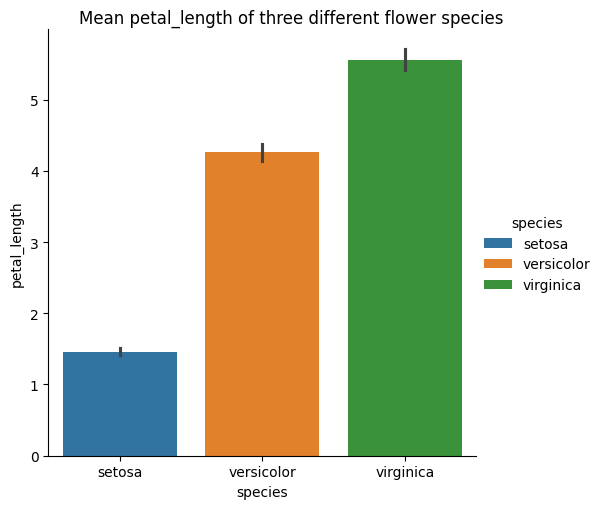

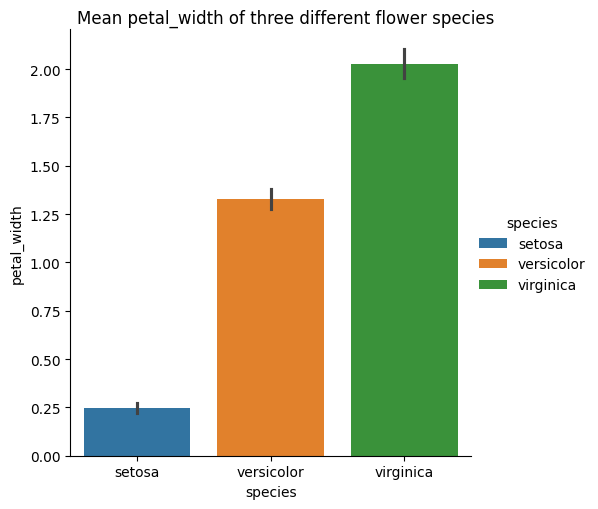

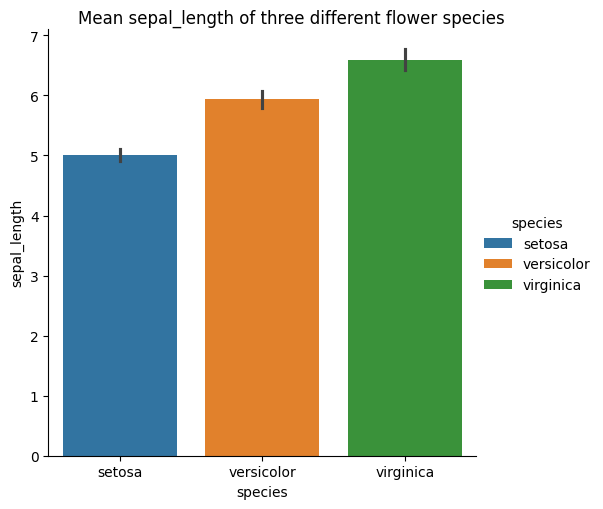

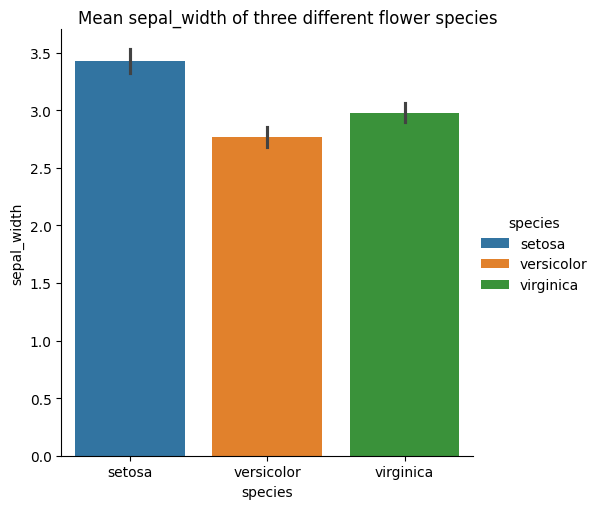

In [12]:
#barplots
numerical_columns_iris = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
#loop over the columns here
for i in numerical_columns_iris:
    barplot=sns.catplot(iris, x="species", y=i, hue="species", legend=True, kind="bar")
    barplot.fig.suptitle("Mean" + i + " of three different flower species", y=1.01)
    barplot.fig.suptitle(f"Mean {i} of three different flower species", y=1.01) #if you use f string

Now you can make exactly the same plot except without the entire bar and simply replace it with a point on top.

"If you have a keen eye, you might have noticed that the point doesn't seem perfectly centered on the error bar. Honestly, I'm not entirely sure why that happens, but my best guess is that the bootstrapping algorithm that is used to compute a 95% confidence interval (which is the default error bar), isn't necessarily symetric. I'm guessing this because I know bootstrapping uses random sampling so it isn't 100% consistent unless you set a seed beforehand (It is still pretty reliable with the default 1000 boots though)"

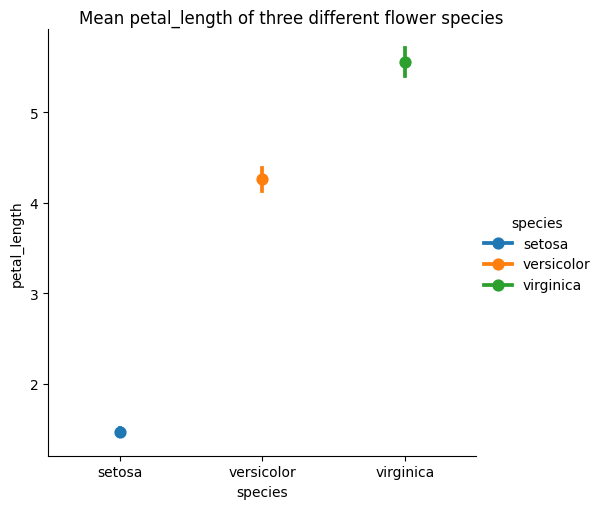

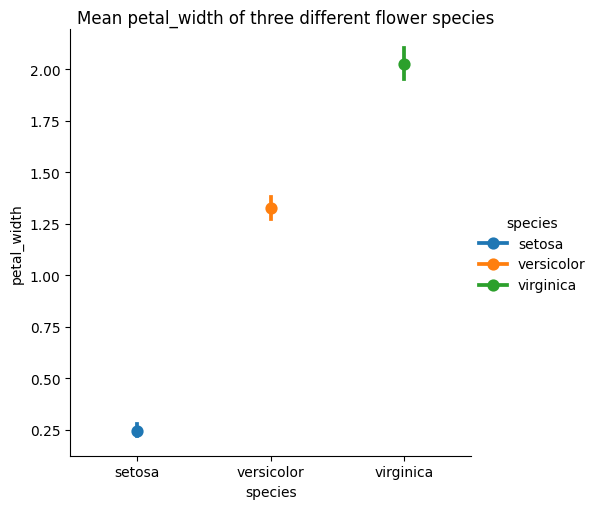

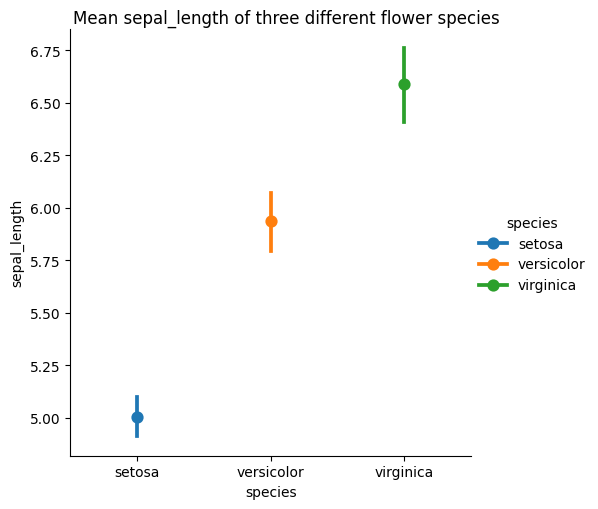

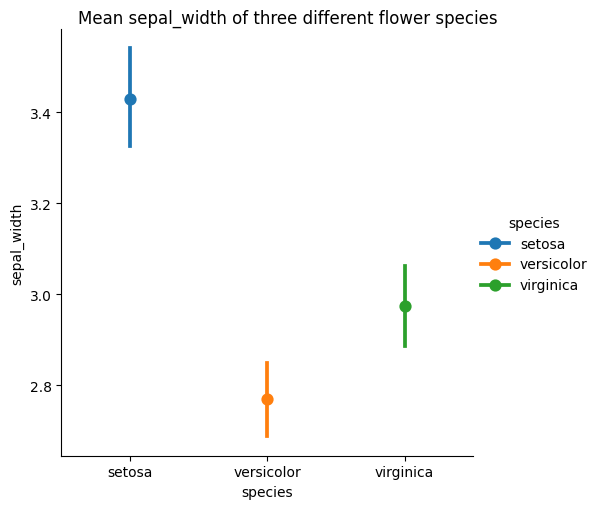

In [13]:
#Alternatively, if you only want a point at the top of the bar and not the full bar (while maintaining the error bar), you can set kind="point"
#pointplots
numerical_columns_iris = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
for i in numerical_columns_iris:
    barplot=sns.catplot(data=iris, x="species", y=i, hue="species", legend=True, kind="point")
    barplot.fig.suptitle("Mean "+i+" of three different flower species", y=1.01)
    barplot.fig.suptitle(f"Mean {i} of three different flower species", y=1.01) #if you use f string
"""If you have a keen eye, you might have noticed that the point doesn't seem perfectly centered on the error bar. Honestly, I'm not entirely sure why that happens, but my best guess is that the bootstrapping algorithm that is used to compute a 95% confidence interval (which is the default error bar), isn't necessarily symetric. I'm guessing this because I know bootstrapping uses random sampling so it isn't 100% consistent unless you set a seed beforehand (It is still pretty reliable with the default 1000 boots though)"""

Now that you have an example of the kind of plots `sns.barplot()` and `sns.pointplot()` will generate, we can go over some important arguments. As you have probably noticed, both functions return very similar looking plots and it follows that they take almost the same arguments.

1. `order`: this works very similarly to `hue_order`, and is accepted by all of seaborn's categorical plotting functions, it gives the order that values should be plotted in on the categorical axis. By default, `order = None`, in which case, seaborn will simply infer an order, in most cases, that will simply be the order that the possible values appear in in the data structure passed as `data`. This argument actually exists for all the functions (Axes and Figure level alike in this section).
2. `orient`: this argument takes a string (well really a character, but python doesn't make a difference)that tells seaborn which of your variables is the categorical variables on the plot. If the categorical variable is on the x axis, you can pass `orient = "v"` (for vertical) or `orient = "x"`, and if it is on the y axis, you can pass `orient = "h"` (for horizontal) or `orient = "y"`. Note that this argument only exists for cases where it is unclear which variable is categorical (the rest of the time, seaborn can infer which one is categorical and you won't need to pass this), for example, if you ask people to rate their confidence in data analysis from 1 to 10, and plot the confidence level against the number of people who gave that confidence level, the confidence level is arguably a categorical variable, but seaborn will have trouble figuring out which of the variables is categorical because they are both numeric, in that case you would have to specify `orient`, but most of the time, you don't really have to.
3. `estimator`: this is the argument that determines how the point that represents all the data (i.e. the height of the bar for bar plots and the y coordinate of the point for point plots is computed), it can either be a string or some callable (which if you don't know is python terminology for a function or method), that takes a list (or other iterable) of values and returns a single number, by default, `estimator = "mean"`, which is equivalent to `estimator = np.mean` if you imported numpy as np beforehand.
4. `errorbar`: this argument determines how the error bar is computed, it can either take a string, a tuple, or a callable that takes a list of values and returns a pair of values (representing the errorbar value). In the case of a string, it can be one of `"ci"`, `"pi"`, `"se"`, or `"sd"` respectively standing for confidence interval, percentage interval, standard error, and standard deviation. By default, with `errobar = "ci"` or `errorbar = "pi"`, returns a 95% confidence interval, the first one computed by using a bootstrapping algorithm (if you don't know what that is, don't use `errorbar = "ci"`), and the second one using the empirical data (i.e. the error bar will range from the $2.5$ percentile of the dataset to the $97.5$ percentile). `errorbar = "se"` makes the error bar range from $mean - 1\times se$ to $mean + 1\times se$, and `errorbar = "sd"` works the same except using the standard deviation instead of standard error. If you want to adjust the range, you can pass a tuple of the form `(string, float)`, where the string is one of the four strings that could be passed if you pass only a string, and the float is the size of the range you want (for `"pi"` and `"ci"` it is a percentage ranging from $0$ to $100$, while for `"se"` and `"sd"`, it is how many times the standard error/standard deviation the error bar is).

Now that you now what arguments these functions take, here is an exercise: using the penguins dataset, create a $1\times3$ grid of bar plots of the penguin's bill length, each island should be on a different subplot. And each species should be a different bar. Use the geometric mean as an estimator to fin a point that represents all the data (I have defined a function that computes the geometric mean of an iterable for you), and the error bars should range from the smallest datapoint to the largest data point (I have also defined a function that returns the min and max of an iterable for you).

Note: in terms of data analysis, this makes absolutely no sense, but it makes for good plotting practice.

Text(0.5, 1.04, 'Bar plot using geometric mean as estimator')

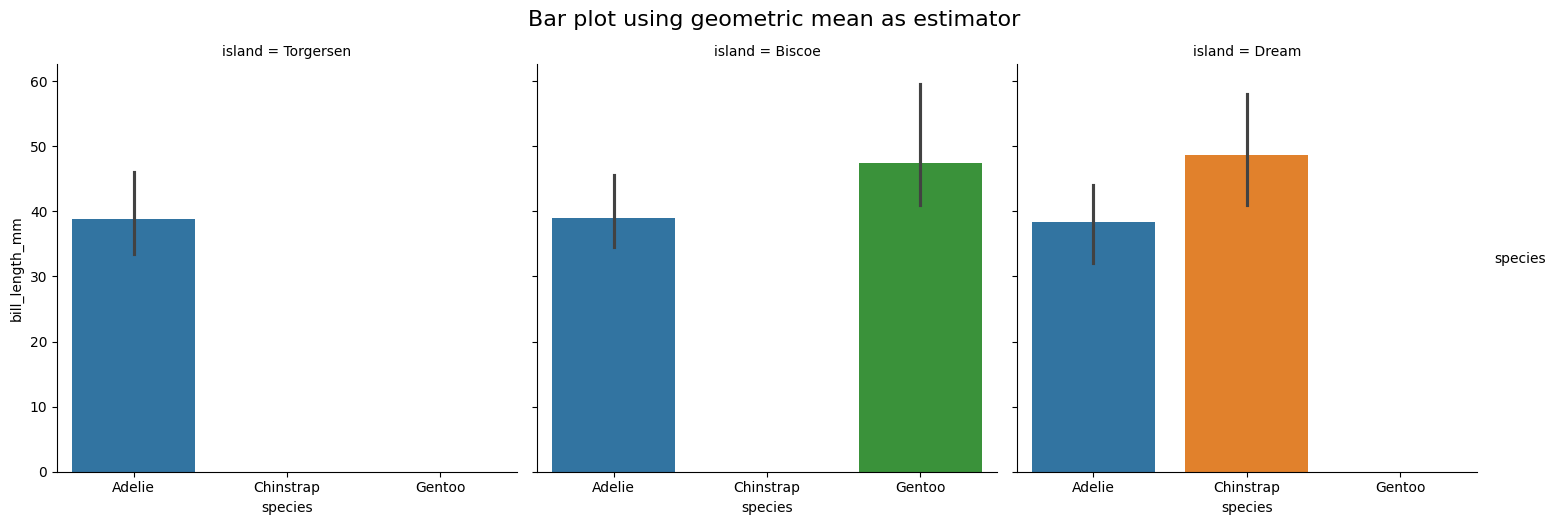

In [14]:
#geometric mean function (note: this will return 0 if any elements in the iterable, and can return an error if there are any negative elements, but that doesn't really matter here as there are no such elements in the dataset)
def geo_mean(iterable):
    length = len(iterable)
    product = 1
    for i in iterable:
        product *= i
    geometric_mean = product ** (1/length)
    return geometric_mean
#function that returns the min and max of an iterable:
def min_max(iterable):
    return min(iterable), max(iterable)

#making the plot
bar_plot = sns.catplot(penguins, x = "species", hue = "species", y = "bill_length_mm", col = "island", estimator = geo_mean, errorbar = min_max, kind = "bar")
bar_plot.fig.suptitle("Bar plot using geometric mean as estimator", y = 1.04, fontsize = 16)

Before you do one more exercise, here are two more arguments that can be passed to both of these functions: 
1. `capsize` pass a float to this argument to add a smaller line at each end of your error bars.
2. `err_kws` if you know some matplotlib, you can use this to pass keyword arguments to `matplotlib.lines.Line2D` for creating the error bars. If you don't know matplotlib, this isn't really what I'm trying to teach here, I'm only mentionning it for people who know what they would want to pass in there so they know it exists.

Now, let's make a more reasonable plot. 

This time, you should make a $2\times2$ grid of plots, using the tips dataset, each unique value pair of the `"sex"`  and `"smoker"` columns of the dataframe should appear on its own unique subplot (it doesn't really matter which one goes on rows and which one goes on columns). The categorical variable you should use is party size (the column is called `"size"`) ranging from $1$ to $6$, and you should plot it against the customer's tip amount. For the sake of variety, make this a point plot instead of a bar plot. Each point should represent the mean tip for that party size, and the error bars should be 2 standard deviations large. You should add caps to the ends of your error bars. (By default, `sns.pointplot()` will try connecting the points, you can fix that by specifying `linestyles = ""`)

Text(0.5, 1.02, "I don't know what to title this")

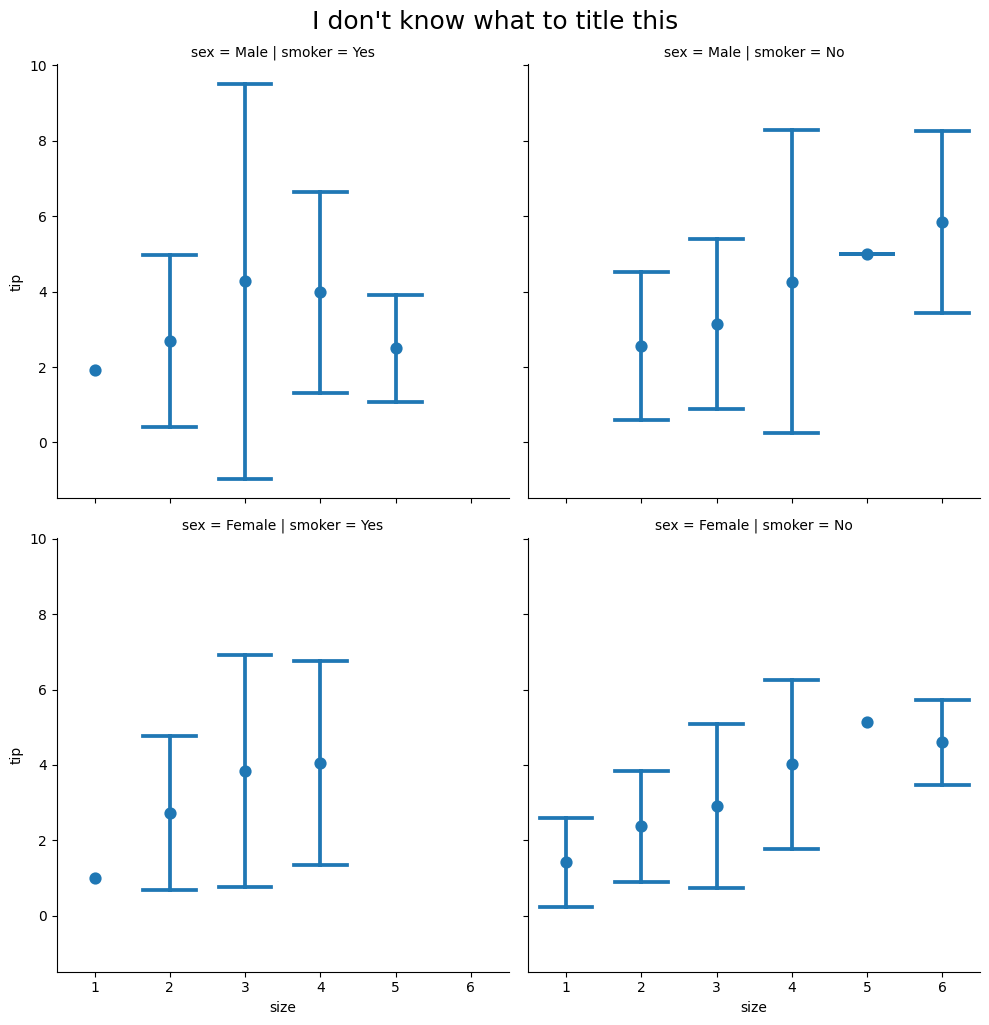

In [15]:
#Make a pointplot here
point_plot = sns.catplot(tips, x = "size", y = "tip", orient = "v", row = "sex", col = "smoker", kind = "point", estimator = "mean", errorbar = ("sd", 2), capsize = 0.7, linestyles = "") #If you're wondering how I figure out what to pass for capsize, it's quite simple: trial and error
#add a title to the plot
point_plot.fig.suptitle("I don't know what to title this", y = 1.02, fontsize = 18)

Now, let's go over how `sns.boxplot()` works, since you're almost never going to use this, we will make this quick. It takes mostly the same arguments as the previous functions, those being: `data`, `x`, `y`, `hue`, `order`, `hue_order`, `orient`, `log_scale`, `ax`, and `legend`.  
It takes one important argument that none of the functions we have seen until know, namely `whis`, which accepts a float, and is $1.5$ by default. This argument gives the maximal length of the whisker in as a factor of the InterQuartile Range (IQR), meaning that observations that are further than $whis\times IQR$ from the nearest quartile will be considered as outliers, and the whisker won't extend to them, instead, they will be represented with a point on the plot.

Now, to practice this (or so that you can say you did it once in your life), loop over the numerical columns of the tips dataframe to make two grids of $2\times4$ plots. The categorical variable you should plot on the x axis is whether or not the customer smokes, you should also make the box plots a different color depending on the customer's sex. Make each time of day its unique row of plots, and each day of the week its unique column. Finally, you should cap the plot's whiskers at $2\times IQR$ 

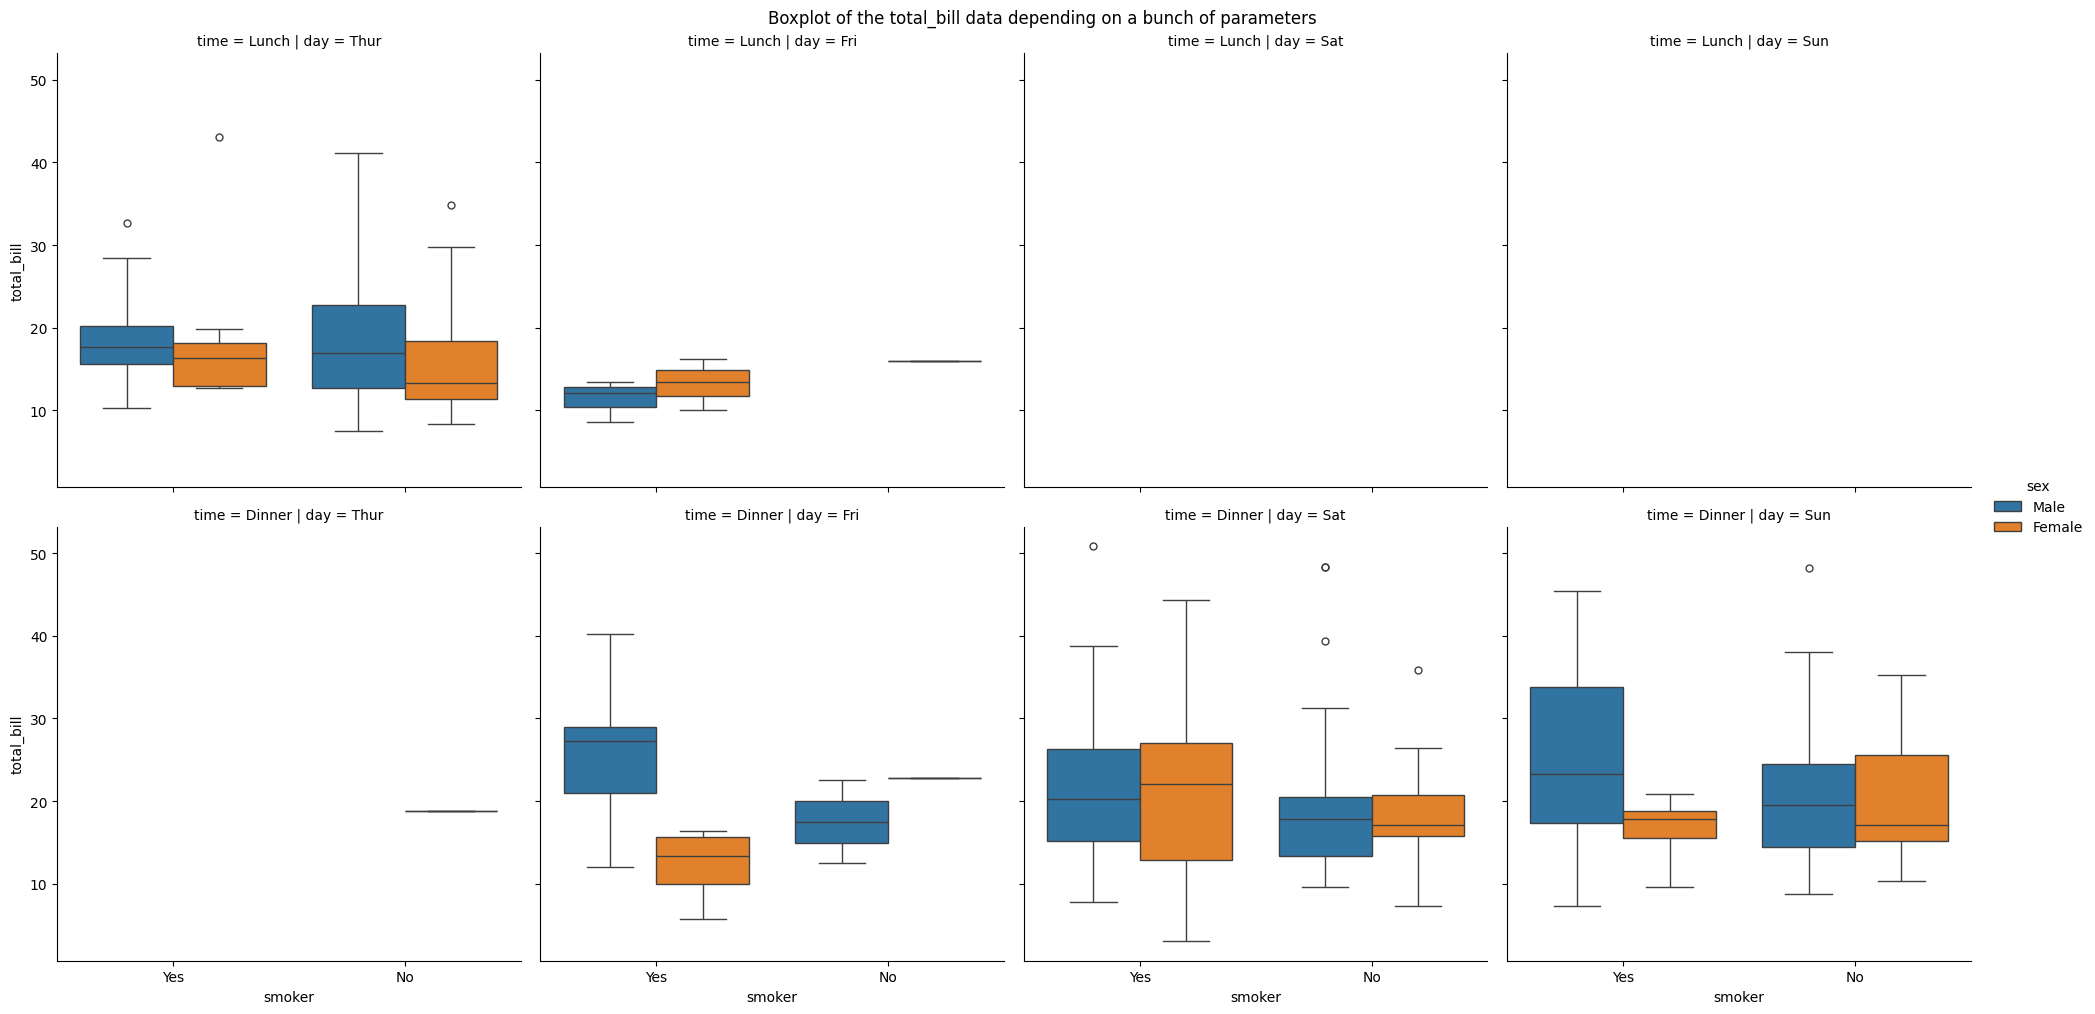

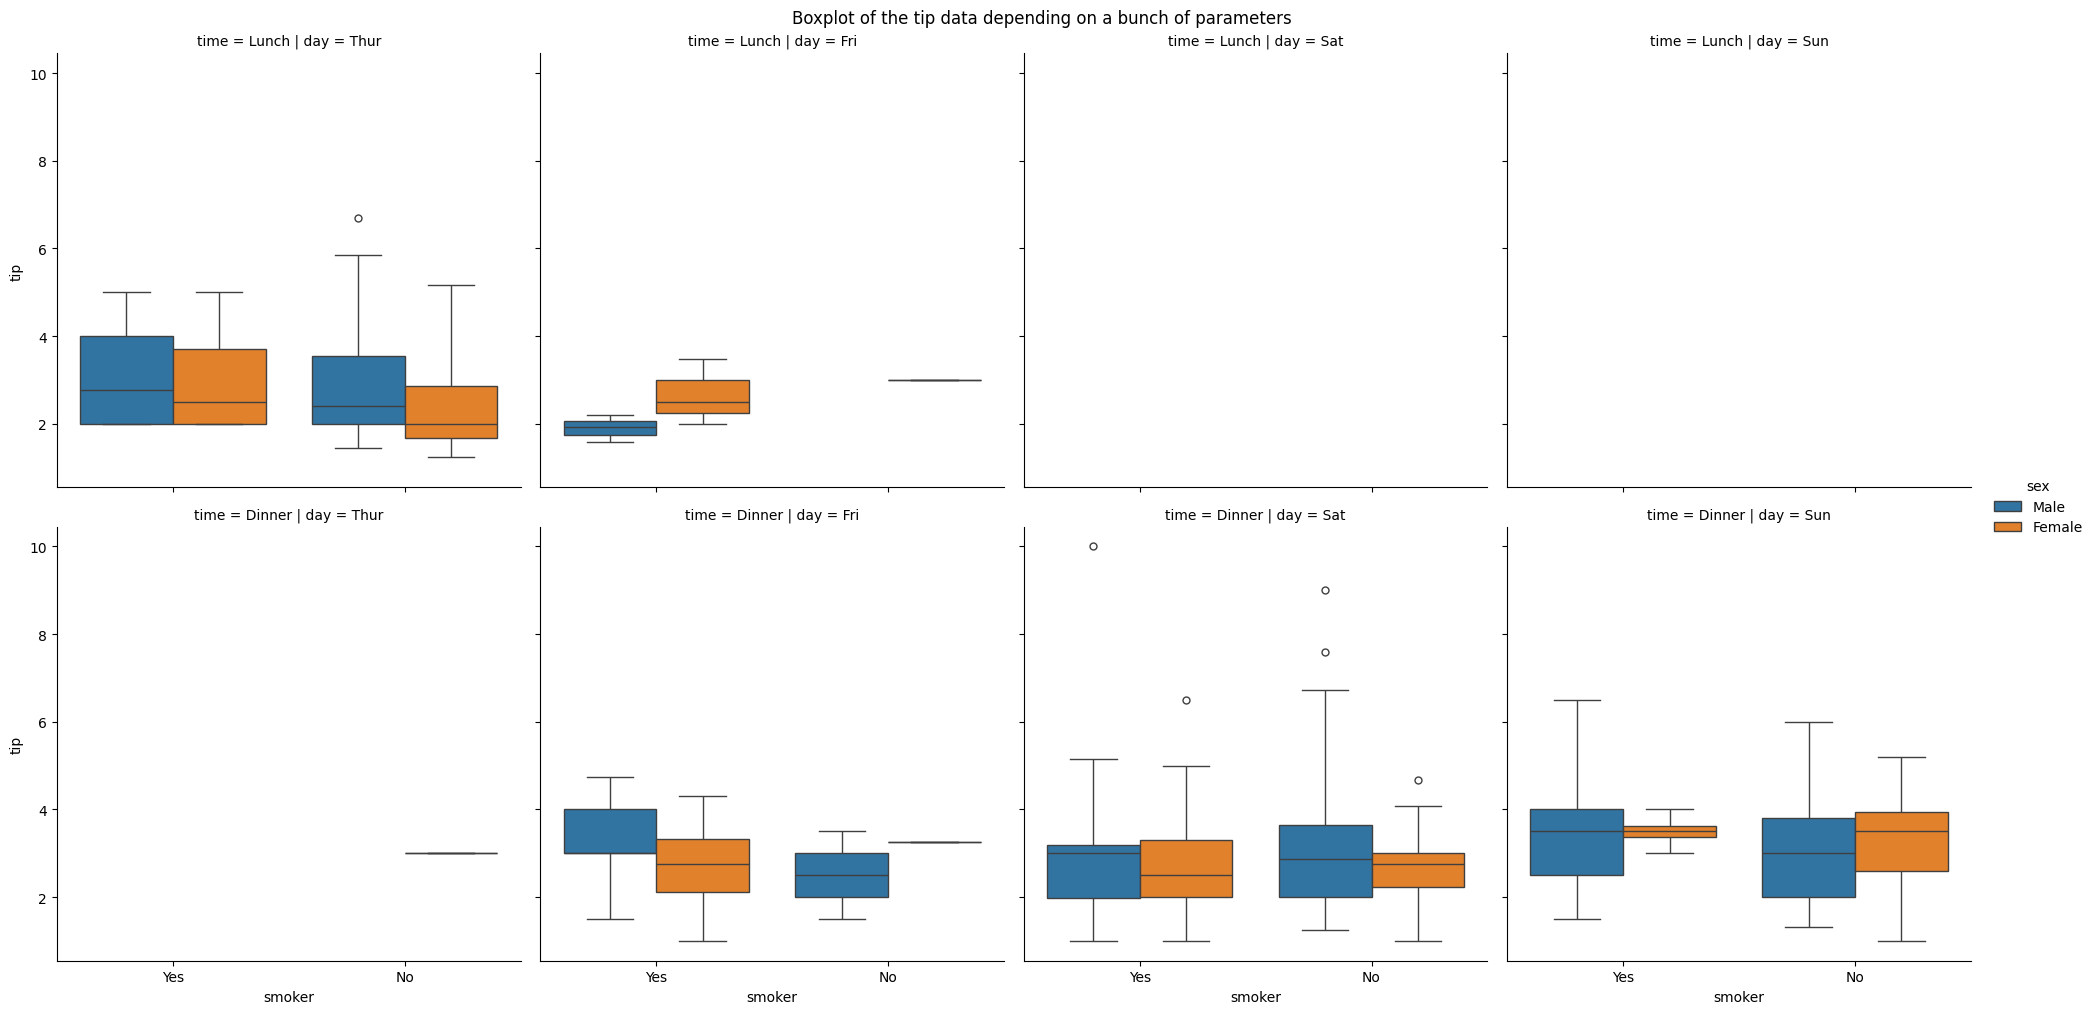

In [16]:
#boxplots on tips dataset
for i in numerical_columns_tips:
    boxplot=sns.catplot(tips, x = "smoker", y = i, row = "time", col = "day", hue = "sex", kind = "box", whis = 2)
    boxplot.fig.suptitle("Boxplot of the " + i + "data depending on a bunch of parameters", y=1.01)
    boxplot.fig.suptitle(f"Boxplot of the {i} data depending on a bunch of parameters", y=1.01) # if you use f string
    #Note that the main reason parts of this don't look very good is because we don't have enough data for some day/time combinations.
#The fact that 8 of these subplots can be generated with 2 lines of code (3 if you count the two versions of the line that gives the figure a title) is really a testimony to the power of seaborn

Now, let's go over 2 of the more useful Axes-level functions in this section, namely, `sns.swarmplot()`, and `sns.stripplot()`. Once again, these two functions look very similar to one another, and their main difference is that the first is more aesthetically pleasing, at the cost of being slightly more computationnally intensive. These functions also take many of the same arguments as the previous functions in this section, namely: `data`, `x`, `y`, `hue`, `order`, `hue_order`, `orient`, `log_scale`, `ax`, and `legend`. We won't go over these arguments again, and instead, let us introduce some new ones:

1. `size`: Works like `hue`, except it determines the marker size instead of the marker color. Note, if you want to impose a specific marker size for all markers, you should instead specify `s`, the equivalent `matplotlib.lines.Line2D()` keyword argument. 
2. `dodge`: This takes a boolean, specifying `dodge = True`, acts like `multiple = "dodge"` did in `sns.histplot()`
3. `edgecolor`: If for some reason you want the marker edge to be of a different color than the marker itself, this is where you would pass that color.

Now, for an exercise, make a grid of swarmplots (or stripplots, pick your favorite), by looping over the numerical columns of the penguins dataframe. Plot the penguin's sex on the x axis, make a row of plots for each penguin species and a column for each of the islands. 

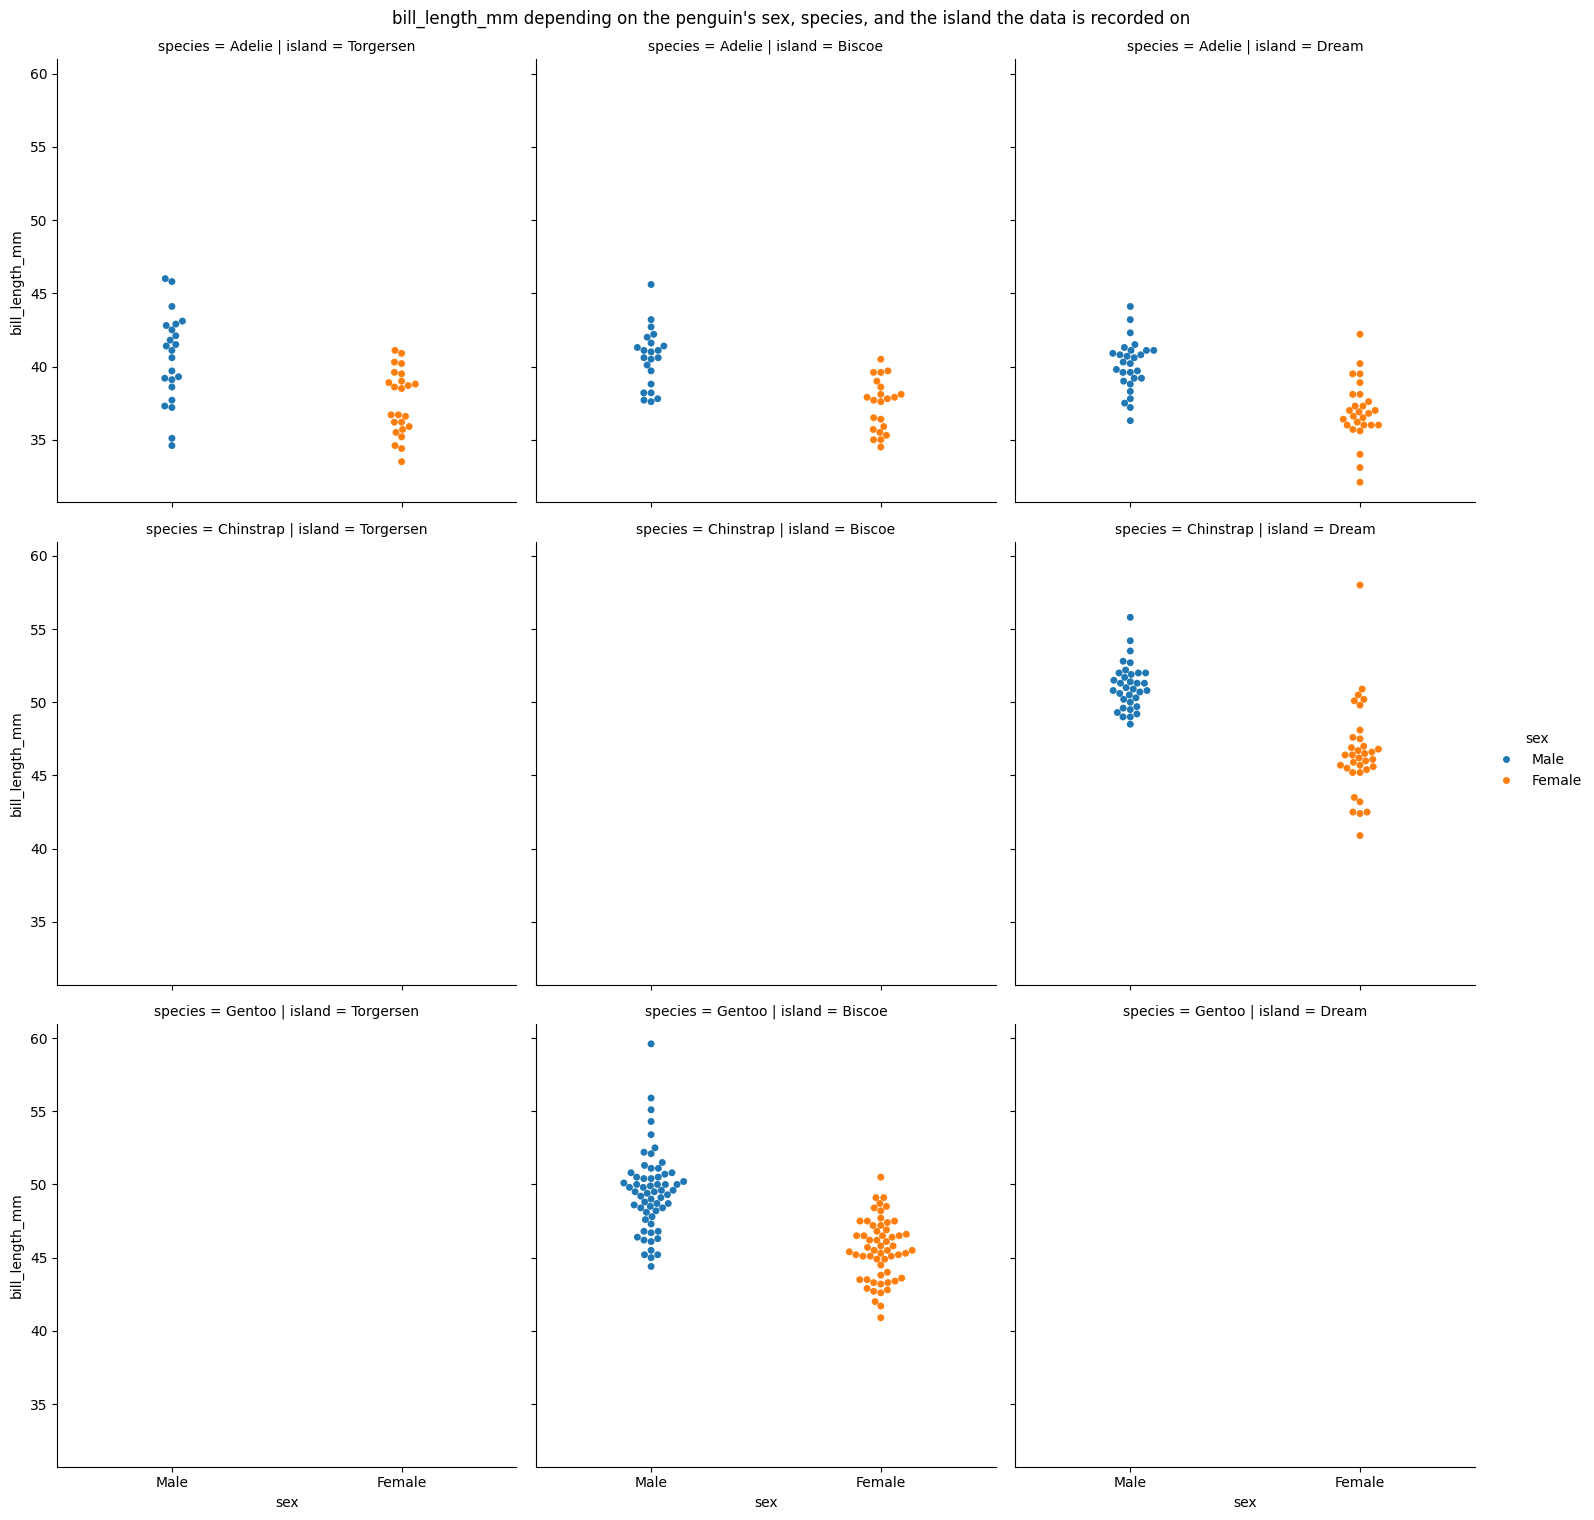

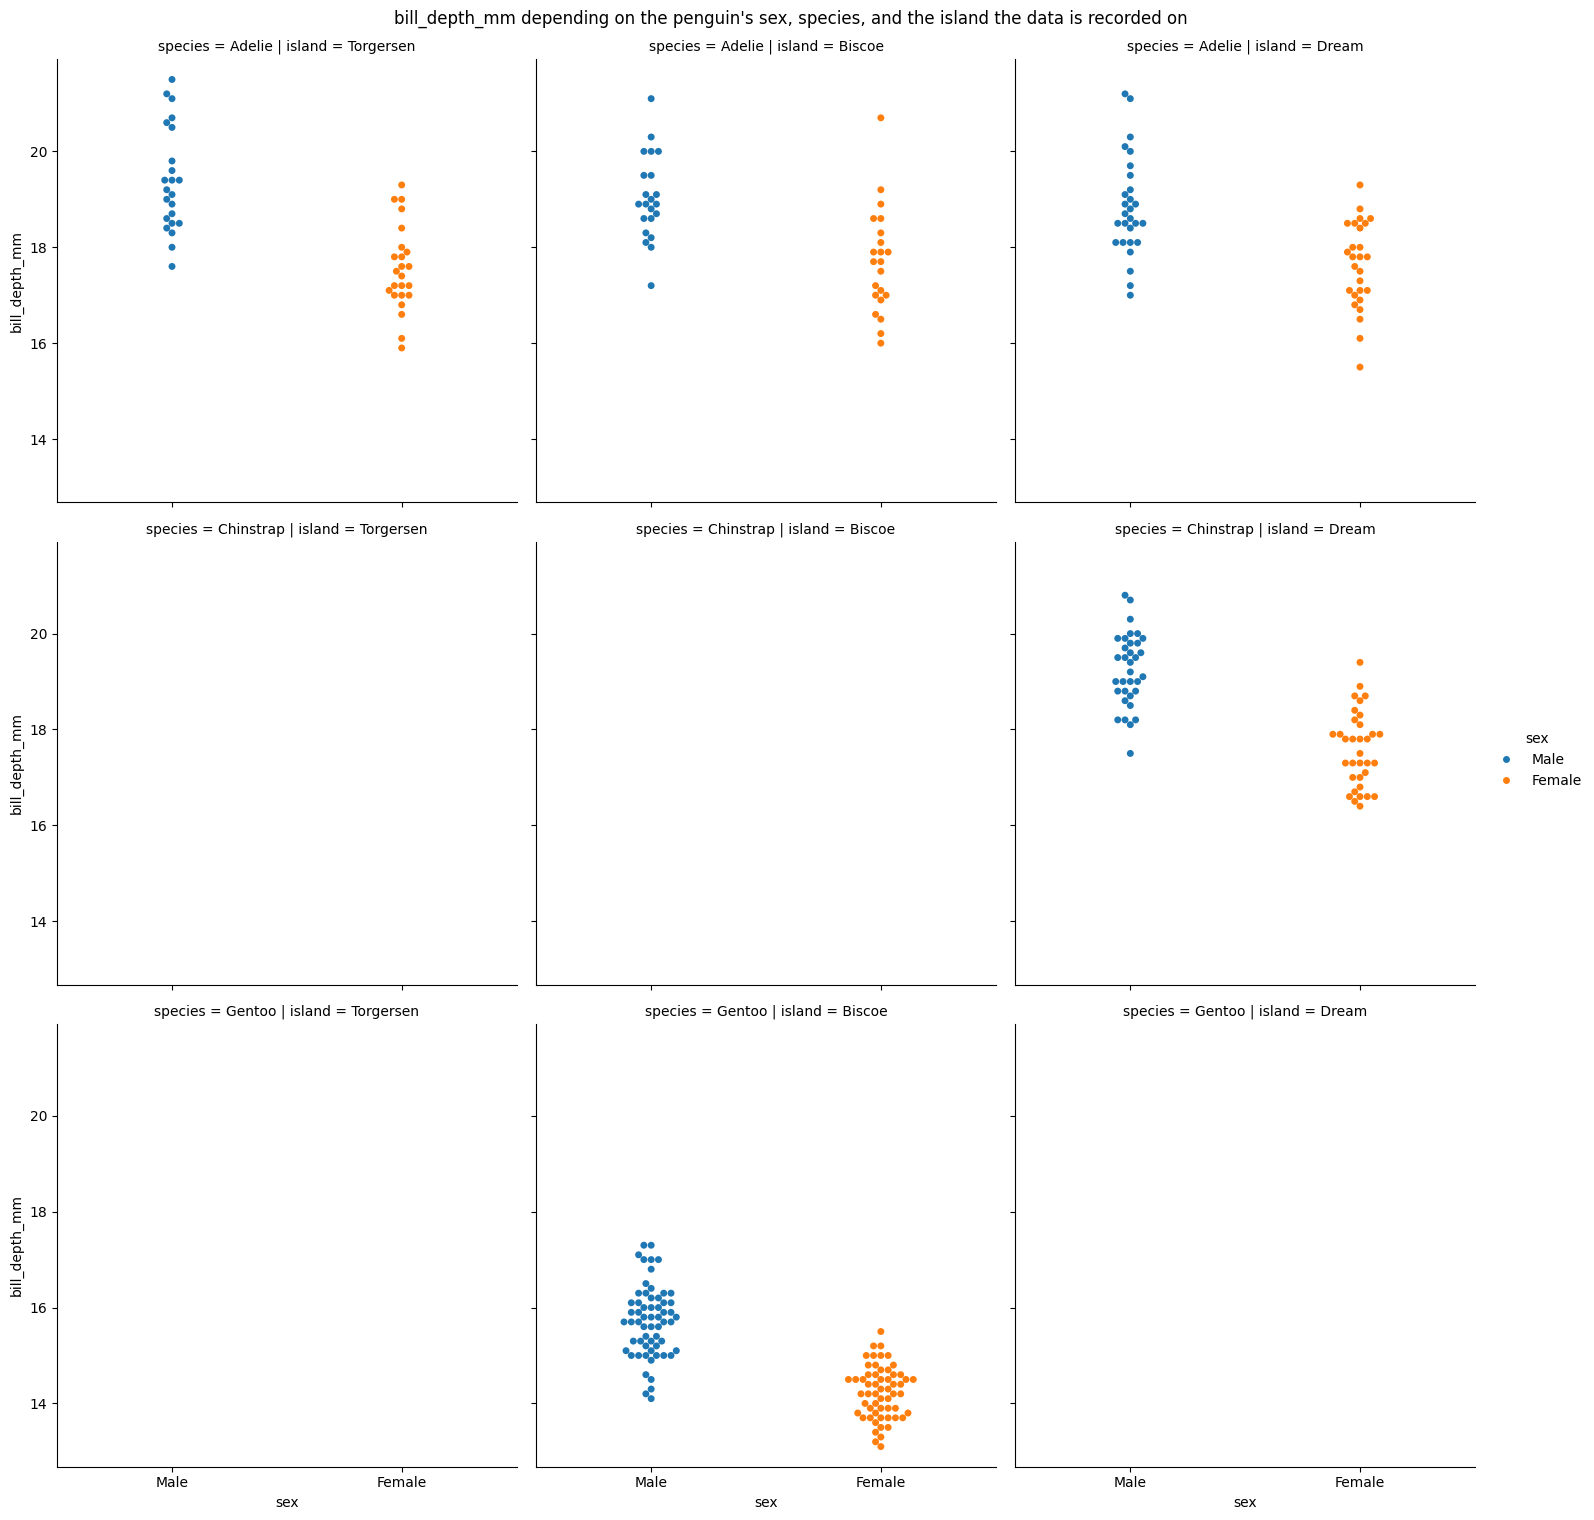

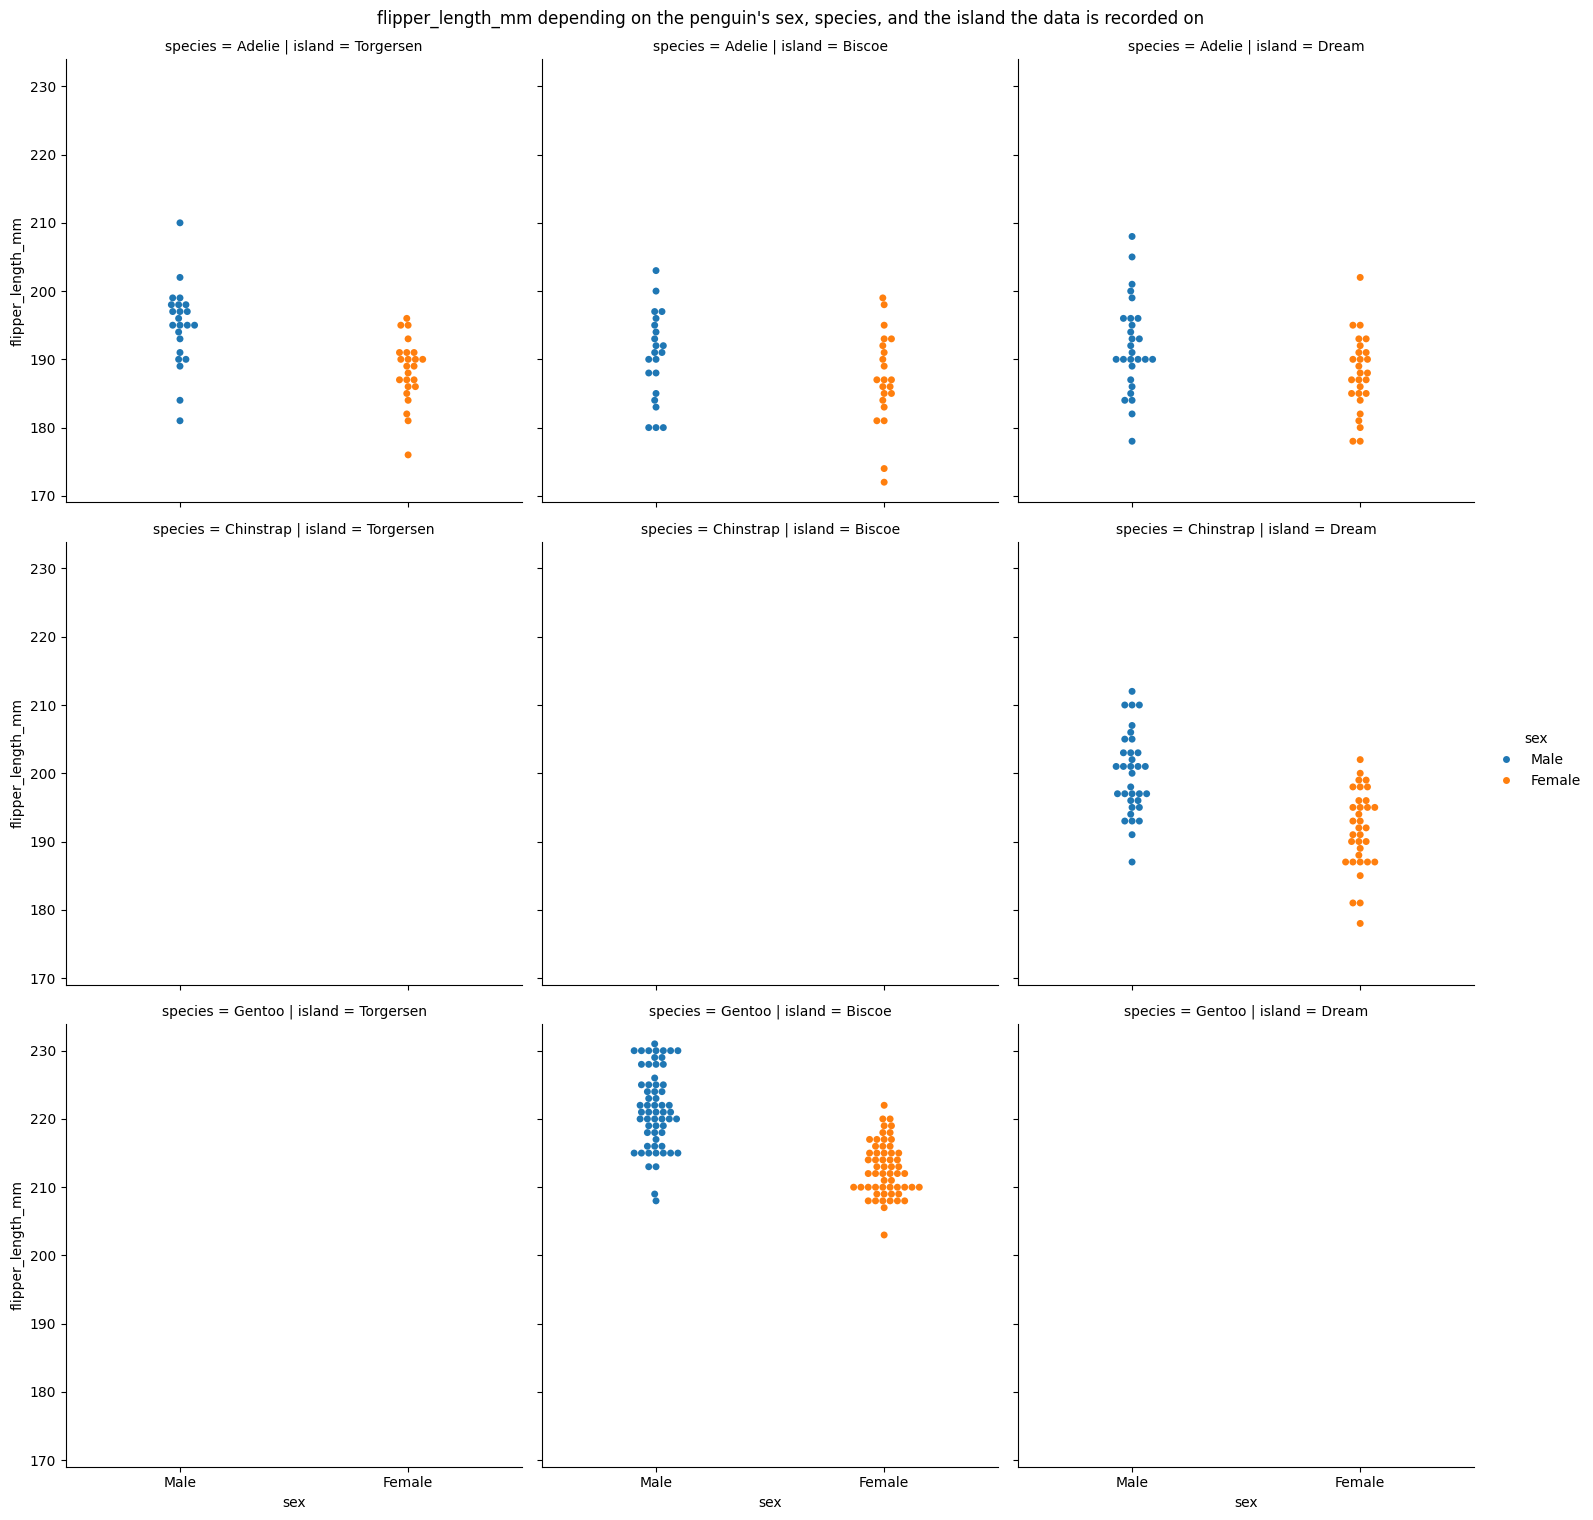

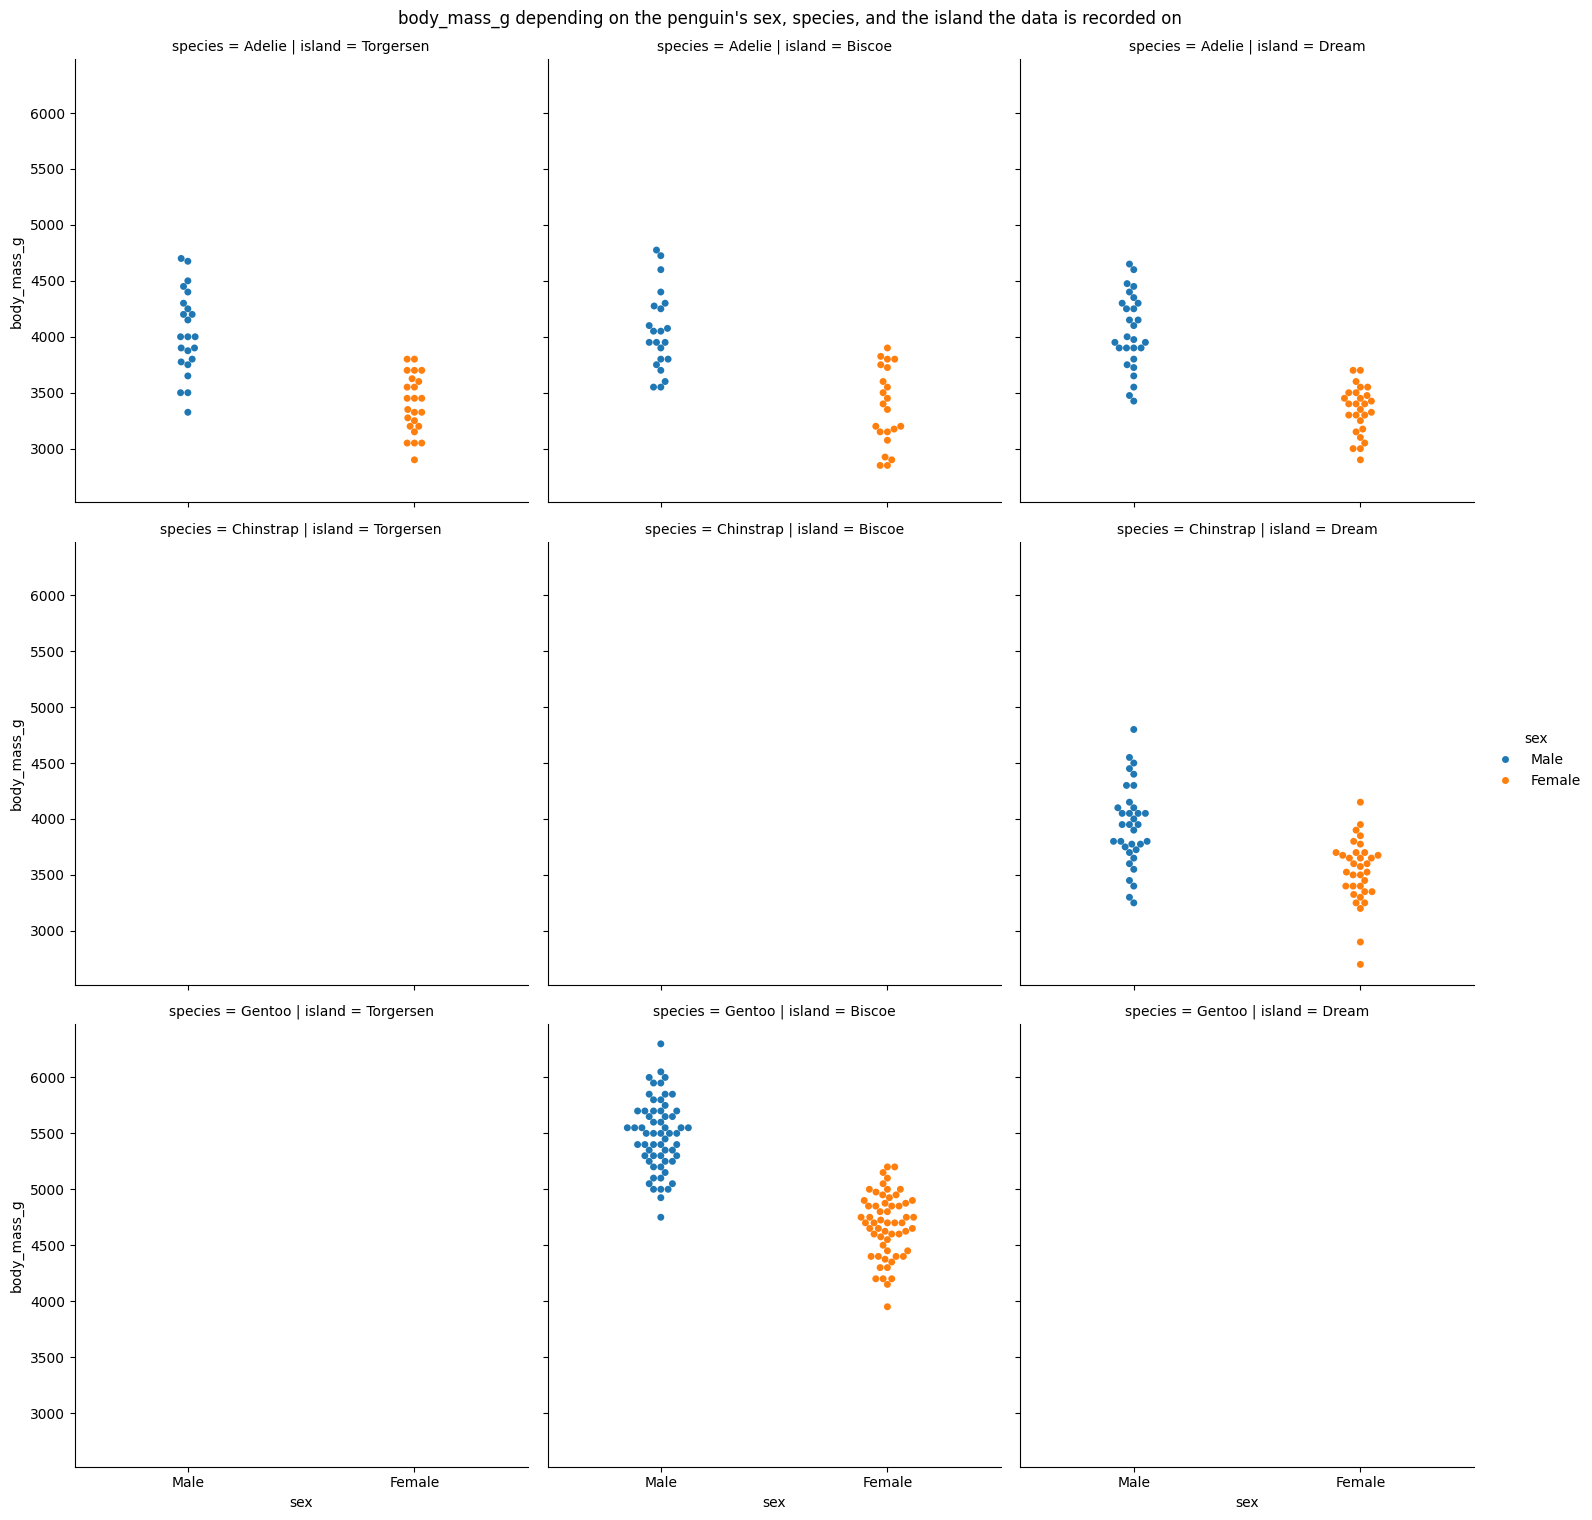

In [17]:
#make the swarmplots (or stripplots)
for i in numerical_columns_penguins:
    swarmplot=sns.catplot(data=penguins, x="sex", y=i, hue="sex", row="species", col="island", kind="swarm")
    swarmplot.fig.suptitle(i + "depending on the penguin's sex, species, and the island the data is recorded on", y=1.01)
    swarmplot.fig.suptitle(f"{i} depending on the penguin's sex, species, and the island the data is recorded on", y=1.01) #if you're using f string

Now, as you might have noticed, these two functions are very similar to `sns.rugplot()` in the sense that they give you an idea of the distribution by plotting individual observations. If instead, of plotting the individual observations, you wanted to use a kernel density estimator, you would use `sns.violinplot()`, which takes essentially the same arguments. Note that in addition to plotting a kernel density estimator for the distribution, this function also creates a small box plot of the distribution. 

Since an image is worth a thousand words, why don't you try making exactly the same grid of plots as you just made with your favorite of `sns.stripplot()` and `sns.swarmplot()`, but instead use `sns.violinplot()` this time. (Well, you should really be using `sns.catplot()` with `kind = "violin"`, but you get what I'm saying)

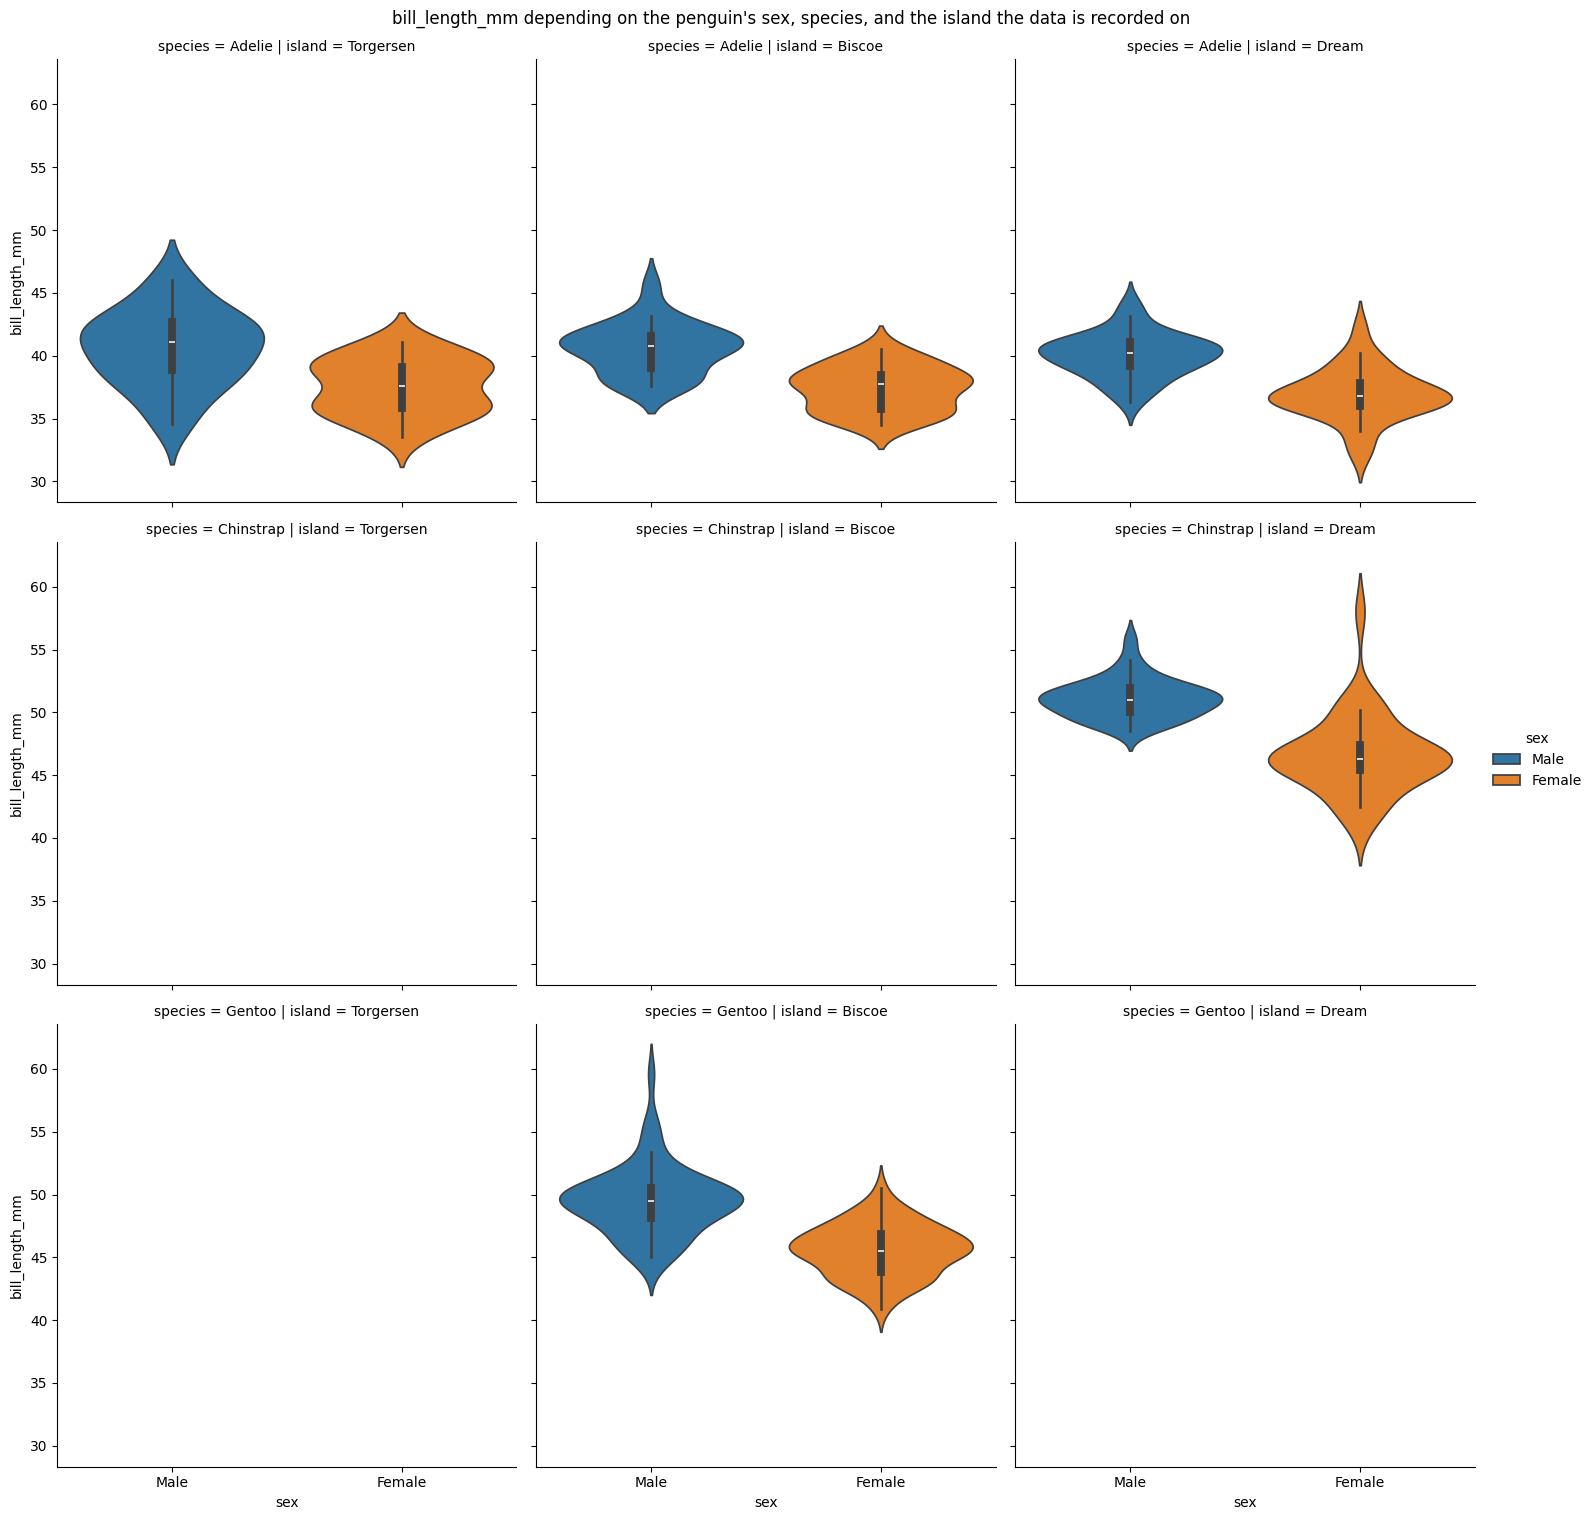

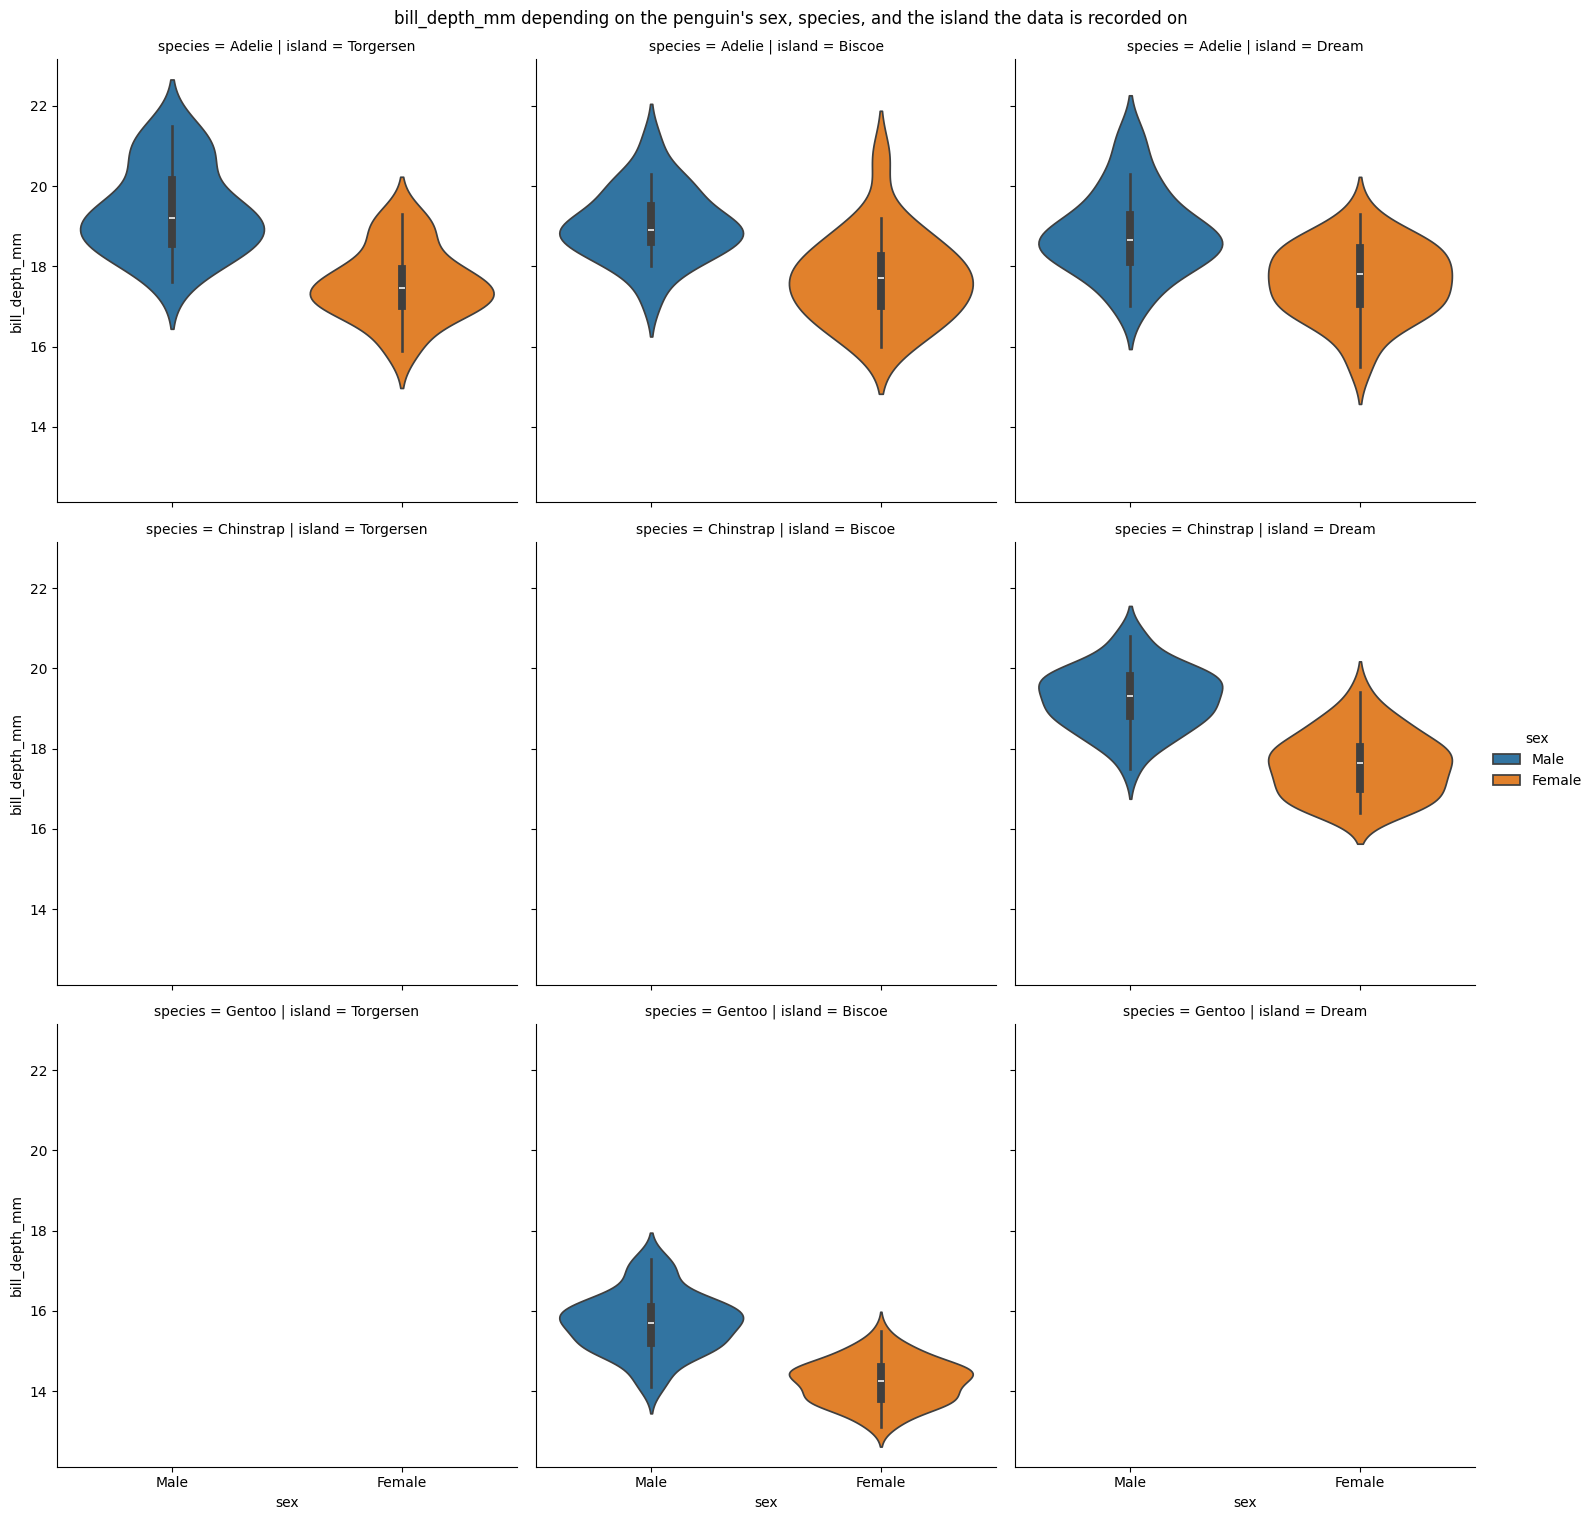

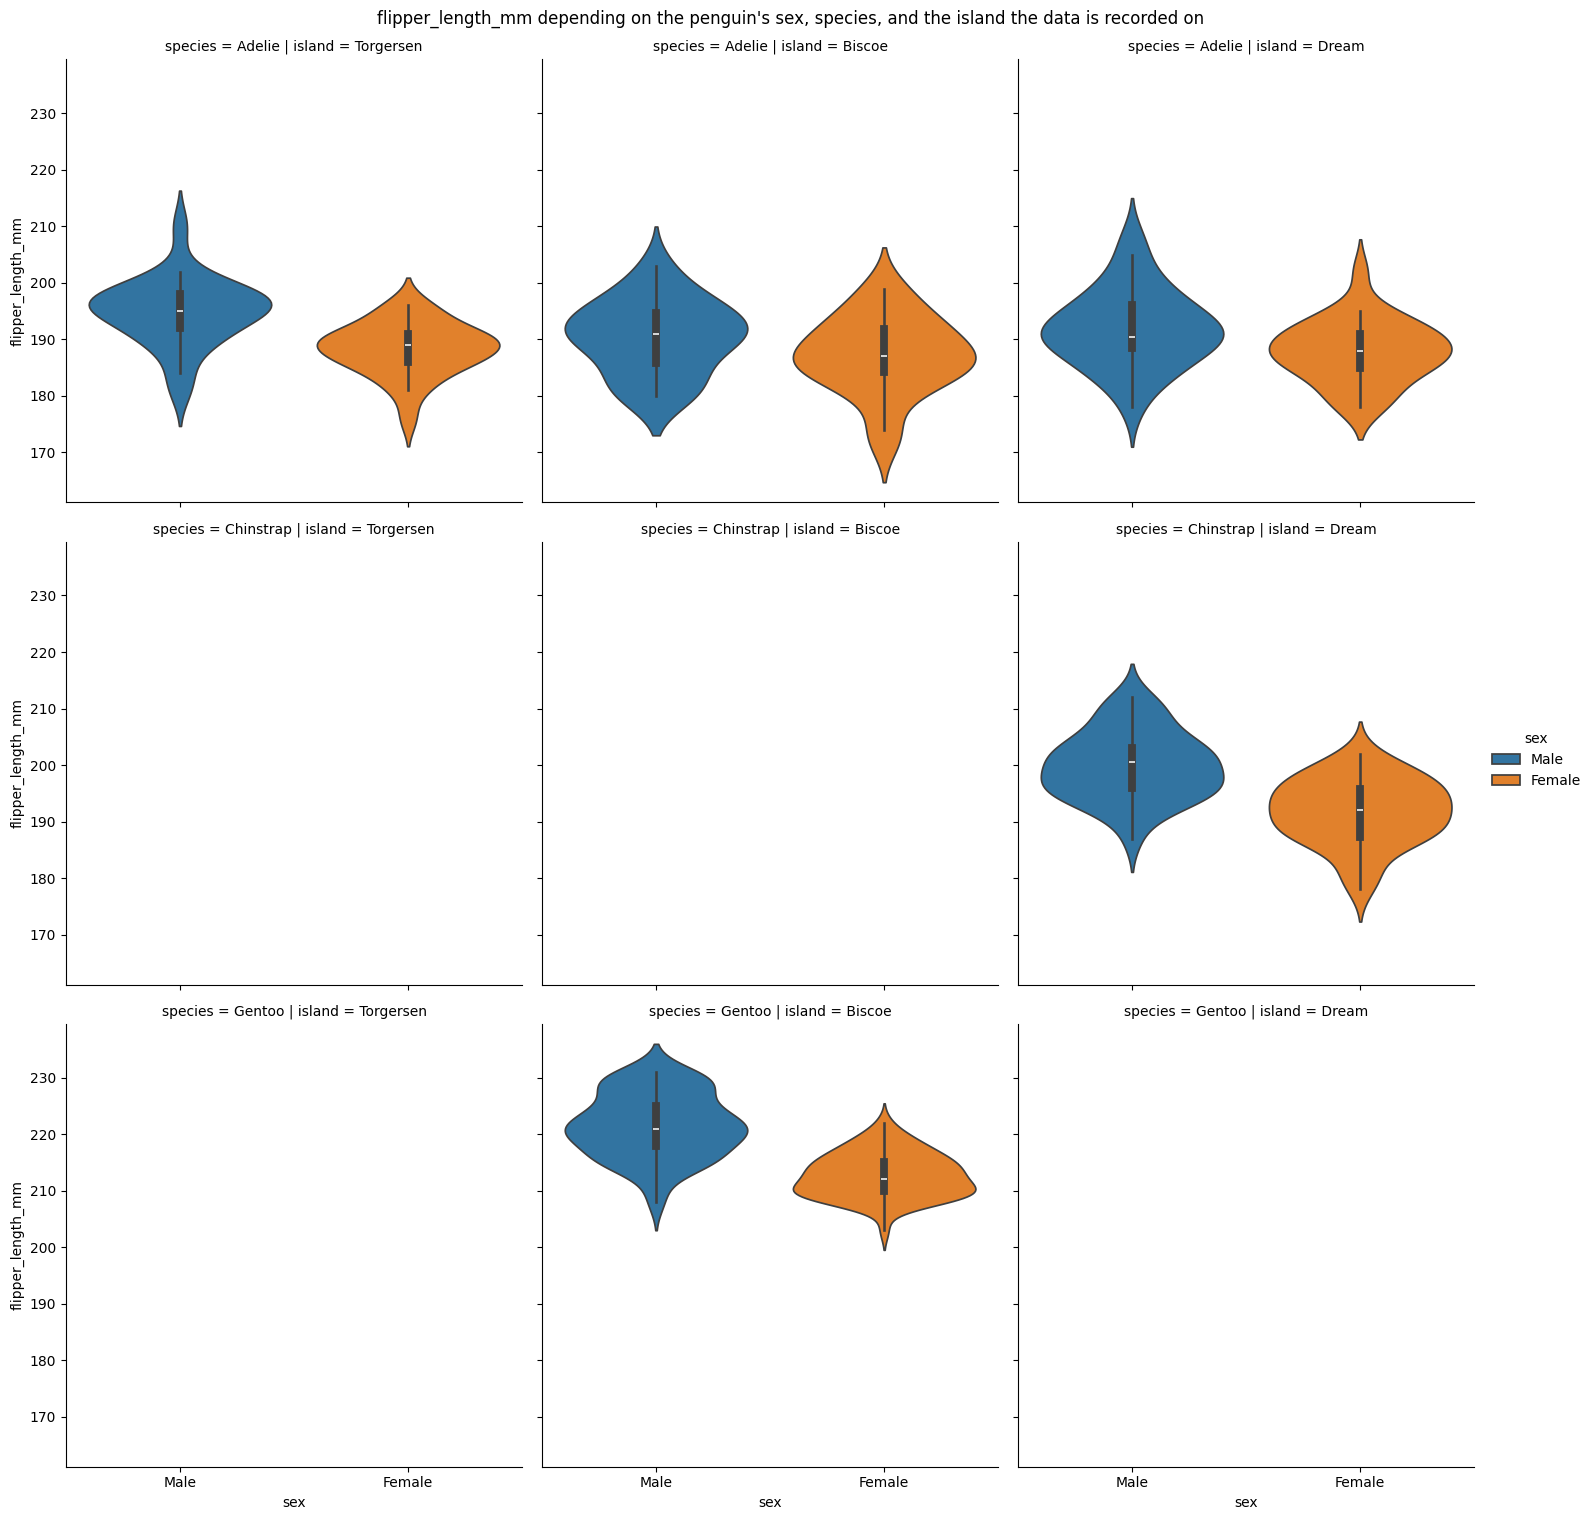

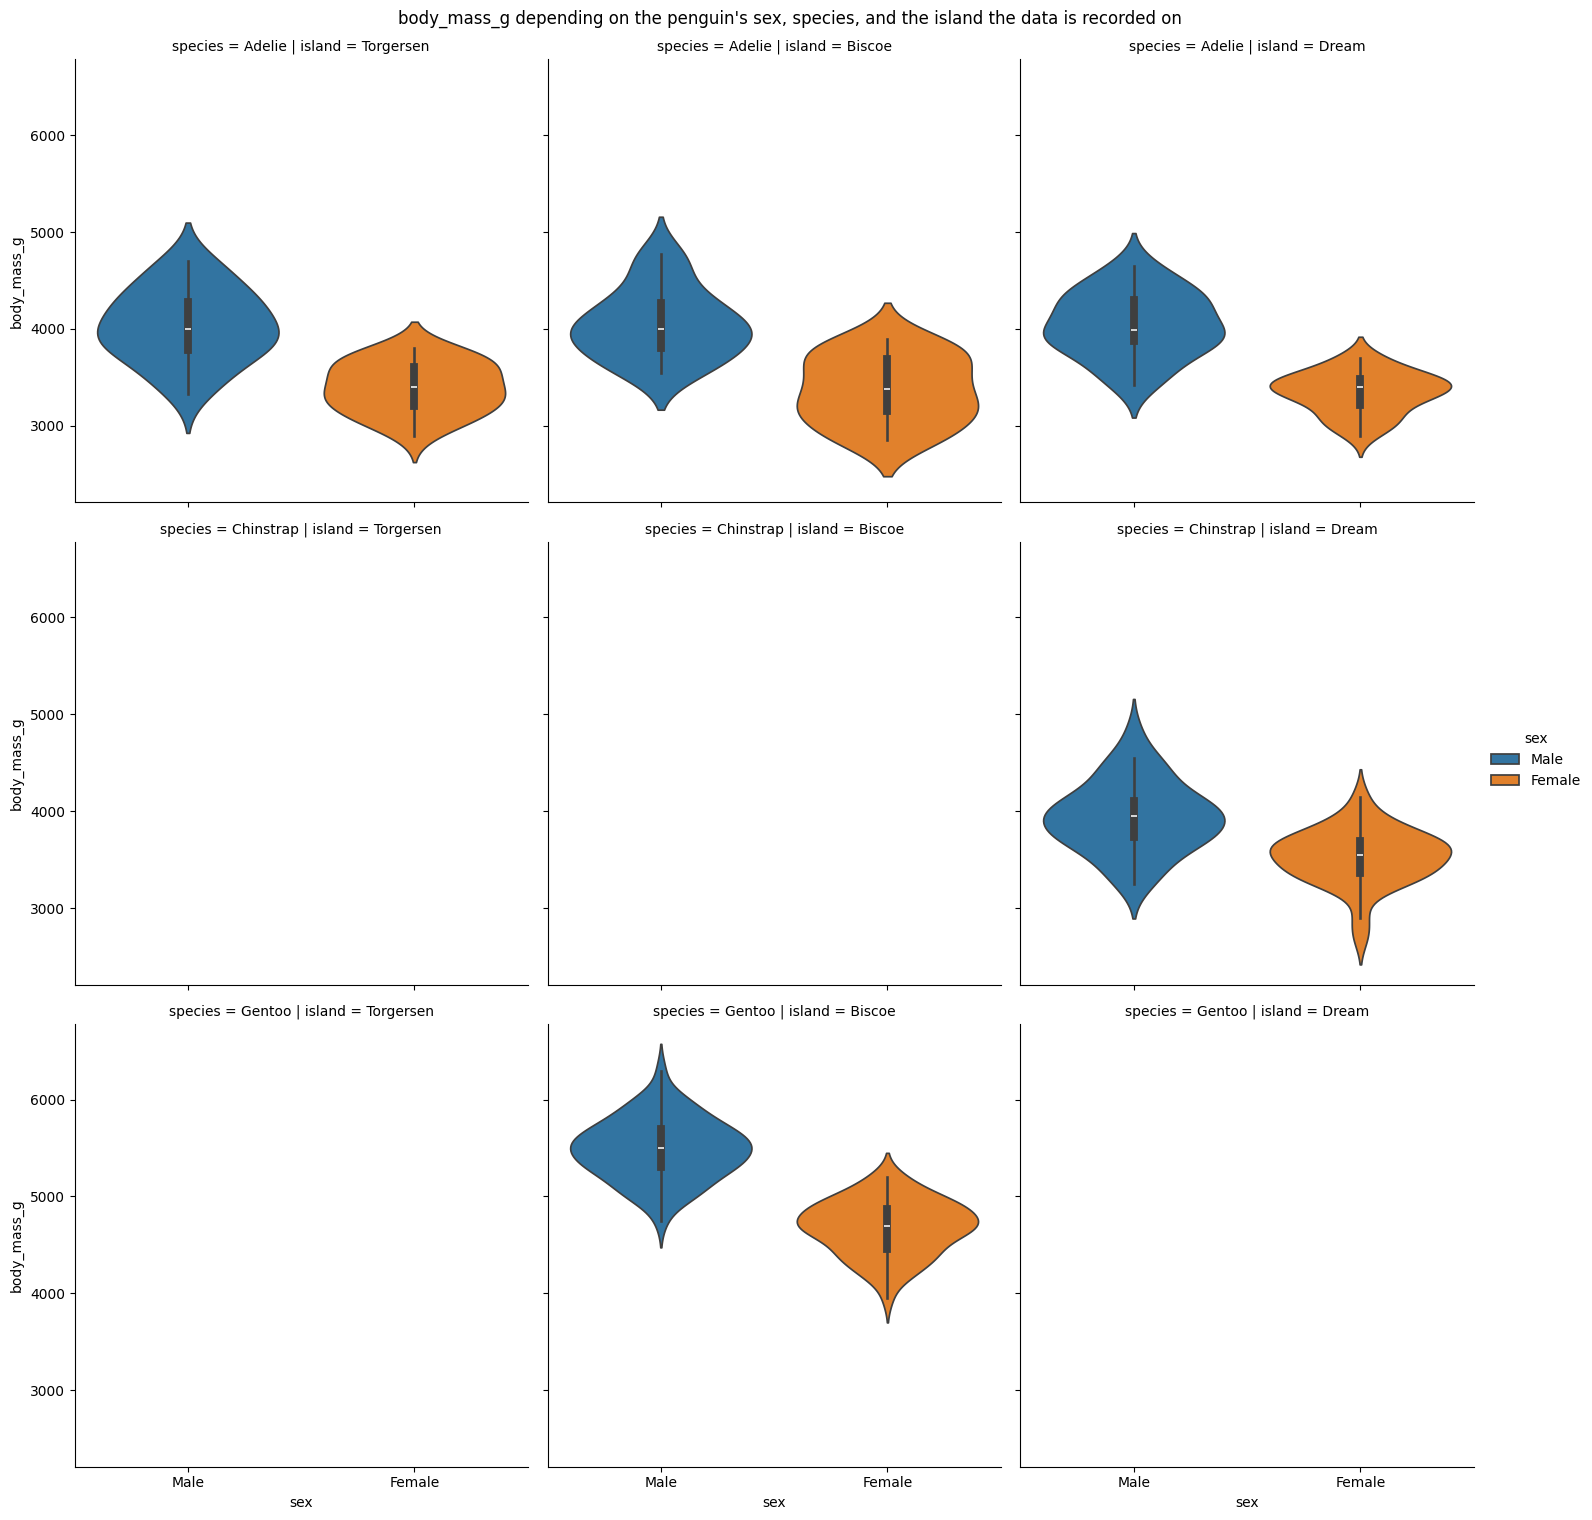

In [18]:
#alternatively, you could also make a violin plot to give us an idea of the distribution's shape
for i in numerical_columns_penguins:
    swarmplot=sns.catplot(data=penguins, x="sex", y=i, hue="sex", row="species", col="island", kind="violin")
    swarmplot.fig.suptitle(i + "depending on the penguin's sex, species, and the island the data is recorded on", y=1.01)
    swarmplot.fig.suptitle(f"{i} depending on the penguin's sex, species, and the island the data is recorded on", y=1.01) #if you're using f string

Notice how the shape of the violin plot kind is somewhat remeniscent of that of the swarm plot (less if you choose to use `sns.stripplot()` instead of `sns.swarmplot()`). Well here is a fun little challenge. Take those two plots and overlay them onto one another to study the resemblance. More specifically overlay only the subplot of the penguins of the `"Adelie"` species from the `"Torgersen"` island. To do this, you will have to create a new dataframe where you filter out all the penguins that aren't of the right species or from the right island. If you want to challenge yourself with the pandas, be my guest, but if you don't know any pandas, here is the way an expert would do it (I'm giving you this solution, as it is the one that someone trying the pandas out is least likely to know): `penguins_Adelie_Torgersen = penguins.query("island == 'Torgersen' and species == 'Adelie'")`. Once you have created this new dataframe, all that will be left is two calls of the appropriate Axes-level functions. 

species  island   
Adelie   Torgersen    52
Name: count, dtype: int64

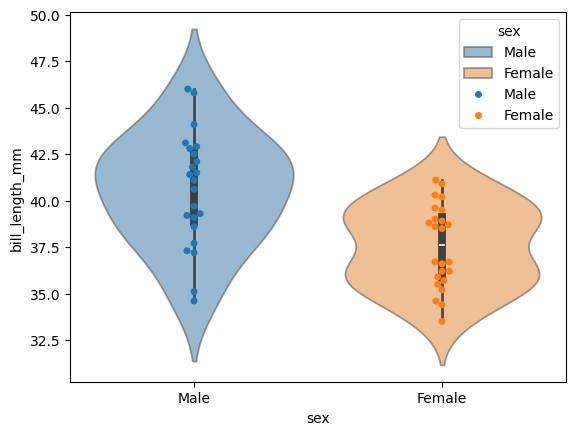

<Axes: xlabel='sex', ylabel='bill_length_mm'>

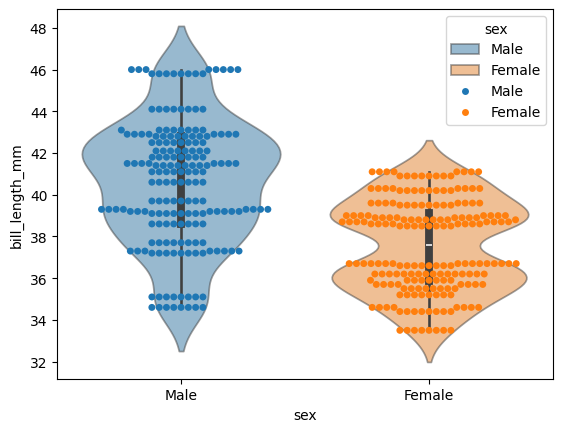

In [19]:
#Now a fun little challenge
penguins_Adelie=penguins[penguins["species"]=="Adelie"]
penguins_Adelie_Torgersen=penguins_Adelie[penguins_Adelie["island"]=="Torgersen"]

#A little bit of intermediate pandas if you're interested. Instead of using boolean indexing like this, you could create two masks as follows

mask1=pd.DataFrame(penguins["species"]=="Adelie") #You have to make the first mask into a DataFrame because the df.merge() method we're about to use doesn't exist for Series
mask2=pd.DataFrame(penguins["island"]=="Torgersen") #You don't have to make this one into a DataFrame, but it's more visually appealing and more consistent to be working with two of the same object

#Then you merge both masks, this can be done in many ways (I have demonstrated 3 of them)
merged_mask=mask1.merge(mask2, left_index=True, right_index=True) #method 1

merged_mask=pd.concat([mask1, mask2], axis=1) #method 2

merged_mask=mask1.join(mask2) #method 3

#These don't always work exactly the same (although here they do), but this isn't an intermediate pandas course, so I won't go into detail on that

#Now, notice how this merged_mask isn't a valid mask that can be passed to the DataFrame (it doesn't have the right shape) (again, this isn't a pandas course so I won't go into detail as to way). More specifically, we want to check whether both columns of this dataframe are True at once, so we use df.all(), and specify axis=1 (or axis="columns")

true_mask=merged_mask.all(axis="columns")

#finally, we can index penguins with the true mask

penguins_Adelie_Torgersen=penguins[true_mask]

#This code is longer than the boolean indexing twice option, but it is more versatile as if you needed to do it over 100 columns it would work much better. Furthermore, if you are a psychopath, here is the one line version:

penguins_Adelie_Torgersen=penguins[pd.DataFrame(penguins["species"]=="Adelie").join(penguins["island"]=="Torgersen").all(axis=1)]

#Note that in terms of computing time, for this situation, it is virtually irrelevant which one you chose, as up to this point, this entire cell takes 13 milliseconds to run

#Technically, there is a better way to do this, but it is pretty advanced, and requires some level of understanding of how things work backend. Anyways, here it goes:

penguins_Adelie_Torgersen=penguins.query("species == 'Adelie' and island == 'Torgersen'")

#It doesn't get much better than this, however, df.query() is pretty complicated, and I could make a course of about this length explaining it alone

#Now, back to relevant stuff
#if you're worried about whether you did it right, you can check pretty easily with df.value_counts

display(penguins_Adelie_Torgersen[["species", "island"]].value_counts()) 

#Here I'm only checking the species and island columns as the dataframe displayed is messier if we include the other rows (try it)
#Note that this doesn't garantee you didn't exclude rows you should have kept, only that you didn't include rows you shouldn't have, but it's still a decent enough sanity check

#Now, you can make a first plot:
swarm_overlayed_on_violin=sns.violinplot(data=penguins_Adelie_Torgersen, x="sex", y="bill_length_mm", hue="sex", alpha=0.5)
#And now we overlay the second:
sns.swarmplot(data=penguins_Adelie_Torgersen, x="sex", y="bill_length_mm", hue="sex", ax=swarm_overlayed_on_violin)

#You will notice that although these roughly speaking have about the same shape, which is to be expected, the violin plot is larger, as it is essentially a kde (so it's area is fixed), which isn't true of the swarmplot. However if we had a lot more data, this wouldn't necessarily be true. As demonstrated here (I generated extra data by simply duplicating each datapoint a few times):

#before doing anything, we call plt.show() to reset the axis object we're working on
show() #This is plt.show(), I'm just taking advantage of the fact I ran from matplotlib.pyplot import subplots, show earlier, so I get to call it without having to use the plt. prefix

data_new=penguins_Adelie_Torgersen #just creating a shorter variable name
for i in range(3):
    data_new=pd.concat([data_new, data_new], axis=0).reset_index(drop=True) #This doubles the length of the DataFrame every time it runs
    #Dropping the index prevents an error later on

#If we try making the same plot now:
swarm_overlayed_on_violin2=sns.violinplot(data=data_new, x="sex", y="bill_length_mm", hue="sex", alpha=0.5)
#And now we overlay the second:
sns.swarmplot(data=data_new, x="sex", y="bill_length_mm", hue="sex", ax=swarm_overlayed_on_violin2)

#Adding data this way will cause the violin plot to overfit the data, as it essentially amounts to giving it more confidence in every point for no good reason

Plotting numerical data and finding out relations
---

Now, we get to what is arguably the most useful section in this overview, that is, the section where you learn to plot numerical data on both Axes to try to get an idea of the relation between two numerical variables. This section will discuss 1 Figure-level function, `sns.relplot()`, and its two associated Axes-level functions, `sns.scatterplot()`, and `sns.lineplot()`, although it is mostly intended for plotting categorical variables, we will also discuss another Axes-level function, namely: `sns.pointplot()`. If I have time later, I will also add a discussion of three additional Axes-level functions, namely: `sns.lmplot()`, `sns.regplot()`, and `sns.residplot()` (honestly, most of the time it's almost as good to use regular matplotlib for the sort of plotting physics demands).

As usual, `sns.relplot()` takes some of the same keyword arguments as `sns.displot()` and `sns.catplot()` did, namely, `x`, `y`, `hue`, `hue_order`, `row`, `col`, `row_order`, and `col_order`, `kind` (which in this case can be one of `"scatter"`, or `"line"`), `height`, `aspect`, and `legend` (which again takes one of `"auto"`, `"brief"`, `"full"` or `False`). 

The main new keyword arguments to be in this section are `style` and `size` which act exactly like `hue`, except for the marker (and/or line) style and size, of course, each of these is accompanied by its associated order argument, i.e. `style_order` and `size_order` which work like `hue_order`. Now that this is said, let's go for an example.

Create a scatter plot of the tips dataset, plotting the `"tip"` against the total bill, `"total_bill"`, use the customer's `"sex"` to determine the color of the markers and the marker style (you typically have the same categorical variable determining both, as it is easier to interpret visually), give each time of day its own row, and whether the customer smokes or not in each column. Make the customer's party size determine the size of each point, and make each subplot $6\times 6.6$ inches

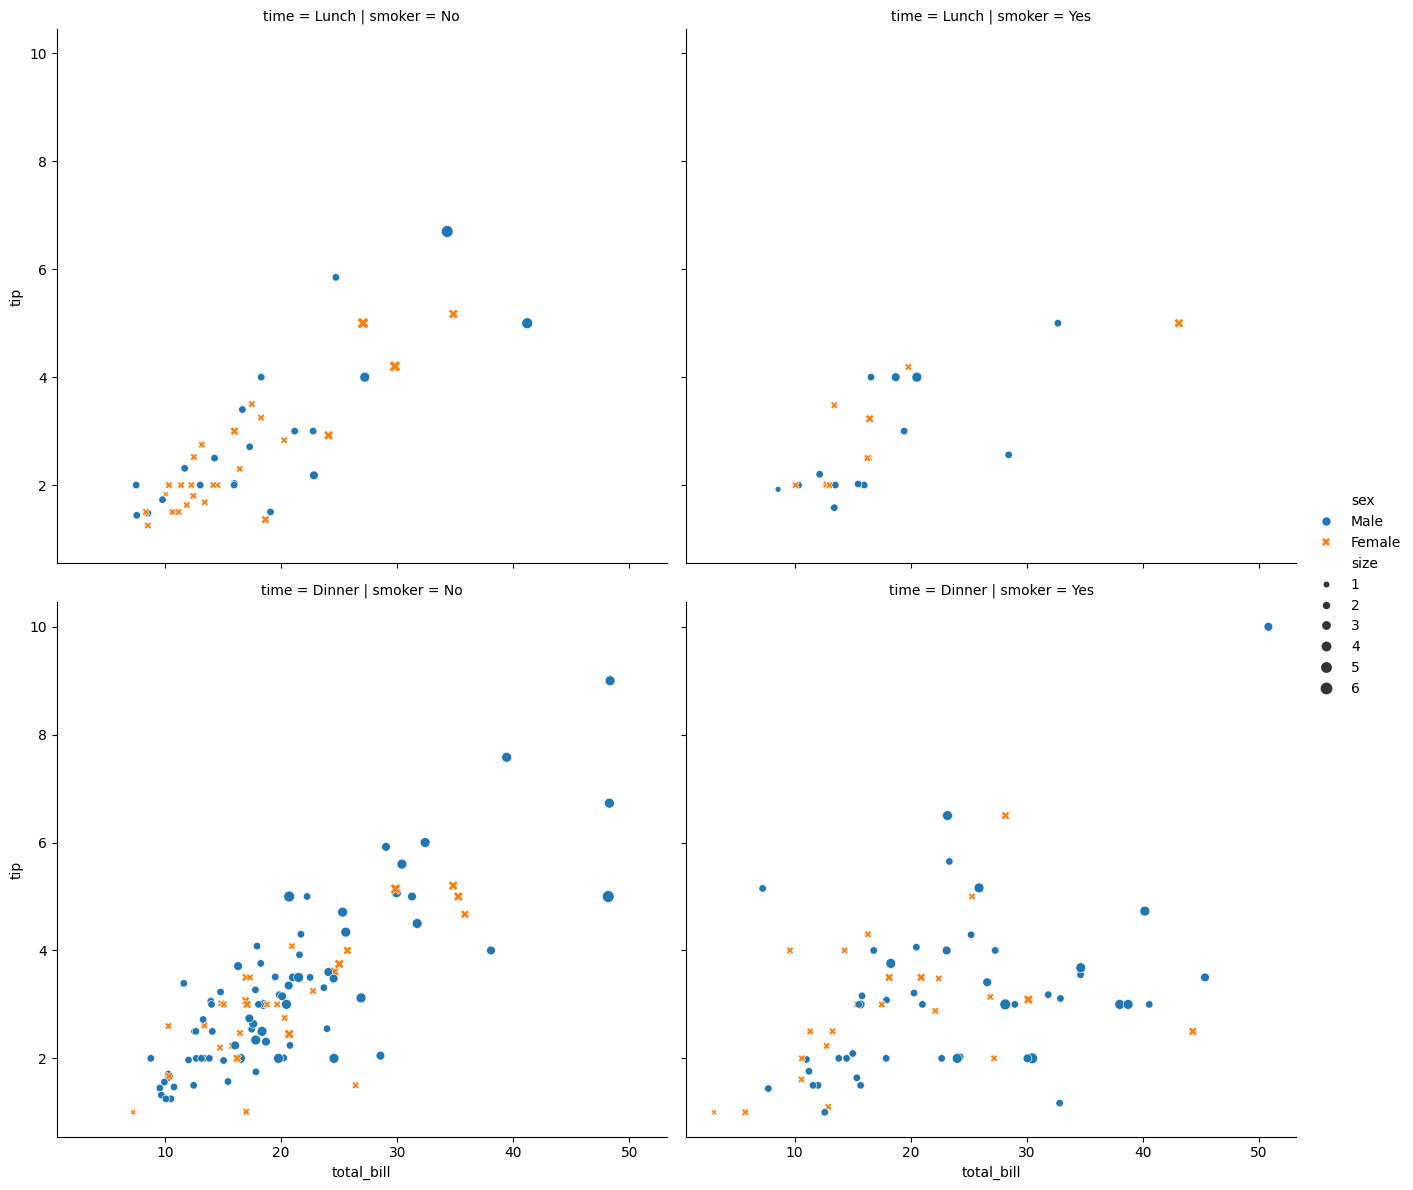

In [20]:
#using sns.relplot() to find out the possible relations between variables in the tips dataset with a scatter plot

sns.relplot(tips, x="total_bill", y="tip", hue="sex", style="sex", size="size", row="time", col="smoker", col_order=["No", "Yes"], legend="auto", height=6, aspect=1.1, kind="scatter")
#technically you don't have to specify col_order here, I just find that this order makes more sense
#Note that size and s aren't equivalent in seaborn more specifically, s is a kwarg that gets passed by sns.relplot() to either sns.scatterplot() or sns.lineplot(), except it's also a kwarg of that function, and it is then passed as an argument to either matplotlib.axes.Axes.scatter() or matplotlib.axes.Axes.plot() (which actually proceeds to pass it as a kwarg to matplotlib.lines.Line2D()).

Now, note that `sns.lineplot()` actually accepts a keyword argument that isn't accepted by `sns.scatterplot()`, namely `markers`, which is `None` by default, but it can also accepts a boolean, or a list or other iterable (not a string though). `True` will simply use the default marker styles, `False` will draw just the line connecting the markers, without the markers themselves. Passing a list of valid matplotlib marker styles, maps each unique value in `style_order` to the corresponding style (passing a dictionnary is also possible, but people rarely do that). I'm honestly not sure whether the default of `None` acts like `True` or `False`, and documentation doesn't say, so my best guess is that it depends, but I'm too lazy to test enough scenarios to be certain about that, so don't quote me on it.

That said, make the same plot, except connect the points together, (i.e. make it as a lineplot), keep the individual markers showing, just add a line connecting them. Know this plot will look weird if you decide to specify `size`, so do that at your own risk (that said, I nonetheless strongly encourage you try it and see for yourself).

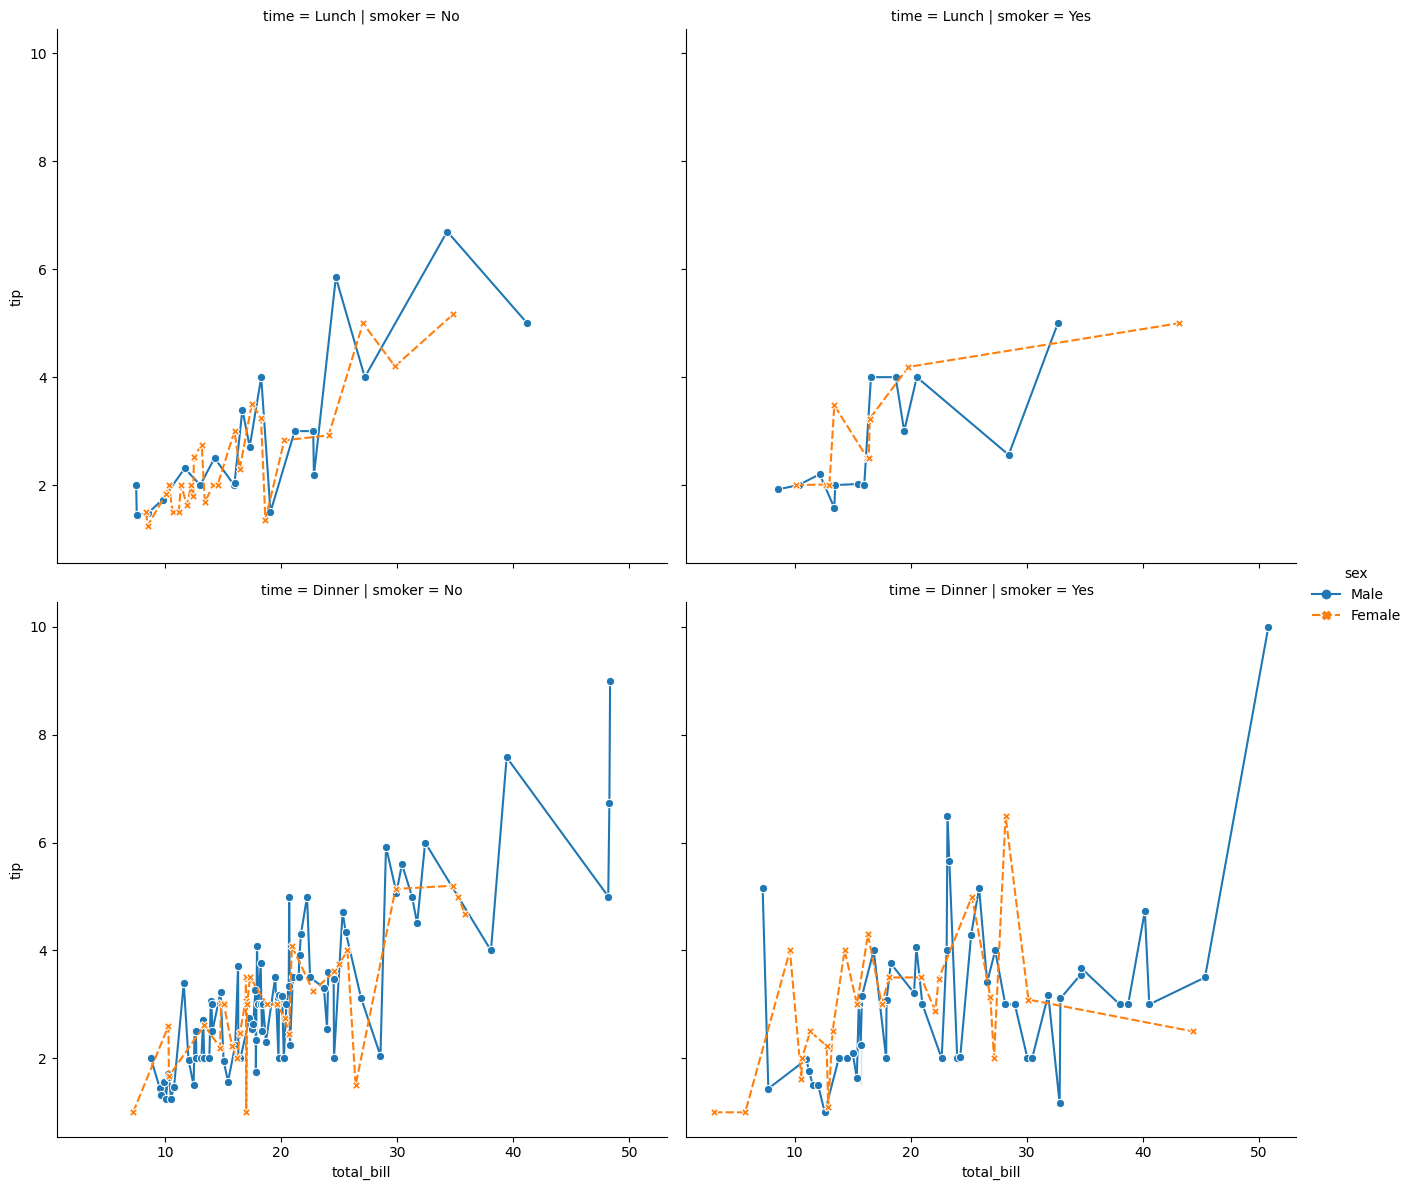

In [21]:
#Now make a line plot (you should maybe avoid specifying size, though I strongly encourage you to try specifying it and see what happens, and figure out why)
sns.relplot(data=tips, x="total_bill", y="tip", hue="sex", style="sex", row="time", col="smoker", col_order=["No", "Yes"], legend="auto", markers=True, height=6, aspect=1.1, kind="line")


Now, know that `sns.lineplot()` has an interesting property, when a single x value is associated to multiple y values in the dataset, to demonstrate this, make a line plot on the penguins dataset following the instructions in the next code cell.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

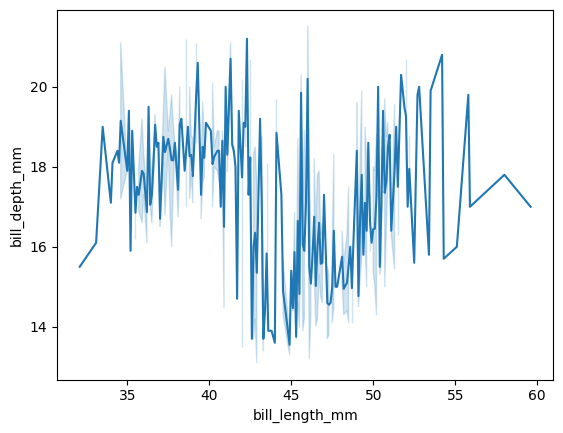

In [22]:
#Now, let me show you what happens if you try using lineplot() (and by extension relplot() with kind=line), when you have multiple y values, for a given x value by using the penguins dataset.

#Well show you is a way of speaking because you will have to write the code. Plot bill_length_mm in x against bill_depth_mm in y. (Don't worry about separating species and islands, or any formatting, for the sake of this, we want a single line)

sns.lineplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

Now, this plot is a mess, so to understand what is going on, let's zoom in on the region where `bill_length` is between 35 and 40 mm. There are two ways to do that, depending on whether you know how to use matplotlib.pyplot or pandas better. Here, I encourage you to use the pandas, but I will still go over the matplotlib for the sake of completeness.

If you're using pandas, you will want to create a `penguins_restricted` dataframe, which is simply the penguins dataframe but with `"bill_length_mm"` in the desired range. If you're a beginner or intermediate at pandas, I encourage you to give creating this dataframe a try, as it's good practice. If you don't know any pandas, here is the solution an expert would most likely use (and if you're an expert, I'm not really giving any spoilers): 
    
`penguins_restricted = penguins.query("35 < bill_length_mm < 40)`

Once you have that dataframe, it's just a question of making the same plot, except with a different dataframe.

If you insist on using the matplotlib (which I won't include in my solutions as it is less efficient for larger datasets, and let's be honest, because I'm lazy), you would use the `plt.gca()` function to Get Current Axes (litteraly gca), and store that into a variable, by convention, people use `ax`, then you would use the `matplotlib.axes.Axes.set_xlim()` method (which you would call by going `ax.set_xlim()`), to set the lower and upper x limits. This method is inefficient for larger datasets, as even though the rest of the plot is hidden, it still exists, and takes up runtime to generate, so unless you're lazy, have a powerful machine, and a reasonably small dataset, I don't encourage using this.

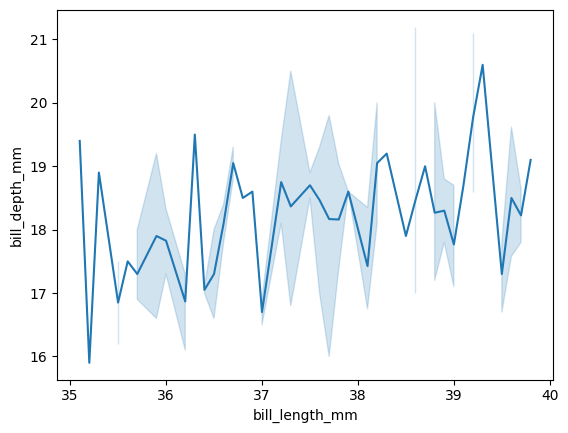

In [23]:

#You probably don't understand what you're looking at here, and that's normal, for the sake of the explanation, redo this, but only include the part of the dataframe where bill length is between 35 and 40

penguins_restricted=penguins[35 < penguins["bill_length_mm"]][penguins[35 < penguins["bill_length_mm"]]["bill_length_mm"] < 40] #When in doubt, do yourself a favor, don't be like me and do this in two lines

#If you're very good at pandas or don't know what you're doing and used the code I generously provided
penguins_restricted = penguins.query("35 < bill_length_mm < 40")

sns.lineplot(data=penguins_restricted, x="bill_length_mm", y="bill_depth_mm")
plt.show() #This is not necessary in jupyter because frontend exists

Now, what in the world is going on here? Let me explain. When you have more then one y value for a single x value, there are two reasonable ways to make a lineplot, the first being to simply draw a line for each y value, however, this assumes that you have (at least roughly), the same amount of data for each x value. The other option is to compute an estimation of a y value that represents all the actual y values, say, their arithmetic mean. This is what the actual line on the plot represents, it takes an estimator (by default the mean), and plots that instead of the actual data. 

Now, what does the shaded area represent? Well that area stands in for errorbars, by default, seaborn plots a 95% confidence interval using bootstrapping (exactly like `sns.barplot()` and `sns.pointplot()`), but it is of course possible to change that (If you're curious, it is also possible to change the shaded area to actual error bars, and this is actually one of the rare situations where it makes some sense to do that)

If you want to see something kind of funny (to me at least), read what will follow, otherwise, skip to the next markdown cell.

What would you say if I told you it is actually easier to make a scatter plot with error bars by using `sns.lineplot()` than it is with `sns.scatterplot()`. As a matter of fact, it is impossible (to my knowledge) to include error bars onto a scatter plot by using only `sns.scatterplot()`. Since it takes no error parameters that would define an error, and has no way of using estimators.

Now, the next order of business is to establish that we can use `sns.lineplot()` to make a scatter plot. This is actually quite easy assuming we have only one y value per x value. We can simply set `markers=True` to show the markers a scatter plot would have. Then, we need to make the line disappear, there are many ways to do this all which are the same as in matplotlib. My favorite is to simply set the line style to no line at all. The easiest way to do this is by passing an empty string to the `ls` argument (`ls=""`).

However, this doesn't allow us have error bars. To do that, we need multiple y values per x value. Assuming we only have the real observation and error value, it is however possible to generate 2 observations that will have a mean at the real observation, and a standard deviation of the error. Conveniently, there is an easy way to do this. Say we have an observation $o$, and an error value $err$. We simply create two new "observations" ($o_1$ and $o_2$) as follows: $$o_1=o-err$$ $$o_2=o+err$$ Trust me, once we take the two columns generated by $o_1$ and $o_2$ and make them into one long column (by creating a new DataFrame ideally), they will have the right mean and standard deviation. (If you don't trust me, do the maths)

Now that we have a way to get the error bars, we could be tempted to do exactly the same as when we made a scatter plot without error bars, (specifying `err_style="bars"`, and `errorbar="sd"` of course). However, we will run into another issue, namely, the markers no longer appear (well depending on the seaborn version you're running, they either don't appear or appear at either end of the error bar which isn't better). This makes sense, as setting `markers=True` only works if the markers would appear on the line (it's more complicated, but that's the short version). Luckily, adding error bars actually gave us another option to show markers. Indeed, we can now specify `err_kws`, a dictionnary of keyword arguments to be passed to either `matplotlib.axes.Axes.fill_between()` if `err_style="band"` or `matplotlib.axes.Axes.errorbar()` if `err_style="bars"`. Why does this matter? Well it turns out `matplotlib.axes.Axes.errorbar()` has a keyword argument that allows the user to specify what marker they want in the middle of their error bar. By default, seaborn passes `None` to that argument as it expects the line to pass in the middle of the error bar. Still, if one of the entries of the `err_kws` dictionnary specifies the `marker` argument of `matplotlib.axes.Axes.errorbar()`, the desired marker will in appear in the middle of the error bar.

Therefore, it is possible to make an error bar plot with `sns.lineplot()` but not with `sns.scatterplot()`, of you're curious as to what the code would look like, I have given an example on the `penguins_restricted` dataframe (I specified a few more `err_kws` than I talked about just to make the error bars look nicer), feel free to copy-paste the code into a code cell to try it out:

```
sns.lineplot(data=penguins_restricted, x="bill_length_mm", y="bill_depth_mm", ls="", 
                err_style="bars", errorbar="sd",err_kws={"marker":"o", "ecolor":"black", 
                "elinewidth":.5,"capsize":2, "capthick":1})
```

Before you say anything, yes, I am aware, that this essentially amounts to taking seaborn, which is supposed to make matplotlib more friendly to work with, and doing matplotlib inside it in such a way that it would be arguably less complicated, and definitely less convoluted to just do this whole thing in matplotlib. I just find it funny that it's possible to make a scatter plot with error bars using the function for plotting line plots, but not the one for plotting scatter plots.

Now, if you have read my sheninagans until here, here is a reward: although this is not the intended use of this function, if you want easy error bars, you can use a function from the categorical variables section, namely `sns.pointplot()`, which uses an estimator (arithmetic mean by default), to represent all the points that share an x value, with a single point, and computes error on that estimator. For more information, I encourage you refer back to that section.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

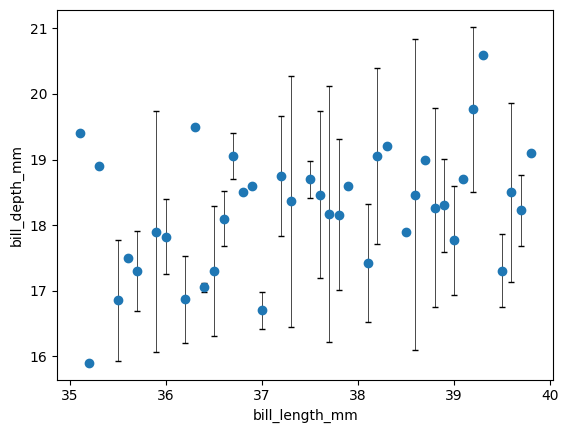

In [24]:
#Try pasting the code from the markdown cell into here
sns.lineplot(data=penguins_restricted, x="bill_length_mm", y="bill_depth_mm", ls="", err_style="bars", errorbar="sd",err_kws={"marker":"o", "ecolor":"black", "elinewidth":.5,"capsize":2, "capthick":1})

sns.pairplot() and sns.jointplot()
------------

As you might have guessed, this section will cover two functions that don't really quite fit into any other section, namely: `sns.pairplot()` and `sns.jointplot()`. 

As you might also have guessed, I didn't know what to call this section.

The first function we will go over, `sns.pairplot()` takes quite a few arguments (like many seaborn functions), and is in my opinion, one of the best seaborn functions. This function takes every numerical column of a dataframe, and makes a grid of plots plotting every column against every other column (and making a distribution plot against itself). 

This explanation might be unclear, (I'm honestly unsure how to explain what this function does), so instead, I will give you an example. Well you will have to write the code for the example, but the only argument, you will specify in this example is `data`, so if you got here, you should manage. Anyways, try using `sns.pairplot()` on the iris dataset. 

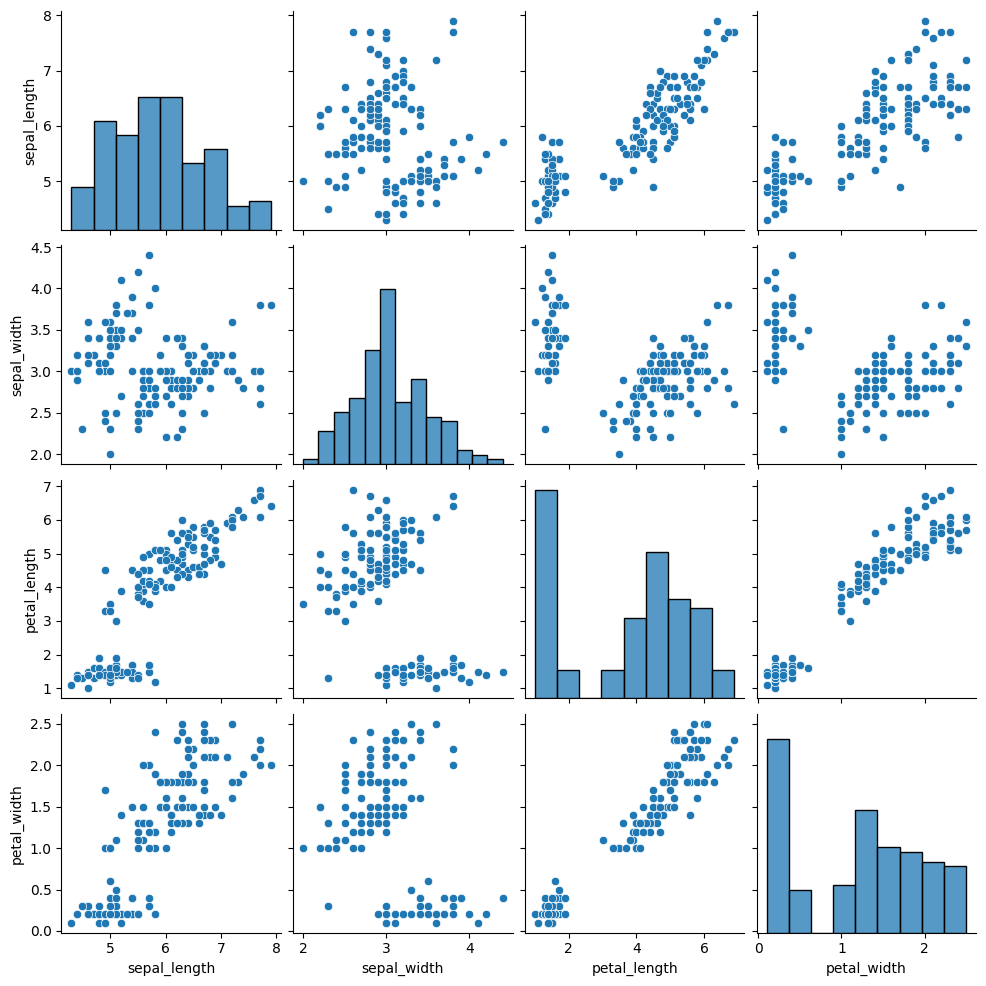

In [25]:
#Insert your first pairplot of the iris dataset
sns.pairplot(data=iris)

With this example done, you probably have a better idea of the power of pairplot. It can instantly give you an idea of the distribution of each variable and of which plots you will want to make in more detail. Of course, there is much more to this tool than the `data` argument, so as usual, let's go over the most useful arguments:

1. `hue`: I won't explain this as it works exactly like usual,
2. `vars`, `x_vars`, and `y_vars`: I grouped these together as they work exactly the same. By default, `sns.pairplot()` plots every numerical column against every numerical column, if you only want a specific set of columns, you can specify the list of columns into the `vars` argument. If you want to make a non-square pairplot, you can pass a list of columns to plot on the axis to `x_vars`, and the list of columns you want on the y axis to `y_vars`
3. `kind` and `diag_kind`, I'm going to let you guess what these do. `kind` can be one of `"scatter"` (the default), `"hist"`, `"kde"` or `"reg"` (the last of which we didn't go over). `diag_kind` can be one of `"auto"` (the default), `"hist"`, `"kde"`, or `None`. `"auto"` behaves like `"kde"` if `hue` is specified and like `"hist"` otherwise
4. `height` and `aspect` work as usual
5. `corner` is a boolean (`False` by default), if it is set to `True`, the plots above the diagonal won't be shown
6. `plot_kws` and `diag_kws`: are dictionnaries of extra arguments you might want to pass to the plotting functions. `plot_kws` being of course for the off diagonal plots, and `diag_kws` being for the distribution plots on the diagonal. Note that the keyword arguments that can be passed into these dicts, will of course vary depending on the `kind` and `diag_kind` arguments. (Also, note that `grid_kws` is also a thing, but since those are the keyword arguments passed to the `sns.PairGrid` constructor, and we didn't really go over that, you can ignore it).

Now that you know all this, you can start practicing by remaking the previous plot. This time, you should specify `hue` (if you're not sure which column to pass to `hue`, you might want to start by using `display(iris.head())`). You should also make this next plot a corner plot and have an aspect ratio of $3:2$.

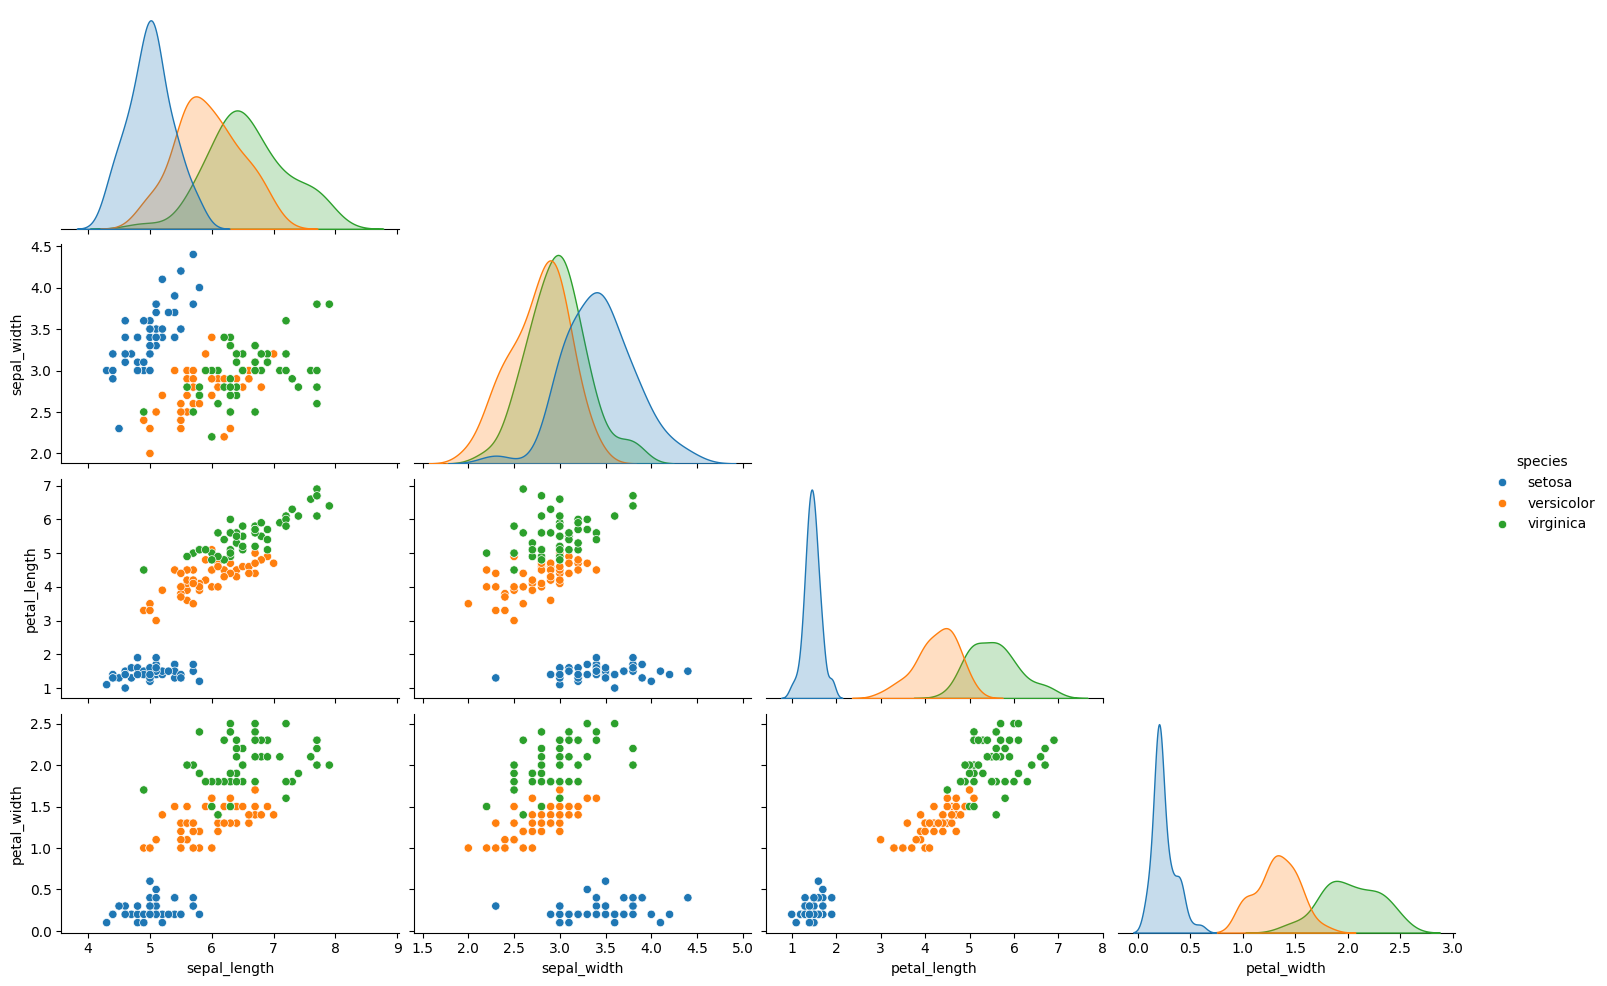

In [26]:
#make the new paiplot here
sns.pairplot(iris, hue="species", corner=True, aspect=1.5) #You don't actually have to specify height to specify aspect, height is only really useful if you want to impose a figsize

Now, make a pairplot on the penguins dataframe, you should have bill length and bill depth in x against every column in y. The point's color should be determined by the penguin's species, keep the aspect ratio $3:2$. Finally, the "diagonal" if we can call it such should be histograms. (To make them legible, you will have to specify a keyword argument to `sns.histplot()`). Given how the points overlap, you will have to increase their transparency a bit (or reduce their size), to do that, you will need to specify a keyword argument to `sns.scatterplot()`.

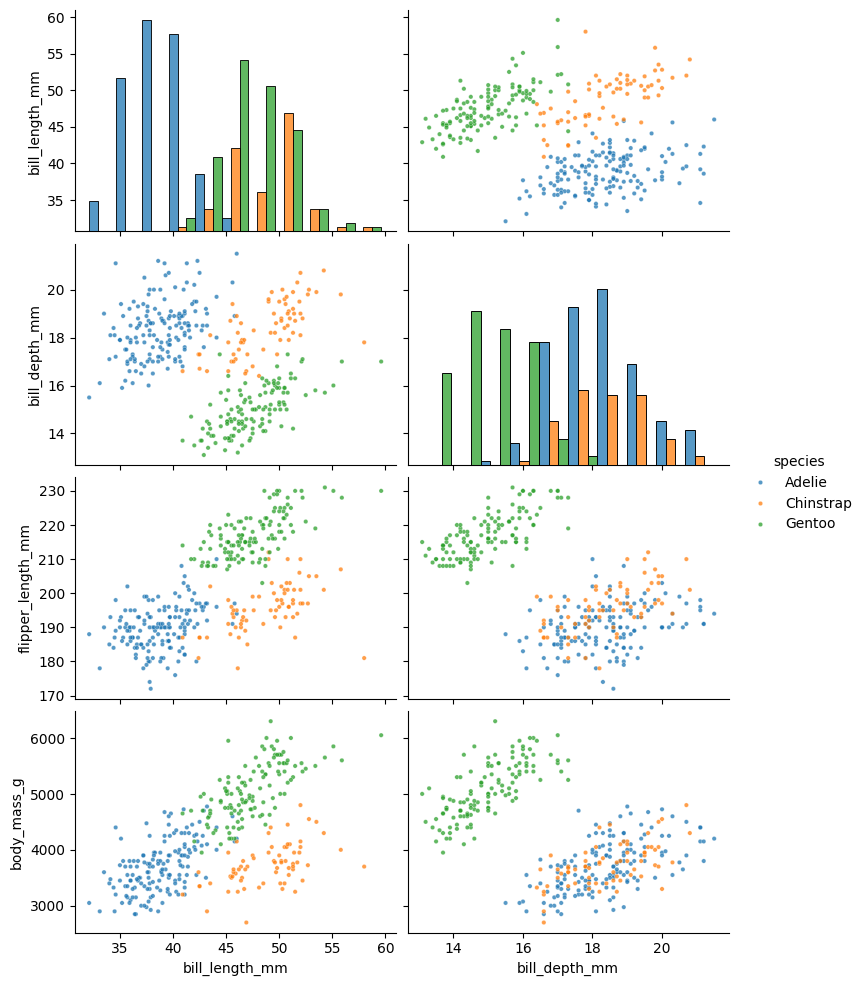

In [27]:
#Make the new pairplot here
sns.pairplot(penguins, hue="species", x_vars=["bill_length_mm", "bill_depth_mm"], diag_kind="hist", diag_kws={"multiple":"dodge"}, plot_kws={"s":10, "alpha":.75}, aspect=1.5) #You really don't need to specify both s and alpha, I'm just doing it for the sake of demonstration

Now, we get to `sns.jointplot()`, if you remember, on an early exercise in this notebook, specifically, when I asked what you would do if you wanted to plot both the univariate an bivariate distribution, I mentionned that if you knew some seaborn, you might be tempted to use `sns.jointplot()`. Well after this part, you will know enough to (if you want), go back and do it using `sns.jointplot()`. 

In a sense, `sns.jointplot()` is very similar to `sns.pairplot()` except it focuses on a relation between two variables. It therefore shows a corner plot, featuring a plot of one variable against another, and also shows the distribution of both variables.

This might be unclear, and as we've seen with `sns.pairplot()`, an image is worth a thousand words, so let's use the iris dataset to make one. The arguments (apart from `data`) that you need to know of for this are `x` and `y`, the columns to plot on each axis. Plot petal length in y against petal width in x.

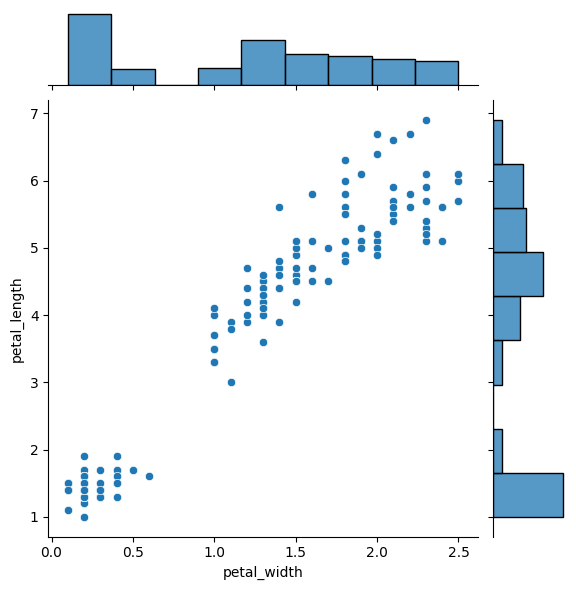

In [28]:
#insert your first jointplot here
sns.jointplot(iris, x="petal_width", y="petal_length")

I don't think I need to explain why being able to make such a plot in only one line of code is fantastic, so without further ado, let's get into arguments:

1. `hue` this works as usual
2. `kind` this again works as usual, it defines the kind of the large central plot, it can be one of `"scatter"` (the default), `"kde"`, `hist`, `hex` (for hexbin, very similar to a bivariate histogram, although it's arguably more visually appealing), `reg`, or `resid` (the last two of which we haven't covered). Note that there is no argument for the kind of the smaller histograms, their kind is actually determined like it would be in `sns.pairplot()` if you had used `diag_kind = "auto"`
3. `height` this is as usual the height of the figure, however, in `sns.jointplot()`, the figure is forced to be square, therefore there is no `aspect` argument
4. `xlim` and `ylim` are the limits to impose on the x and y axes if you want to impose any. (They can either be passed as tuples, or any array like with 2 values)
5. `joint_kws` is a dictionnary of extra keyword arguments to pass to the function that draws the main plot, and `marginal_kws` is a dictionnary of extra keyword arguments to pass to the function that draws the side plot

Now, time for some practice, start like you did on the first `sns.joinplot()` exercise, but now specify the `hue` argument. Data points should only appear on your plot if they have a petal width of less than $2.05$ (this seems oddly specific, but it's to avoid having points on the boundary of the graph, while imposing some x and y limits), and a petal length of less than $6.5$. Specify some arbitrary figure size, just so that you don't forget how to do this.

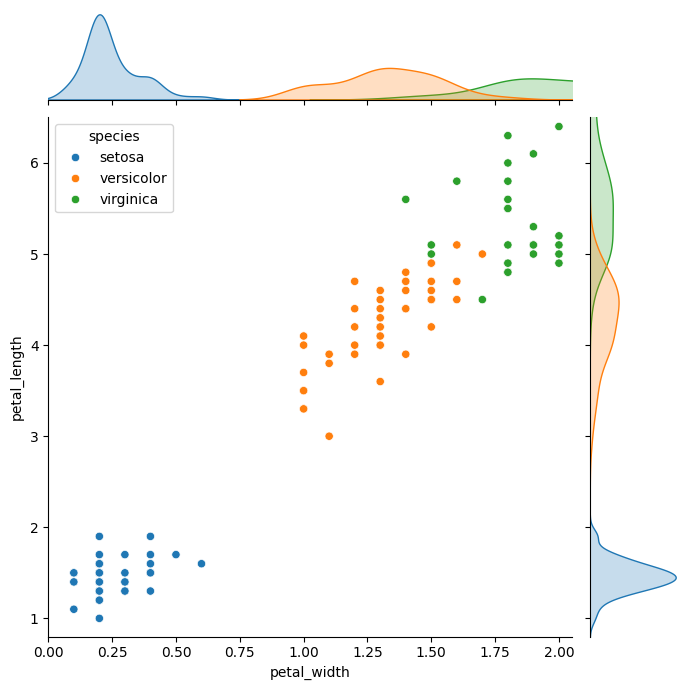

In [29]:
#Insert the next jointplot here
sns.jointplot(iris, x="petal_width", y="petal_length", hue="species", xlim=(0,2.05), ylim=(.8, 6.5), height=7)

Now, remake the first jointplot, (i.e. without specifying `hue`), except the histograms should have only $5$ bins instead of the $9$ that were on the previous version (to do that, you will have to use the `marginal_kws` dict)

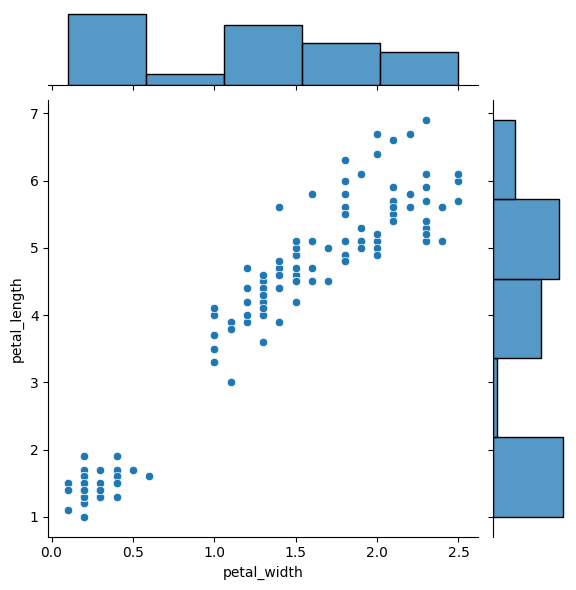

In [30]:
#Remake the jointplot
sns.jointplot(iris, x="petal_width", y="petal_length", marginal_kws=dict(bins=5)) #using the python dict function is also a valid way to give dictionnarys for these kinds of arguments

This is it for the `sns.jointplot()` function, unless you want to go back and do the earlier exercise I mentionned with it, or want to explore the penguins or tips datasets, (or really any other) for more practice. I could make you repeat very similar exercises a few more times, but I don't believe in mechanically repeating the same task over and over as a way of learning, so I won't.

A quick little bit of plot aesthetics.
---

Before I begin with this section, you should know that in its current state, it is not meant by any means to teach you how to design a visually appealing plot (as in I won't really be going over any graphic design or statistical representation concepts). If you want to learn more about that, the Figure aesthetics section of the tutorial page of seaborn documentation (https://seaborn.pydata.org/tutorial.html#figure-aesthetics) is very good at doing this. I will also not be going very in depth into some of the functions that can be used to change/improve a figure's aesthetic, as that could be a course in it of itself. That said, if you want some more resources about that, I highly recommend you begin by looking through the previously referenced tutorial page. 

Furthermore, I also want to point out that although I will have you write a little bit of code in this section, if you want to really try things out, I would strongly advise that you go back to previous sections and mess around with the parameters we will go over in this section

Finally, to test out the aesthetic changes we will make, we will use the `sinplot()` function (which I copied and pasted from the aesthetics section of the seaborn tutorials page), in the next cell, you can find the function's definition (notice that this function is the reason why we imported `numpy.linspace`, `numpy.sin` and `matplotlib.pyplot.plot`), and a call of the function, so that you can see what it looks like with regular defaults. (If you imported the entirety of `matplotlib.pyplot` as `plt`, you will have to change the `plt.plot`, you would actually have spared yourself an error over importing `plot` from `matplotlib.pyplot`, this is a mistake I made, and I will leave my stupidity here on display for all as it is a good lesson, somewhere in this file, after importing `plot()`, I created a variable named `plot`, and stored one of the graphs inside it, overwriting the function I had imported, this is something to be careful about)

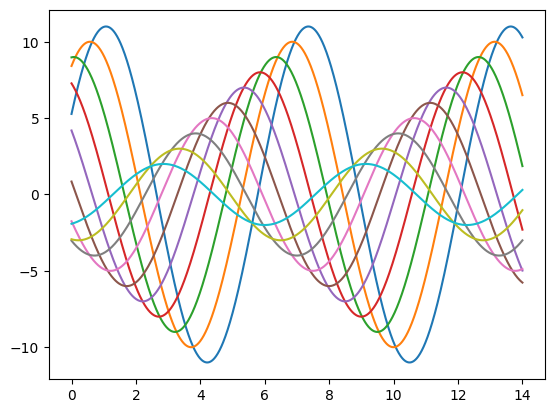

In [31]:
#Sinplot function (Copied and pasted from documentation)
def sinplot(n=10, flip=1):
    x = linspace(0, 14, 1000)
    for i in range(1, n + 1):
        plt.plot(x, sin(x + i * .5) * (n + 2 - i) * flip)

#calling the function so that you can see what defaults look like
sinplot()

Now that these disclaimers have been given, we can actually start, there are 5 formatting elements (or 4 depending on how you count) I will teach you about in this section:
- Plot context, the parameters (as in `maplotlib.rcParams` paramaters this edits) of which can be viewed with `sns.plotting_context()` and changed with `sns.set_context()`
- Axes style, once again, the parameters can be viewed with `sns.axes_style()` and edited with `sns.set_style`
- Color palette which can be viewed with `sns.color_palette()` and set with `sns.set_palette()`. Remember, if you the last function you call in a code cell is `sns.color_palette()`, it will be passed through frontend, and displayed automatically, however, if it isn't the last line of code in the cell, and you still want to display it, you should use the `display()` function that was earlier imported from `IPython.display`
- Font, and font scaling, the last two elements we will go over are a bit different, as they don't have any functions that are specifically taylored to editing them, and are instead edited through some of the other functions we discussed.

First, we begin with plotting context, `sns.set_context()` and `sns.plotting_context()` both take the same arguments, `context`, which can be one of a dict of the parameters to edit mapped to their new values (unless you're good, in which case, what are you doing here, don't do this), or one of `"notebook"`, (which the default of None acts like in `sns.set_context()`), `"paper"`, `"talk"`, or `"poster"`, which are respectively optimized for looking good when displayed in a Jupyter notebook, a scientific paper, at a talk, or on a poster. The second argument is `font_scaling`, which takes a float (1 by default), to multiply the default fontsize by. Passing arguments to `sns.plotting_context()` will display the parameters that will be set if you called `sns.set_context()` with the same arguments, passing no arguments will simply return the current parameters. 

In the next code cell, try getting a sense for what the matplotlib defaults are by displaying them. I also invite you to mess around with each context, and call the sinplot function after changing them 

{'font.size': 10.0,
 'axes.labelsize': 'medium',
 'axes.titlesize': 'large',
 'xtick.labelsize': 'medium',
 'ytick.labelsize': 'medium',
 'legend.fontsize': 'medium',
 'legend.title_fontsize': None,
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0}

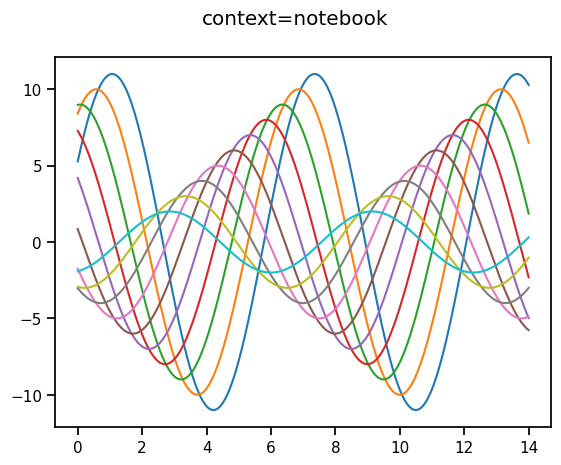

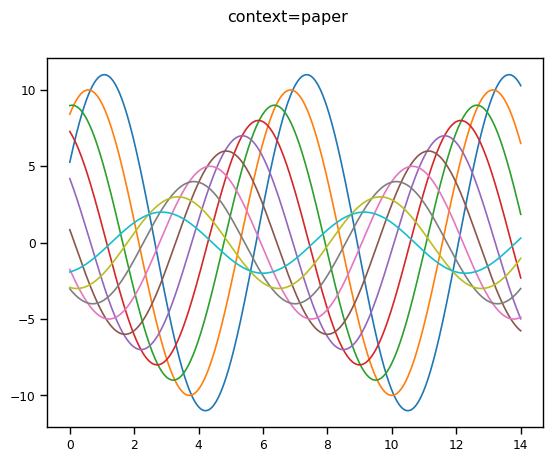

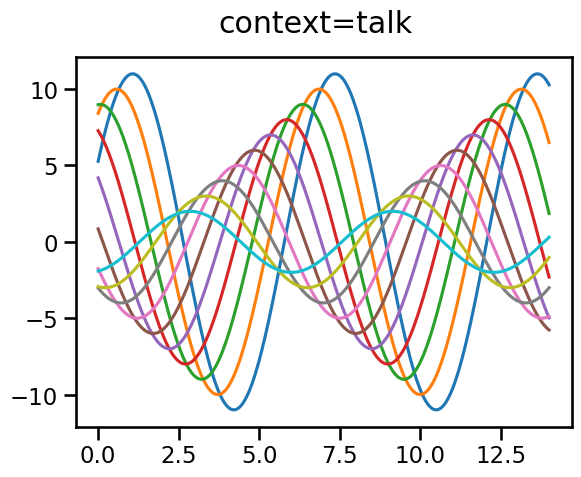

Text(0.5, 0.98, 'context=poster')

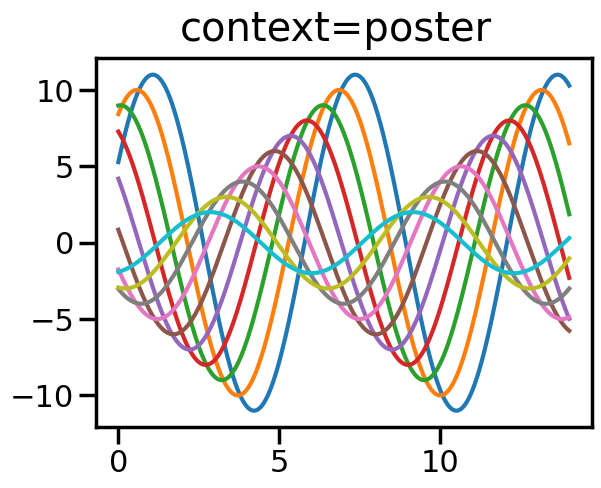

In [32]:
#display the current values:
display(sns.plotting_context())#I prefer using display over print here, because it displays each entry of a dictionary on a new line, instead of printing the whole dict on the same line, which makes it more legible

#mess around with the contexts
sns.set_context(context = "notebook", font_scale=1)
sinplot()
plt.gcf().suptitle("context=notebook")#plt.gcf() let's me get the current figure to give it a title, so that it is easily identifiable
show()#so that each plot is given its unique figure

sns.set_context(context = "paper", font_scale=1)
sinplot()
plt.gcf().suptitle("context=paper")
show()

sns.set_context(context = "talk", font_scale=1)
sinplot()
plt.gcf().suptitle("context=talk")
show()

sns.set_context(context = "poster", font_scale=1)
sinplot()
plt.gcf().suptitle("context=poster")
#You don't need plt.show() here thanks to frontend, but when in doubt, it never hurts to leave it

Then, `sns.axes_style()`, and `sns.set_style()` work exactly like the previous two function, except with a different argument, namely `style`, which again, can be a dict of specific values you want to change, or one of `"darkgrid"` (which the default of `None` acts like), `"whitegrid"`, `"dark"`, `"white"`, or `"ticks"`. 

In the next code cell, try messing around with these and contexts (I won't include every combination in solutions, because that's too many combinations)

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': 'white',
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>,
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

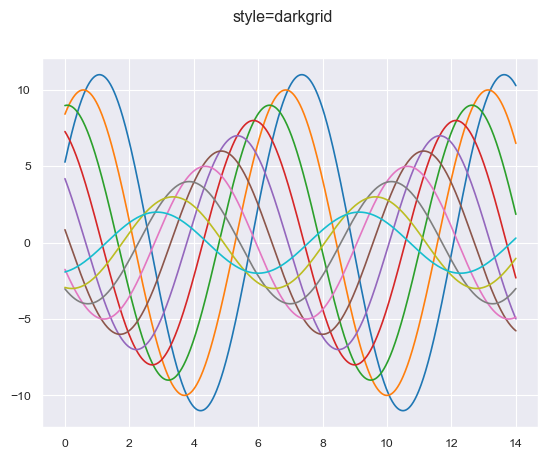

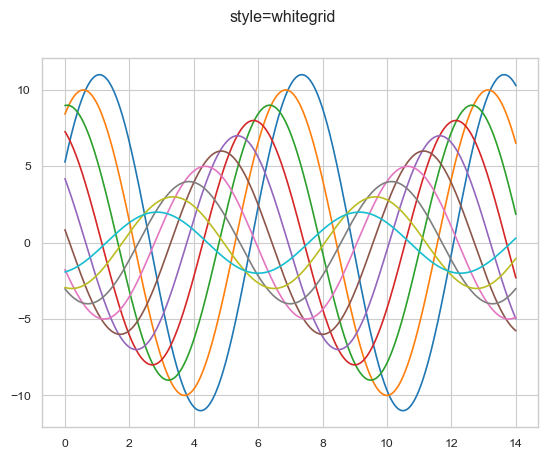

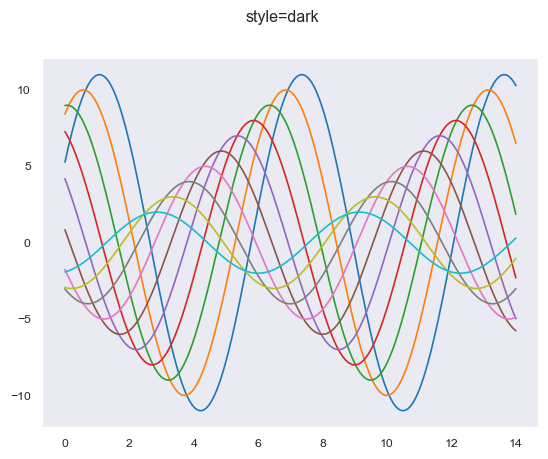

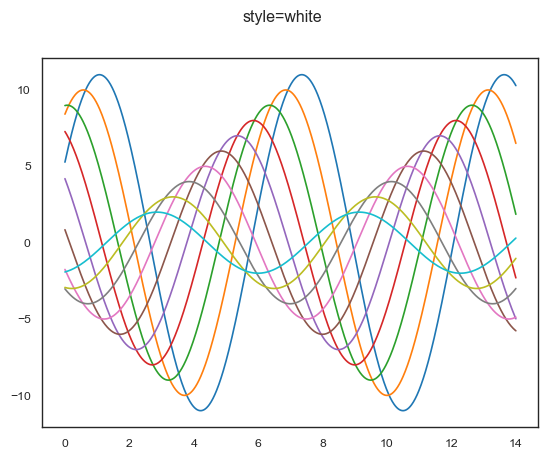

Text(0.5, 0.98, 'style=ticks')

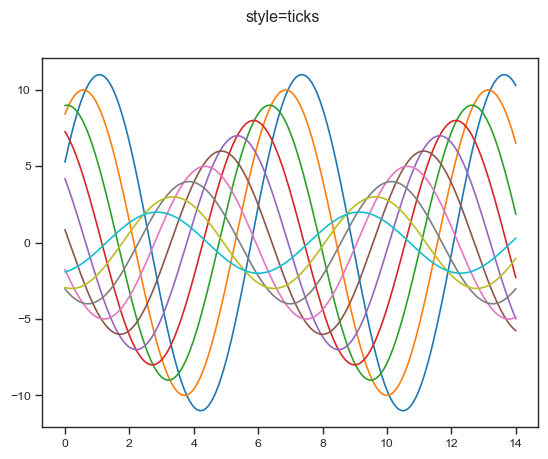

In [33]:
#display the current settings
display(sns.axes_style())

#messing around
sns.set_context(context = "paper")

sns.set_style(style = "darkgrid")
sinplot()
plt.gcf().suptitle("style=darkgrid")
show()

sns.set_style(style = "whitegrid")
sinplot()
plt.gcf().suptitle("style=whitegrid")
show()

sns.set_style(style = "dark")
sinplot()
plt.gcf().suptitle("style=dark")
show()

sns.set_style(style = "white")
sinplot()
plt.gcf().suptitle("style=white")
show()

sns.set_style(style = "ticks")
sinplot()
plt.gcf().suptitle("style=ticks")

Finally, color palette can be set with `sns.set_palette()` and viewed with `sns.color_palette()`. Which work like the previous functions except they are a lot more complicated for a few reasons, but the main one is that there are many ways to build custom color palettes. 

These functions take two (main) arguments, `palette` and `n_colors`. `n_colors` is the simpler one, as it is simply the number of colors you want the palette you passed to include (it is only really usefull for palettes that are built from color gradients, as it helps you control how different each color is from the next).

As I have mentionned, `palette` is more complicated, so I will only go over some of the preexisting color palettes that can be accessed using a keyword string. 

First, note that the default color palette of blue-orange-green-red-purple-brown-pink-gray-yellow-cyan, actually comes in 6 versions:
- `"deep"` is the default,
- `"dark"`,
- `"colorblind"`,
- `"pastel"`,
- `"muted"`,
- `"bright"`
Note that in matplotlib, this palette is called `"tab10"` (which is a slightly brighter version of the default `"deep"` palette), and this is also accepted for compatibility.

For the rest, here is a non exhaustive other existing preset color palettes (note that for all of these, adding `"_r"` at the end of the palette name gives you the same palette but in reverse order), (second note, to my knowledge, these are case sensitive, so be careful with that):
- `"Accent"`
- `"afmhot"`
- `"autumn"`
- `"cividis"`
- `"CMRmap"`
- `"cool"`
- `"coolwarm"`
- `"copper"`
- `"crest"`
- `"Dark2"`
- `"flare"`
- `"hot"`
- `"icefire"`
- `"inferno"`
- `"magma"`
- `"mako"`
- `"ocean"`
- `"Paired"`
- `"Pastel2"`
- `"plasma"`
- `"rainbow"`
- `"rocket"`
- `"seismic"`
- `"Set1"`
- `"Set2"`
- `"Set3"`
- `"Spectral"`
- `"spring"`
- `"summer"`
- `"terrain"`
- `"twilight"` and `"twilight_shifted"`
- `"viridis"`
- `"vlag"`
- `"winter"`
- `"Wistia"`

Now, in the next cell, I would recommend you try displaying some of these palettes (maybe not all of them, because that's quite a few), and possibly try the sinplot function with some of them.

[(0.8141484044598232, 0.2196847366397539, 0.3048058439061899),
 (0.9330257593233372, 0.3913110342176086, 0.27197231833910035),
 (0.9817762399077278, 0.6073817762399076, 0.3457900807381776),
 (0.9946943483275663, 0.8092272202998846, 0.48696655132641287),
 (0.9982314494425221, 0.9451749327181853, 0.6570549788542868),
 (0.9557862360630527, 0.9823144944252211, 0.6800461361014996),
 (0.8202998846597465, 0.9275663206459055, 0.6126874279123413),
 (0.5910034602076126, 0.835524798154556, 0.6442906574394464),
 (0.3600153787004998, 0.7161860822760476, 0.6655132641291811),
 (0.21299500192233756, 0.5114186851211072, 0.730795847750865)]

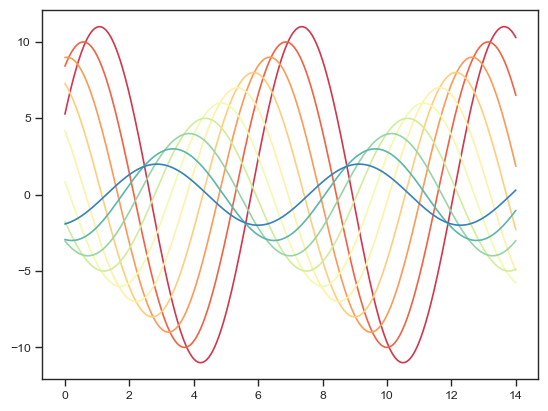

In [34]:
#display some color palettes
display(sns.color_palette(palette = "Spectral", n_colors = 10))

#set a color palette
sns.set_palette(palette = "Spectral", n_colors = 10)

#test plotting with it
sinplot()

Finally, note that all of these can be changed with a single function, namely, `sns.set_theme()` which accepts `context`, `style`, `palette`, `font` (which we haven't covered, and is either one of the matplotlib default fonts, or a filepath to a .ttf or .ttc file that contains the desired font), and `font_scale`.

Therefore, if you want to modify a few of these parameters, you can therefore use the `set_theme()` function, particularily, if you want to set the context to notebook, the style to darkgrid, and the palette to deep, you can simply call `sns.set_theme()` with no arguments. However, note that this function doesn't accept the `n_colors` argument, so if you need to pass it, you should still use `sns.set_palette()` to set the color palette. (Technically, you could also pass the output of a call of `sns.color_palette()` but that's less legible, and to be avoided)

Conclusion
----------
In this notebook, we have gone through the main seaborn plotting functions, we have ignored a few things, some of which I will come back and update this with when time permits, and others which I won't.
We have ignored the following:
1. JointGrid, PairGrid and FacetGrid objects. (I won't come back to talk about these as they are way beyond the scope of what I'm trying to teach, but know that they help give you more flexibility in what you're plotting)
2. Plotting and computing regressions and residuals, Seaborn features functions for plotting polynomial regressions nicely (based on `np.polyfit()`), and for plotting their residuals. I was initially planning to include these, but I have largely underestimated the scope of this project, so I will come back and add it in the future time permitting (it's actually the reason why I had you import the `subplots` function from `matplotlib.pyplot`).
3. More details on plot aesthetics, again, it was the plan to include this, but for the same reason as point 2, I can't really right now, and will come back later to do it.

4. Once parts 2 and 3 have been added, I will add brief descriptions of most of the datasets we didn't use in case you want to use them for practice. (However, this is very low on my priority list, so don't expect it anytime soon)

Sources:

Seaborn documentation: https://seaborn.pydata.org/api.html 

Note, if Seaborn is integral to one of your data analysis projects, you should cite the following article they published: https://joss.theoj.org/papers/10.21105/joss.03021. 

For all the LATEX enjoyers out there, they have a readily available Bibtex entry on the citing section of their documentation (https://seaborn.pydata.org/citing.html). 

Second note, as the seaborn creators point out in their citing section, any time seaborn is cited, it is more than likely that citing matplotlib would also be appropriate. For those who don't know (I will admit, until making this, I was one of them), matplotlib asks that you cite this article (https://ieeexplore.ieee.org/document/4160265) when using their software. Matplotlib also has a readily available Bibtex entry on the citing section of their documentation, so no excuses (https://matplotlib.org/stable/users/project/citing.html).